## <b> Capstone Project - Machine Learning Engineer Nanodegree - Udacity </b>

## <b>  Home Credit Default Risk Recognition </b>

### <b> -By Abhishek Bihani </b>


---

<b> Domain Background </b>

An important fraction of the population finds it difficult to get their home loans approved due to insufficient or absent credit history. This prevents them to buy their own dream homes and at times even forces them to rely on other sources of money which may be unreliable and have exorbitant interest rates. Conversely, it is a major challenge for banks and other finance lending agencies to decide for which candidates to approve housing loans. The credit history is not always a sufficient tool for decisions, since it is possible that those borrowers with a long credit history can still default on the loan and some people with a good chance of loan repayment may simply not have a sufficiently long credit history. 

A number of recent researchers have applied machine learning to predict the loan default risk. This is important since a machine learning-based classification tool to predict the loan default risk which uses more features than just the traditional credit history can be of great help for both, potential borrowers, and the lending institutions. At a personal level, this project will help me gain an insight into which factors are the most important indicators for a bank when making a loan decision in case I decide to apply for a housing loan in the future.

<b> Problem Statement </b>

The [problem and associated data](https://www.kaggle.com/c/home-credit-default-risk/overview) has been provided by Home Call Credit Group for a Kaggle competition. The problem can be described as, <i> “A binary classification problem where the inputs are various features describing the financial and behavioral history of the loan applicants, in order to predict whether the loan will be repaid or defaulted.” </i> 

<b> Project Novelty </b>

<i> The notebook provides a complete end-to-end workflow for building a binary classifier, and includes methods like automated feature engineering for connecting relational databases, comparison of different classifiers on imbalanced data, and hyperparameter tuning using Bayesian optimization. </i>

<b> Datasets and Inputs </b>

The [dataset files](https://www.kaggle.com/c/home-credit-default-risk/data) are provided on the Kaggle website in the form of multiple CSV files and are free to download. The dataset files are described as per Figure 1.

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)
 
Figure 1- Description and connectivity of the Home Credit Default Risk dataset

As seen in Figure 1, the file application_{train|test}.csv contains the main table containing the training dataset (307511 samples) and test dataset (48744 samples), with each row representing one loan identified by the feature SK_ID_CURR. The training set contains the variable TARGET with binary values (0: the loan was repaid or 1: the loan was not repaid). There are many input files available, which will be analysed for input features to train the model. The large number of input features and training samples will allow me to identify the important factors and for constructing a credit default risk classification model.

<b> Project Design and Solution </b>

The project has been divided into five parts-

1. <u>Data Preparation</u> - Before starting the modeling, we need to import the necessary libraries and the datasets. If there are more than one files, then all need to be imported before we can look at the feature types and number of rows/columns in each file. 

2. <u>Exploratory Data Analysis</u> - After data importing, we can investigate the data and answer questions like- How many features are present and how are they interlinked? What is the data quality, are there missing values? What are the different data types, are there many categorical features? Is the data imbalanced? And most importantly, are there any obvious patterns between the predictor and response features? 

3. <u>Feature Engineering</u> - After exploring the data distributions, we can conduct feature engineering to prepare the data for model training. This includes operations like replacing outliers, imputing missing values, one-hot encoding categorical variables, and rescaling the data. Since there are number of relational databases, we can use extract, transform, load (ETL) processes using automated feature Engineering with [Featuretools](https://www.featuretools.com/) to connect the datasets. The additional features from these datasets will help improve the results over the base case (logistic regression). 

4. <u>Classifier Models: Training, Prediction and Comparison</u> - After the dataset is split into training and testing sets, we can correct the data imbalances by undersampling the majority class. Then, we can training the different classifier models (Logistic Regression, Random Forest, Decision Tree, Gaussian Naive Bayes, XGBoost, Gradient Boosting, LightGBM) and compare their performance on the test data using metrics like accuracy, F1-score and ROC AUC. After choosing the best classifier, we can use K-fold cross validation to select the best model. This will help us choose parameters that correspond to the best performance without creating a separate validation dataset.

5. <u>Hyperparameter Tuning</u> - After choosing the binary classifier, we can tune the hyperparameters for improving the model results through grid search, random search, and Bayesian optimization [(Hypertopt library)](https://github.com/hyperopt/hyperopt). The hyperparameter tuning process will use an objective function on the given domain space, and an optimization algorithm to give the results. The ROC AUC validation scores from all three methods for different iterations can be compared to see trends.

<b> Package/Library Requirements </b>

The following packages need to be installed for running the notebook.

1) sklearn  - For models and metrics<br>
2) warnings - For preventing warnings<br>
3) numpy - For basic matrix handling<br>
4) matplotlib - For figure plotting<br>
5) pandas - For creating dataframes<br>
6) seaborn - For figure plotting<br>
7) timeit - For tracking times<br>
8) os - for setting work directory<br>
9) random - For creating random seeds<br>
10) csv - For saving csv files<br>
11) json - For creating json files<br>
12) itertools - For creating iterators for efficient looping<br>
13) pprint - For pretty printing data structures<br>
14) pydash - for doing “stuff” in a functional way (utility library). <br>
15) gc -  Garbage collector for deleting data <br>
16) re - Raw string notation for regular expression patterns <br>
17) featuretools - Automated feature engineering <br>
18) xgboost - XGBoost model <br>
19) lightgbm - LightGBM model <br>
20) hyperopt - Bayesian hyperparameter optimization <br>

<b> References / Acknowledgements </b>

This notebook builds on scripts and explanations from other Jupyter notebooks publicly shared on Kaggle. The list is as follows-

1) [A Gentle Introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction) <br>
2) [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics) <br>
3) [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory) <br>
4) [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search) <br>
5) [Automated Model Tuning](https://www.kaggle.com/willkoehrsen/automated-model-tuning) <br>
6) [Home Credit Default Risk Extensive EDA](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda) <br>
7) [Home Credit Default Risk: Visualization & Analysis](https://www.kaggle.com/charlievbc/home-credit-default-risk-visualization-analysis) <br>
8) [Loan repayers v/s Loan defaulters - HOME CREDIT](https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit) <br>

---

---

## <b> 1.0 Data Preparation </b>

Before starting the modeling, we can import the necessary libraries and the data. If there are more data files, then all need to be imported and then we can look at the features types and number of rows/columns in each data file. 

---

<b> 1.1 Install/Import packages </b>

First all the packages required for the workflow are installed and imported

In [1]:
# Please uncomment and install any missing packages 
# You can change the current environment first if needed - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

!uv pip install scikit-learn
!uv pip install warnings
!uv pip install numpy
!uv pip install matplotlib
!uv pip install pandas
!uv pip install seaborn
!uv pip install itertools
!uv pip install pprint
!uv pip install pydash
!uv pip install featuretools
!uv pip install xgboost
!uv pip install lightgbm
!uv pip install hyperopt
!uv pip install setuptools

Audited 1 package in 58ms
  × No solution found when resolving dependencies:
  ╰─▶ Because warnings was not found in the package registry and you require
      warnings, we can conclude that your requirements are unsatisfiable.
Audited 1 package in 2ms
Audited 1 package in 7ms
Audited 1 package in 8ms
Audited 1 package in 6ms
  × No solution found when resolving dependencies:
  ╰─▶ Because itertools was not found in the package registry and you require
      itertools, we can conclude that your requirements are unsatisfiable.
  × No solution found when resolving dependencies:
  ╰─▶ Because pprint was not found in the package registry and you require
      pprint, we can conclude that your requirements are unsatisfiable.
Audited 1 package in 25ms
Audited 1 package in 5ms
Audited 1 package in 4ms
Audited 1 package in 4ms
Audited 1 package in 5ms
Audited 1 package in 3ms


In [2]:
# Import required libraries/packages

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns             
from timeit import default_timer as timer
import os
import random
import csv
import json
import itertools
import pprint
from pydash import at
import gc
import re

# import featuretools for automated feature engineering
import featuretools as ft 
from featuretools import selection

#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#import library for hyperparameter optimization
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin
from hyperopt.pyll.stochastic import sample

---

<b> 1.2 Set working directory and import datasets </b>

The working directory is set to the address where data is located 

In [3]:
# File system manangement

os.chdir("C:\\Users\\SonNT\\Downloads\\Internship2\\home-credit-default-risk") # set the working directory



Import the main data set and show the feature names and their types 

In [4]:
# Load training data from main file

application_train = pd.read_csv("application_train.csv")
application_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

For the main training data, there are 307511 total samples (each row a separate loan) with 122 features of types 41 integer, 65 float and 16 object datatypes. 

Out of these, the feature (SK_ID_CURR) serves as the index and TARGET is the response feature to be predicted. 

Then, all the other data files can be imported.

<i> Since, we do not have access to the labeled version of the test dataset, we will not use it, instead we will split part of the training dataset to use as the test data. </i>

In [5]:
# Load other data files

bureau                = pd.read_csv("bureau.csv")
bureau_balance        = pd.read_csv("bureau_balance.csv")
credit_card_balance   = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
pos_cash_balance      = pd.read_csv("POS_CASH_balance.csv")
previous_application  = pd.read_csv("previous_application.csv")

---

<b> 1.3 Check dataset structures </b>

We can see the number of rows and columns in each file

In [6]:
print ("application_train     :",application_train.shape)
print ("bureau                :",bureau.shape)
print ("bureau_balance        :",bureau_balance.shape)
print ("credit_card_balance   :",credit_card_balance.shape)
print ("installments_payments :",installments_payments.shape)
print ("pos_cash_balance      :",pos_cash_balance.shape)
print ("previous_application  :",previous_application.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


The first 3 columns of each dataset are displayed for data inspection

In [7]:
display("application_train")
display(application_train.head(3))
display("bureau")
display(bureau.head(3))
display("bureau_balance")
display(bureau_balance.head(3))
display("credit_card_balance")
display(credit_card_balance.head(3))
display("installments_payments")
display(installments_payments.head(3))
display("pos_cash_balance")
display(pos_cash_balance.head(3))
display("previous_application")
display(previous_application.head(3))

'application_train'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

'bureau'

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

'bureau_balance'

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C

'credit_card_balance'

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  

[3 rows x 23 columns]

'installments_payments'

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000

'pos_cash_balance'

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0

'previous_application'

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  

[3 rows x 37 columns]

---

## <b> 2.0 Exploratory Data Analysis </b>

After data importing, we can investigate the data and answer questions like- How many features are present and how are they interlinked? What is the data quality, are there missing values? What are the different data types, are there many categorical features? Is the data imbalanced? And most importantly, are there any obvious patterns between the predictor and response features? 

---

<b> 2.1 Checking data imbalance </b>

First we can observe the distribution of the predictor variable to check if the data is balanced or not. We can see that the dataset is imbalanced with the number of samples where loan is repaid (TARGET=0) more than 10 times the number of samples where loan is defaulted (TARGET=1)

There are 282686 loans repaid on time (TARGET=0) and 24825 loans defaulted (TARGET=1) in the dataset


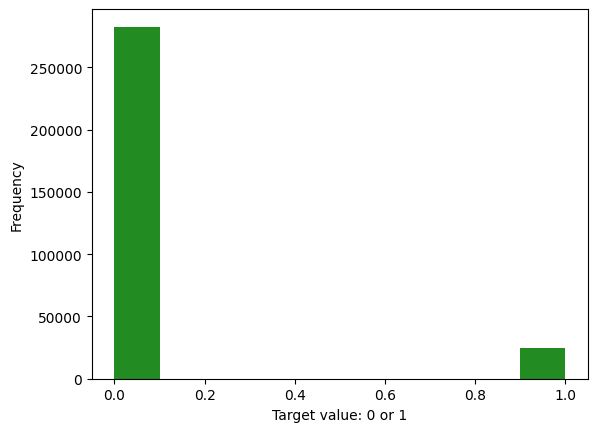

In [8]:
# Target data distribution

application_train['TARGET'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target value: 0 or 1');

count = application_train['TARGET'].value_counts()
num_repaid = count[0]
num_default = count[1]

print("There are {} loans repaid on time (TARGET=0) and {} loans defaulted (TARGET=1) in the dataset".format(num_repaid, num_default))

---

<b> 2.2 Checking missing data </b>

Before we investigate the possible correlations between the features, it is important to check if the data contains missing values.

(0.0, 100.0)

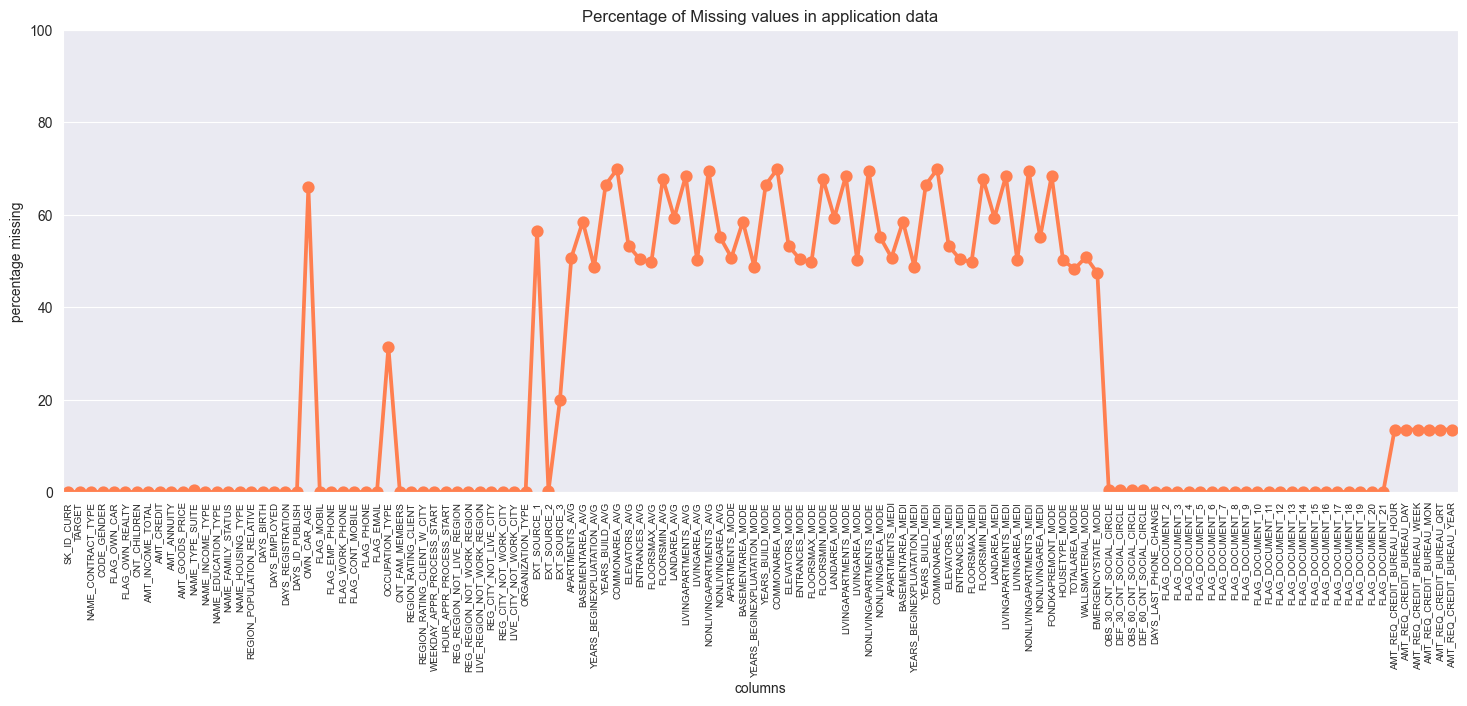

In [9]:
# Missing data in application (main) dataset

fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((application_train.isnull().sum())*100/application_train.shape[0]).reset_index()
miss_data["type"] = "application data"
sns.set_style('darkgrid')
ax = sns.pointplot(x="index", y=0, data=miss_data, color='coral')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("percentage missing")
plt.xlabel("columns")
plt.ylim((0,100))

In the main training dataset, we can see that there are a number of features with missing values almost 50%. The features with missing data need to be discarded or missing values filled before training any model. Similar checks should be performed on the other datasets.

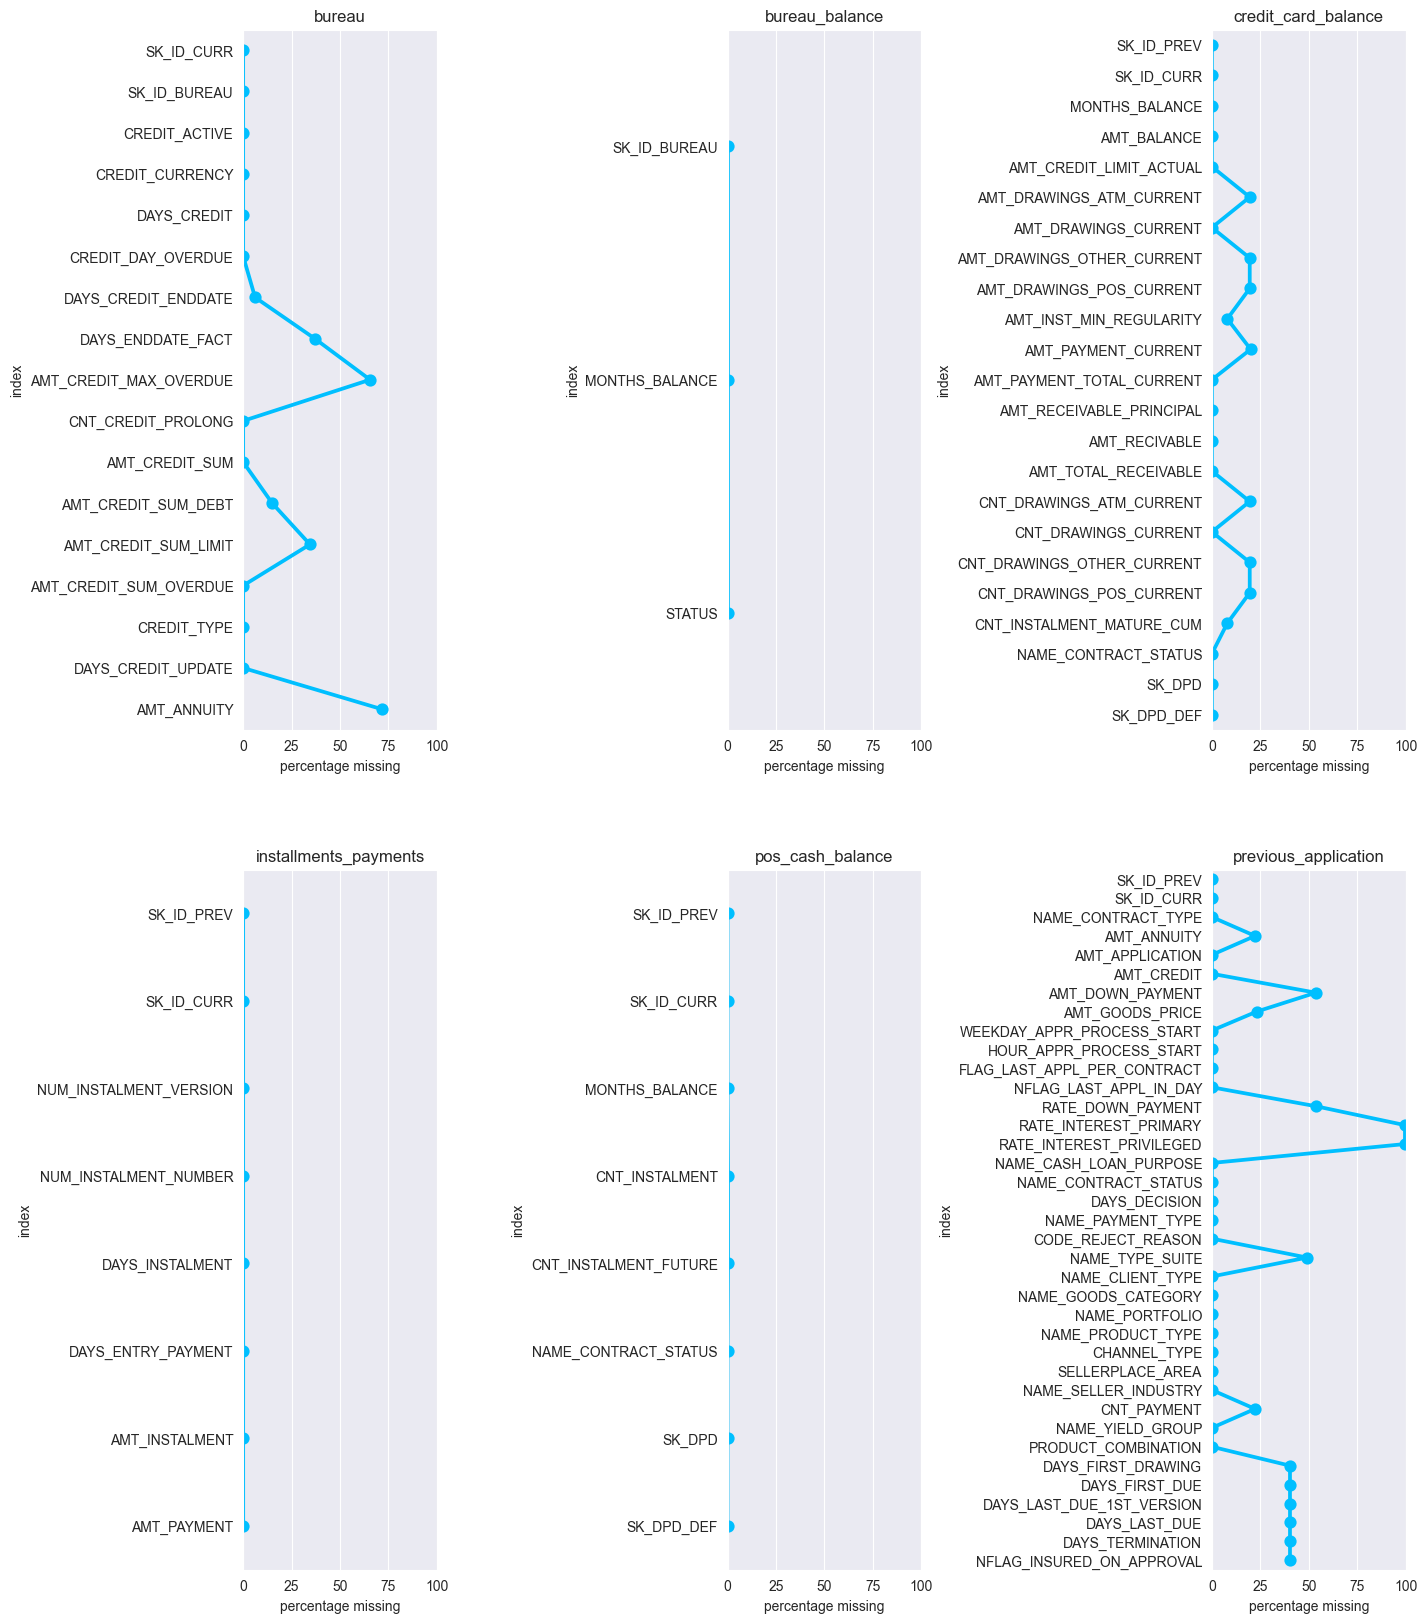

In [10]:
# Missing data in other data

plt.figure(figsize=(15,20))

plt.subplot(231)
sns.pointplot(x=0,y="index",data=pd.DataFrame(bureau.isnull().sum()/bureau.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("bureau")

plt.subplot(232)
sns.pointplot(x=0,y="index",data=pd.DataFrame(bureau_balance.isnull().sum()/bureau_balance.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("bureau_balance")

plt.subplot(233)
sns.pointplot(x=0,y="index",data=pd.DataFrame(credit_card_balance.isnull().sum()/credit_card_balance.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("credit_card_balance")

plt.subplot(234)
sns.pointplot(x=0,y="index",data=pd.DataFrame(installments_payments.isnull().sum()/installments_payments.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("installments_payments")

plt.subplot(235)
sns.pointplot(x=0,y="index",data=pd.DataFrame(pos_cash_balance.isnull().sum()/pos_cash_balance.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("pos_cash_balance")

plt.subplot(236)
sns.pointplot(x=0,y="index",data=pd.DataFrame(previous_application.isnull().sum()/previous_application.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("previous_application")

plt.subplots_adjust(wspace = 1.5)

In the above plots, we can see that while some datasets do not have any missing values, other datasets have significant sample values missing. These need to be addressed before training any models.

---

<b> 2.3 Examine feature correlations and distributions </b>

After inspecting any missing data, we can now continue the exploratory data analysis to see if any response features have significant differences for cases when loans are repaid as opposed to when loans are defaulted.








First create a function to create bar plots for each feature. 
Each figure contains the following- 

A) The total number of categories for each response feature

B) The fraction of each category with loan defaulted

In [11]:
def plot_bar_gen(feature, df = None, orientation_horizontal = True):
    
    if df is None:
        df = application_train
    else:
        df = df
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("colorblind")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,18))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

For the feature, type of contract, we see that there are more cash loans taken than revolving loans and they are also more defaulted.

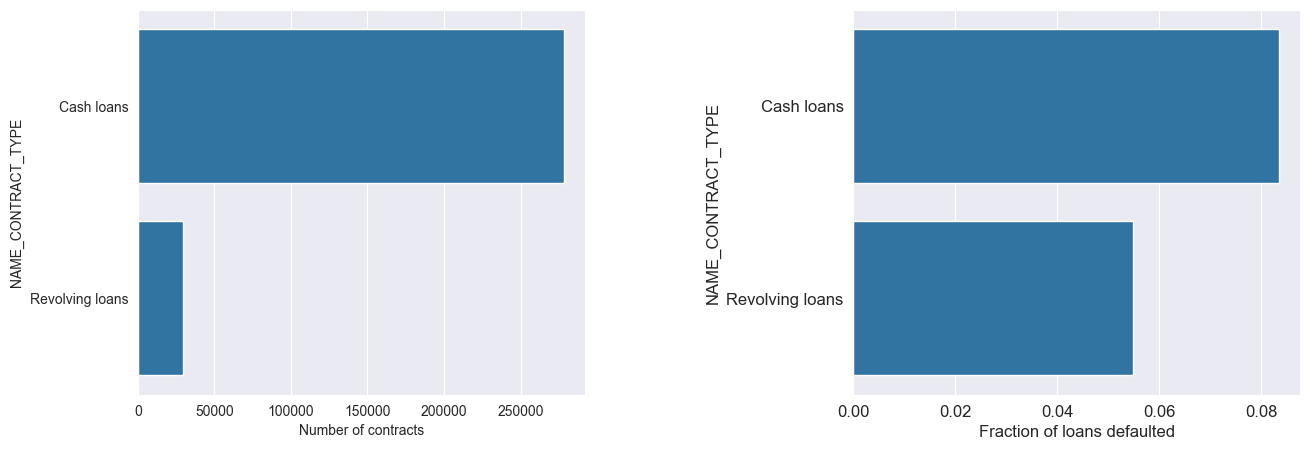

In [12]:
plot_bar_gen('NAME_CONTRACT_TYPE')

For the feature, gender, we see that there are more loans taken by males and they are also more defaulted by them.

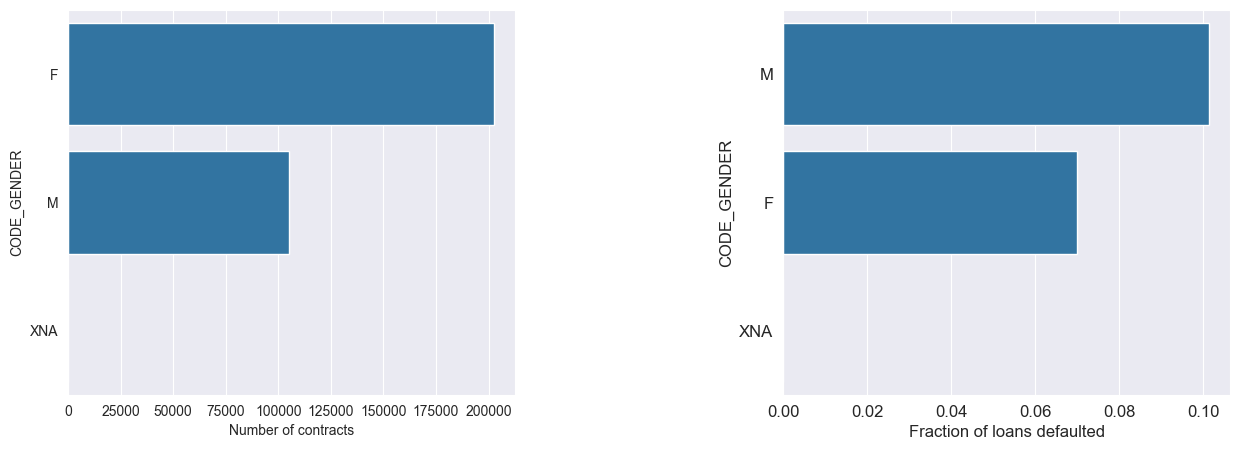

In [19]:
plot_bar_gen('CODE_GENDER')

For the feature, owning car, we see that there are more loans taken by those without car and they are also more defaulted by them.

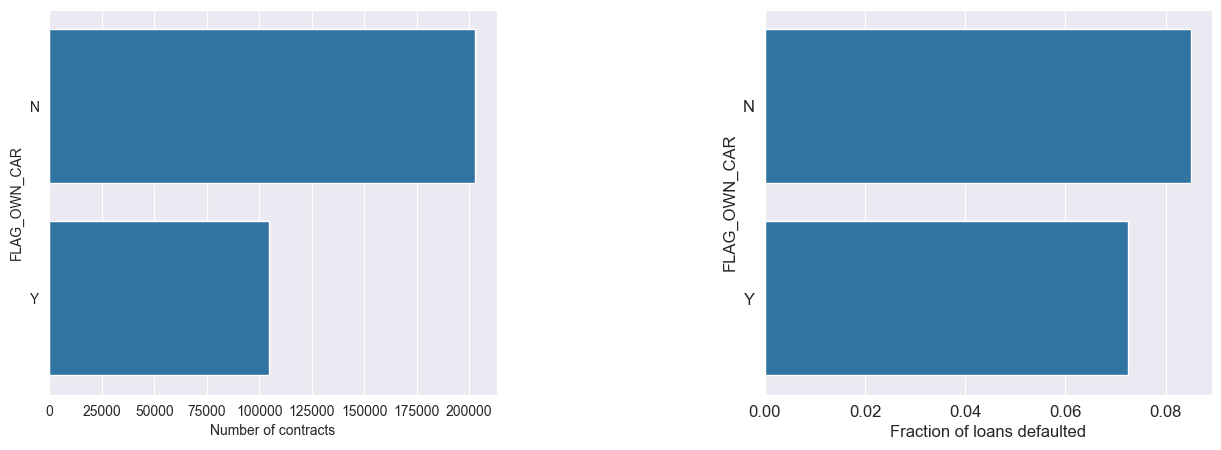

In [20]:
plot_bar_gen('FLAG_OWN_CAR')

For the feature, owning realty, we see that there are more loans taken by those with realty and they are defaulted slightly more by those without realty.

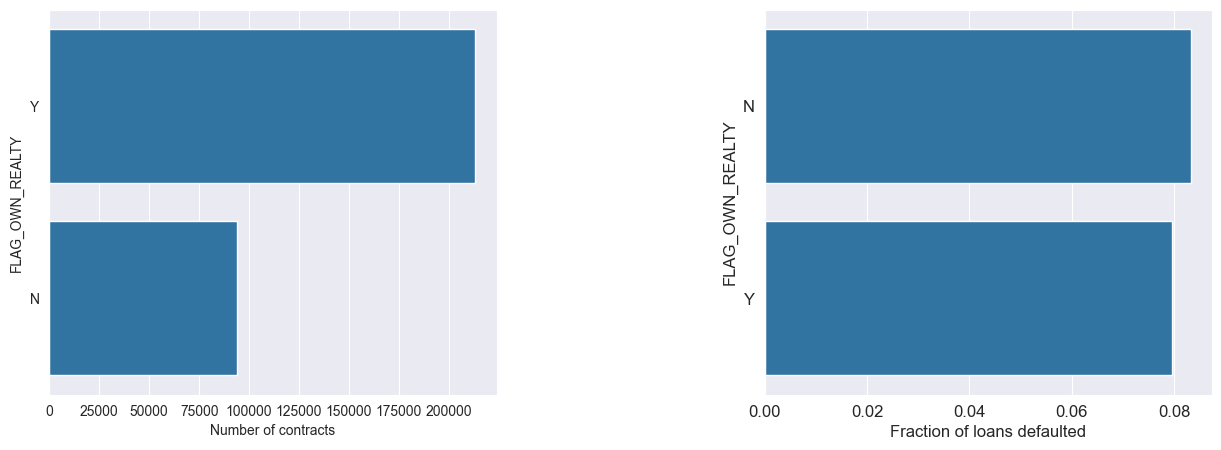

In [21]:
plot_bar_gen('FLAG_OWN_REALTY')

For the feature, family status, we see that there are more loans taken by those who are married and they are more defaulted by those who are in a civil marriage/single

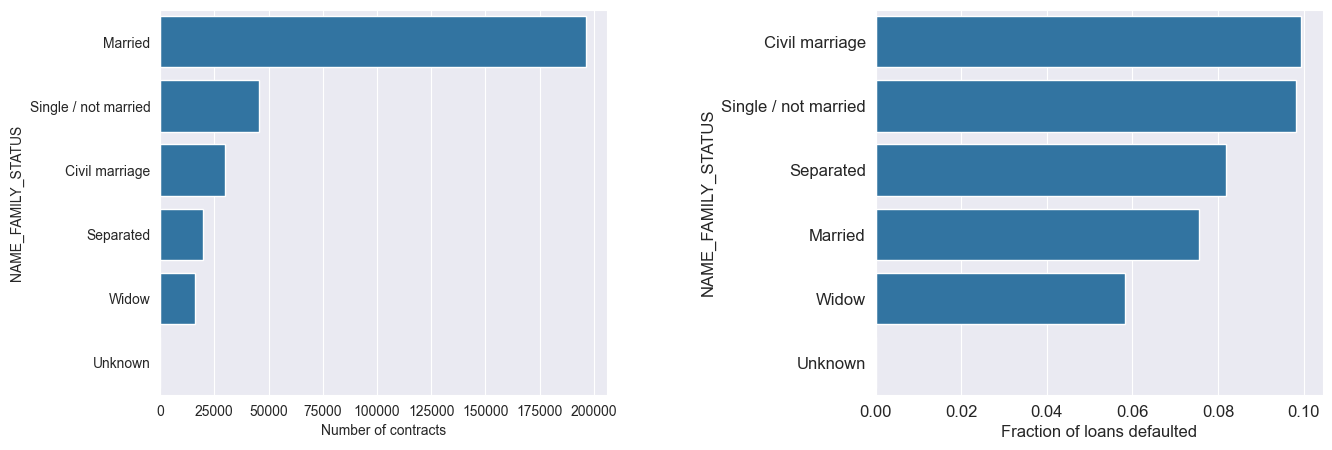

In [22]:
plot_bar_gen('NAME_FAMILY_STATUS')

For the feature, income type, we see that there are more loans taken by those who are working and they are more defaulted by those who are on maternity leave or unemployed

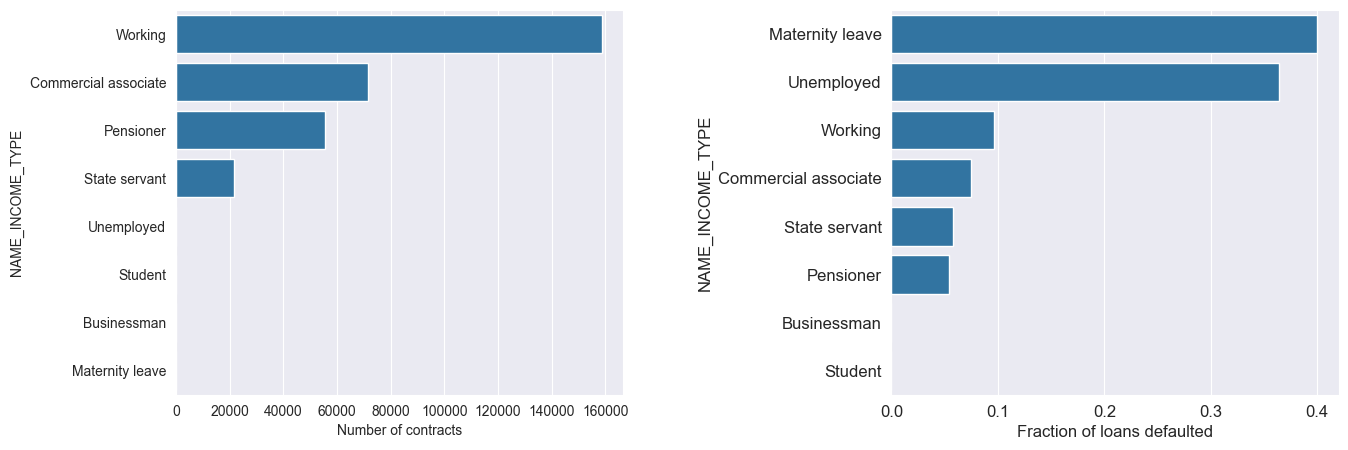

In [23]:
plot_bar_gen('NAME_INCOME_TYPE')

For the feature, children count, we see that there are more loans taken by those who have fewer children and they are more defaulted by those who have more children

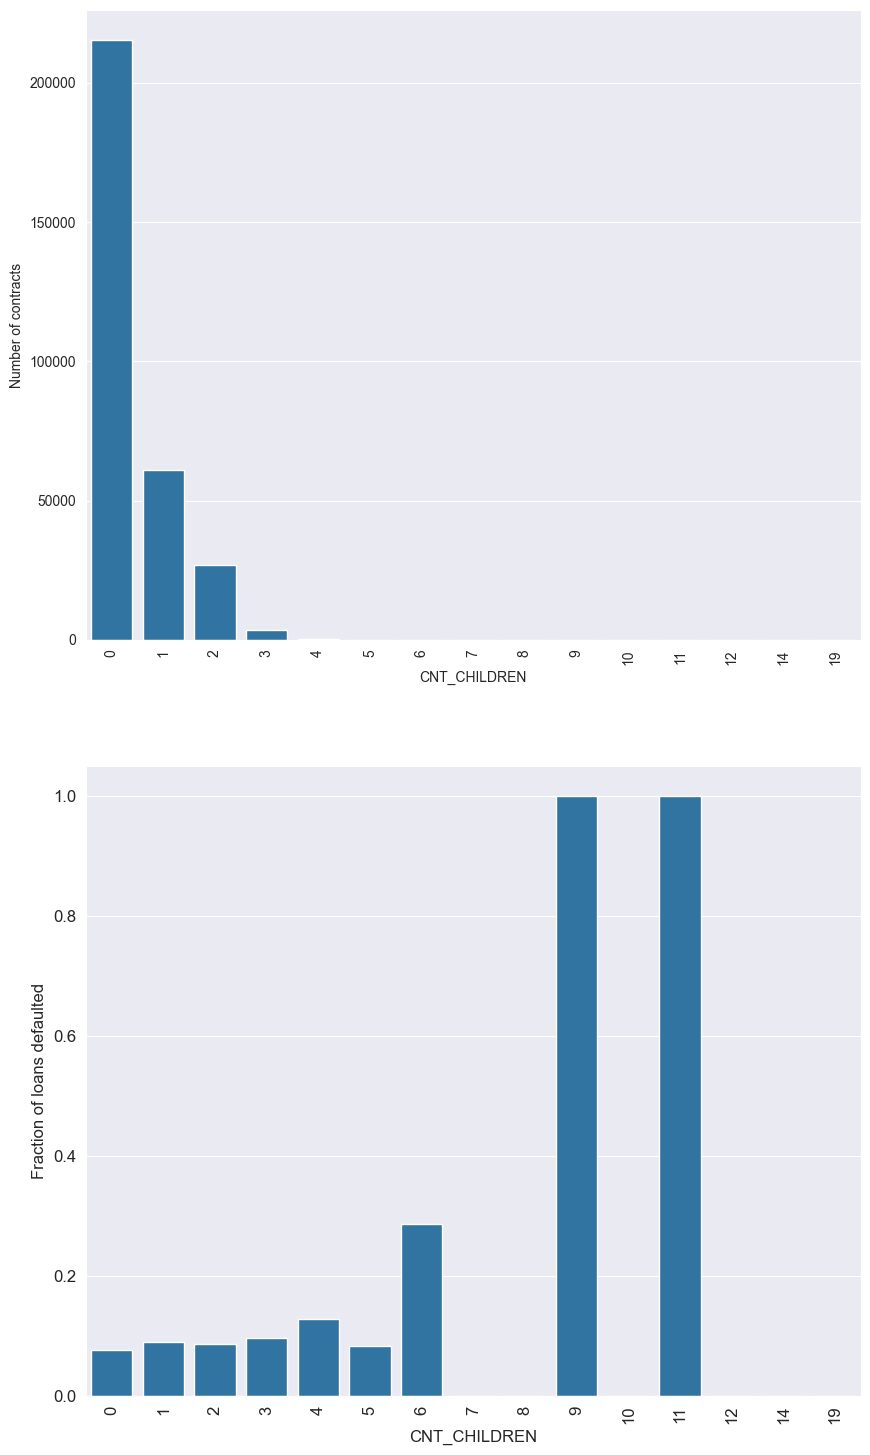

In [24]:
plot_bar_gen('CNT_CHILDREN',None,False)

For the feature, family member count, we see that there are more loans taken by those who have fewer family member and they are more defaulted by those who have more members

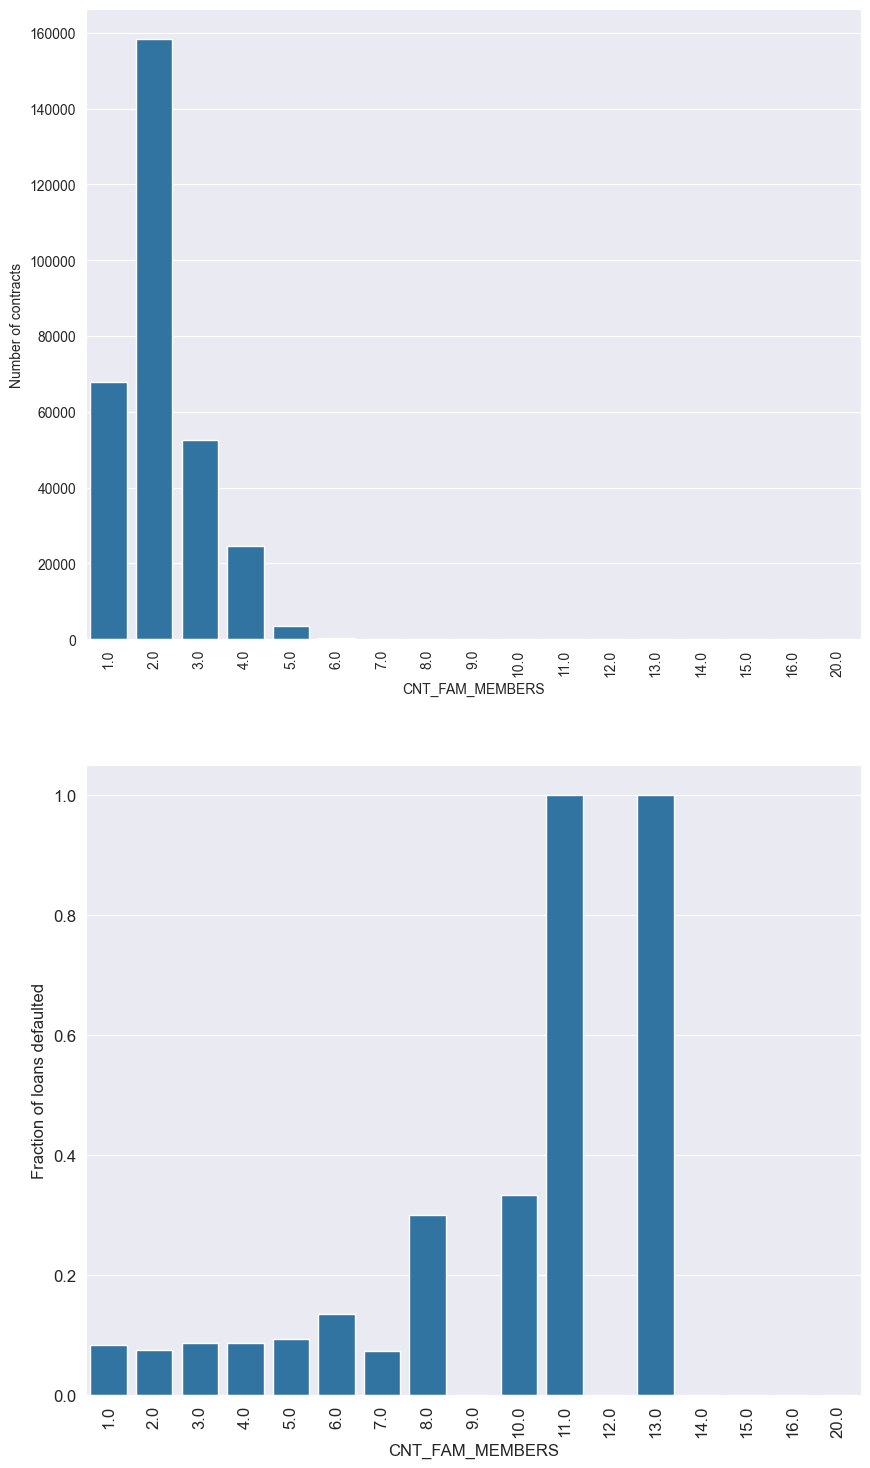

In [25]:
plot_bar_gen('CNT_FAM_MEMBERS',None,False)

For the feature, occupation type, we see that there are more loans taken categories like laborers and they are more defaulted by them too

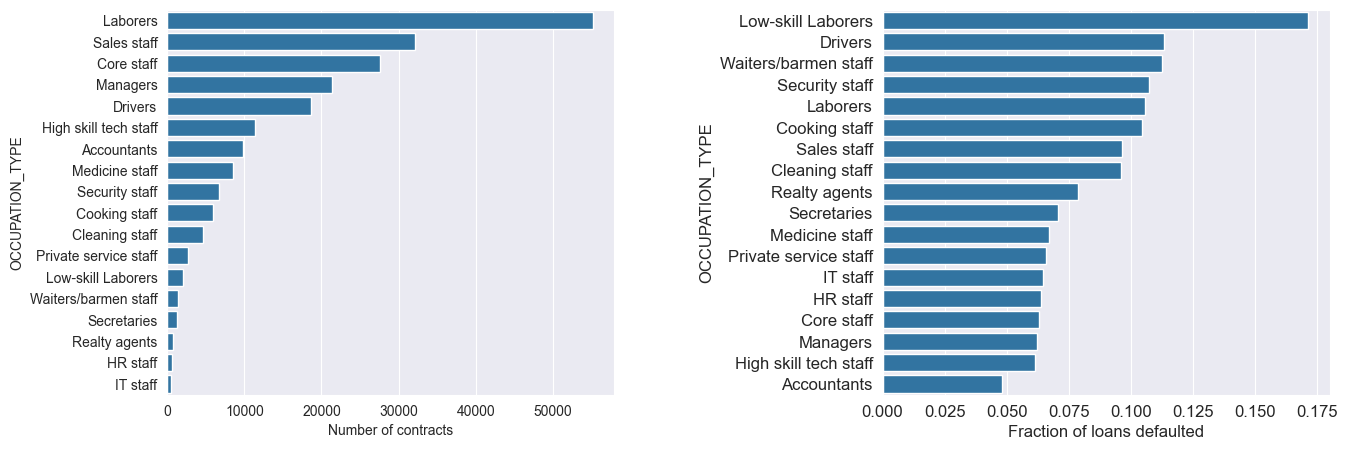

In [26]:
plot_bar_gen('OCCUPATION_TYPE')

For the feature, organization type, we see that there are more loans taken by categories like business entities, self-employed,and miscellaneous groups not categorized. They are more defaulted by those in certain industries

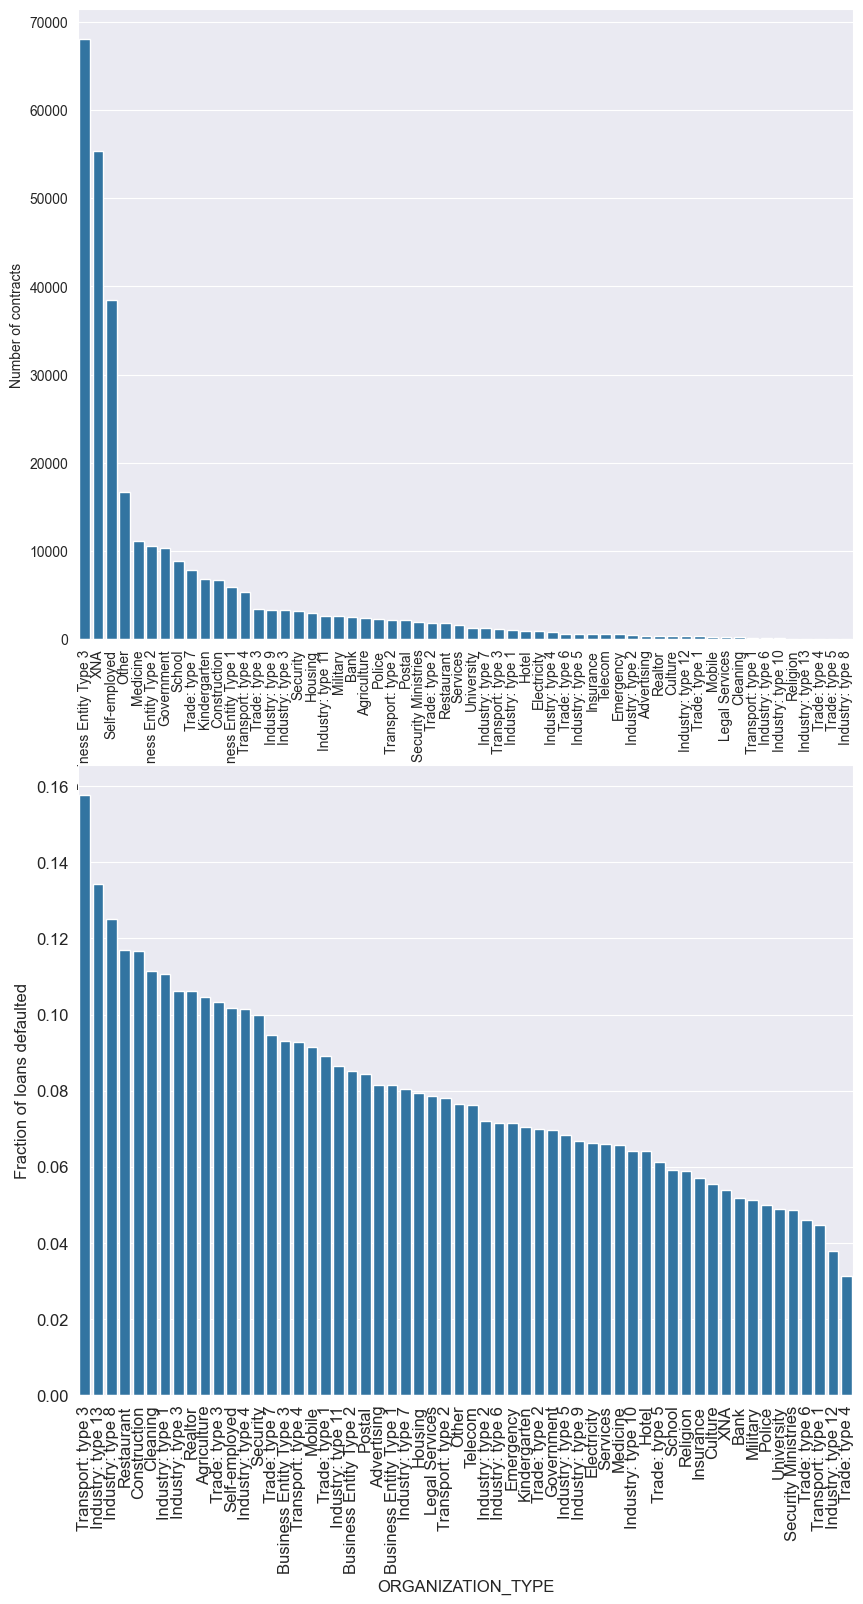

In [27]:
plot_bar_gen('ORGANIZATION_TYPE',None,False)

For the feature, education type, we see that there are more loans taken by those with secondary education and they are more defaulted by those who have less education

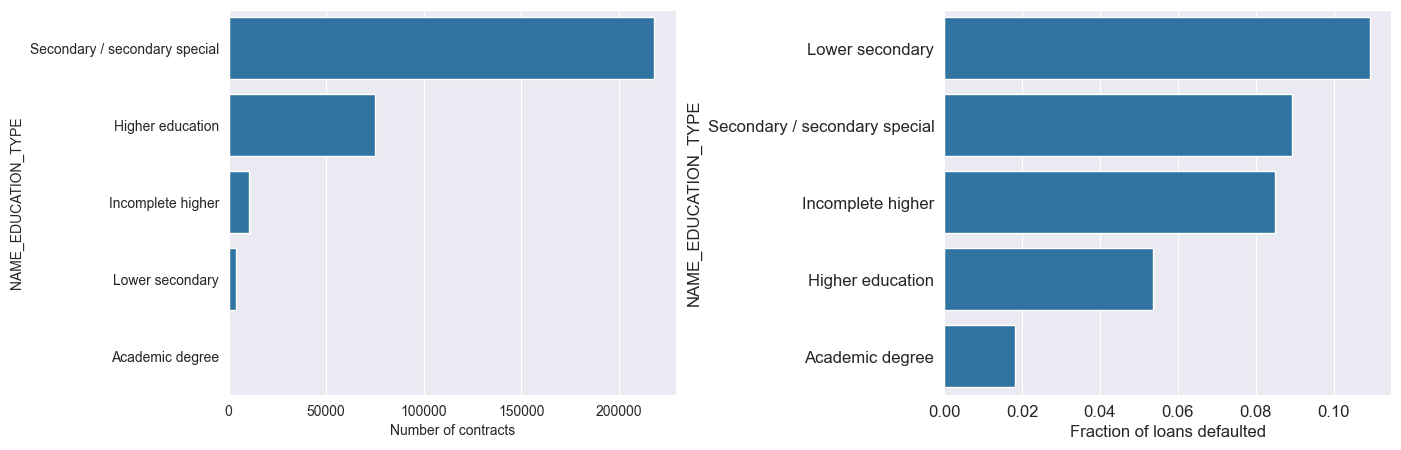

In [28]:
plot_bar_gen('NAME_EDUCATION_TYPE')

For the feature, housing type, we see that there are more loans taken by those with a house/apartment and they are more defaulted by those who have rented apartment or live with parents

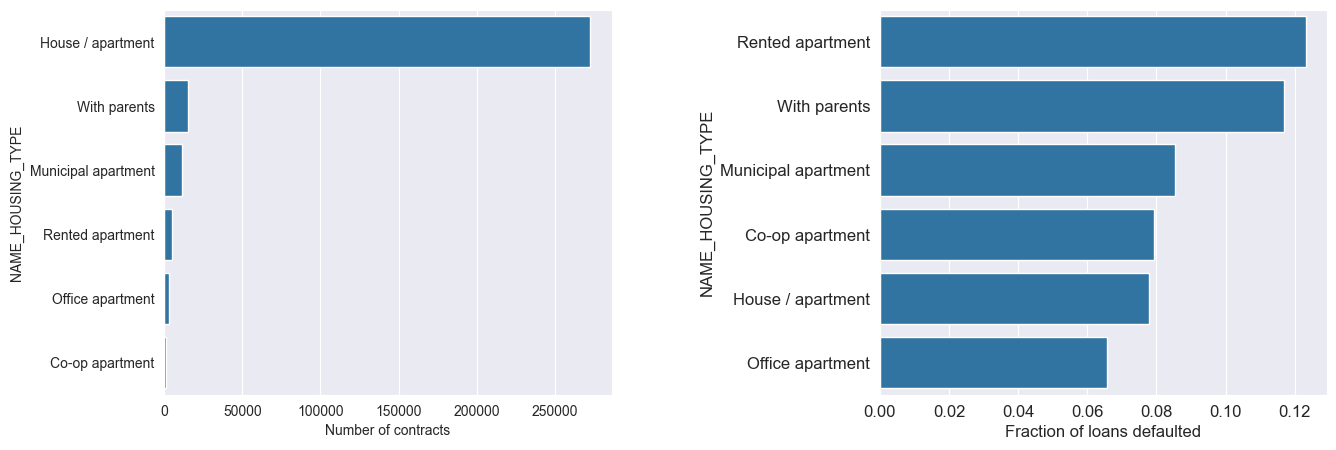

In [29]:
plot_bar_gen('NAME_HOUSING_TYPE')

For the feature, region not living region, we see that there are more loans are taken by those living in same region (0) and they are more defaulted by those who don't live in same region

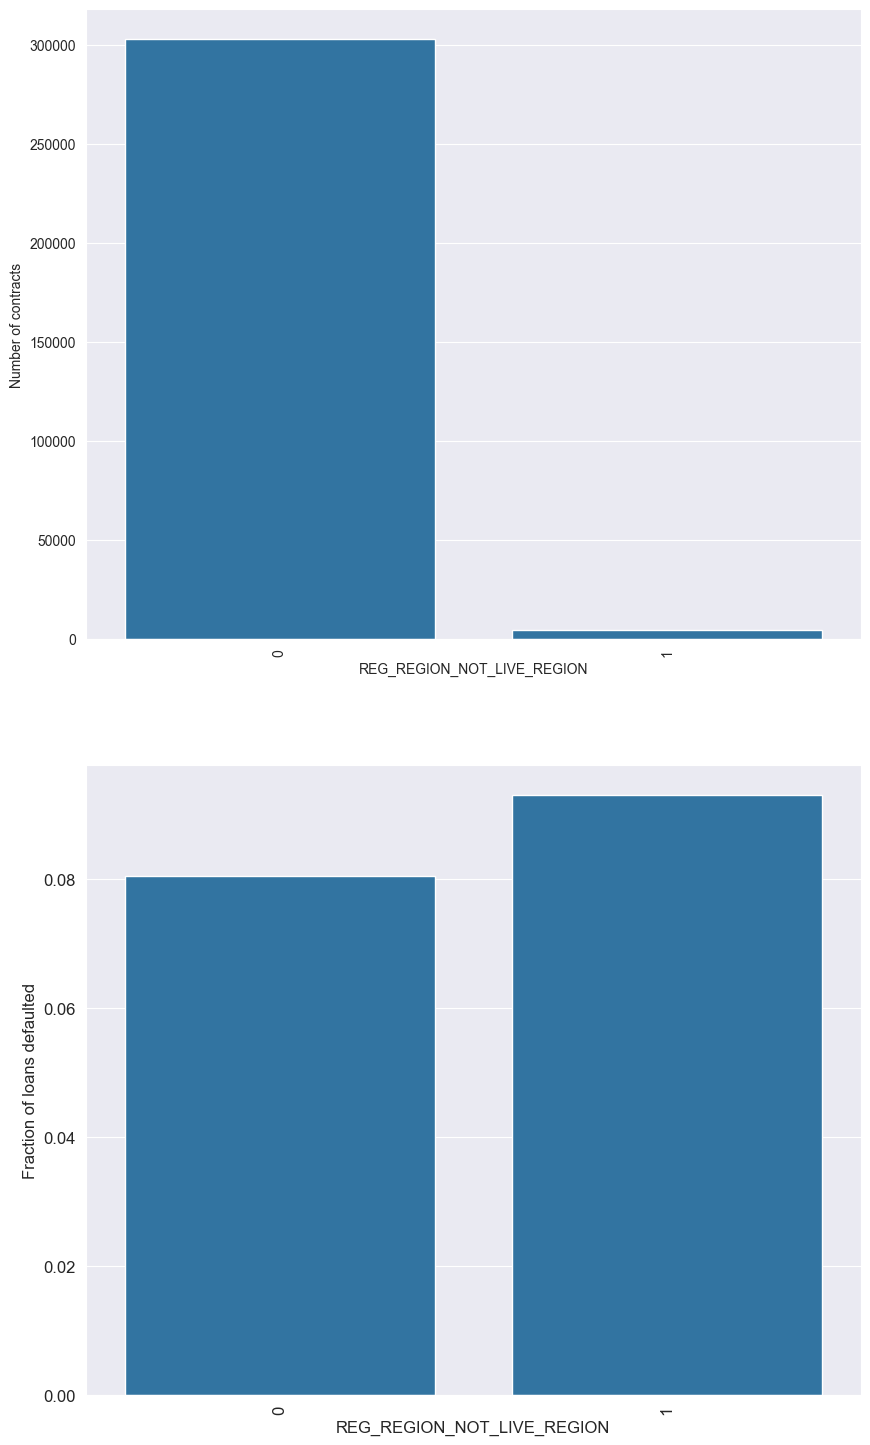

In [30]:
plot_bar_gen('REG_REGION_NOT_LIVE_REGION',None,False)

For the feature, region not work region, we see that there are more loans are taken by those working in same region (0) and they are more defaulted by those who don't work in same region

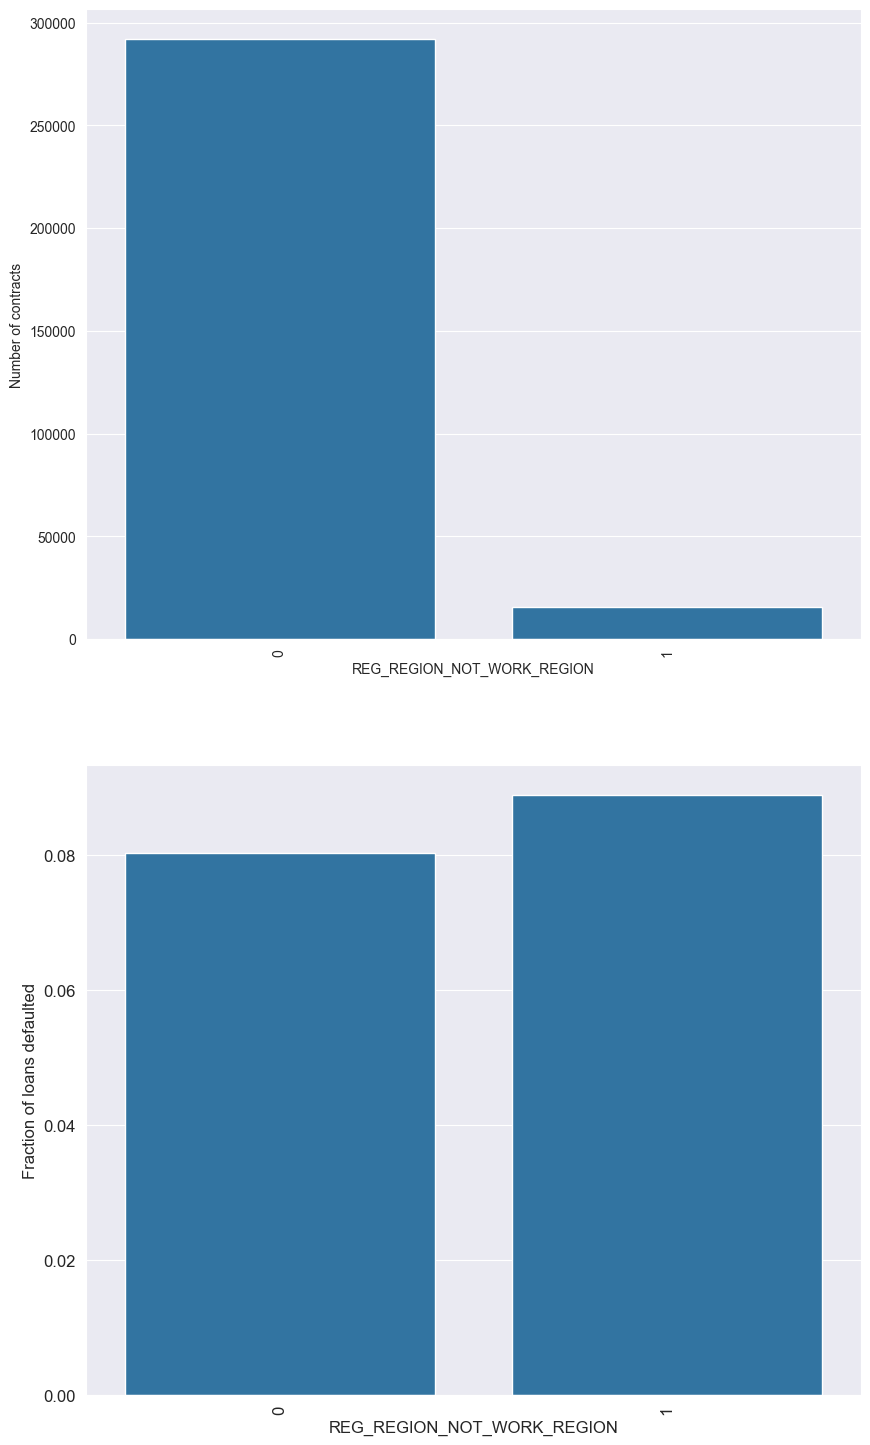

In [31]:
plot_bar_gen('REG_REGION_NOT_WORK_REGION',None,False)

For the feature, city not living city, we see that there are more loans are taken by those living in same city (0) and they are more defaulted by those who don't live in same city

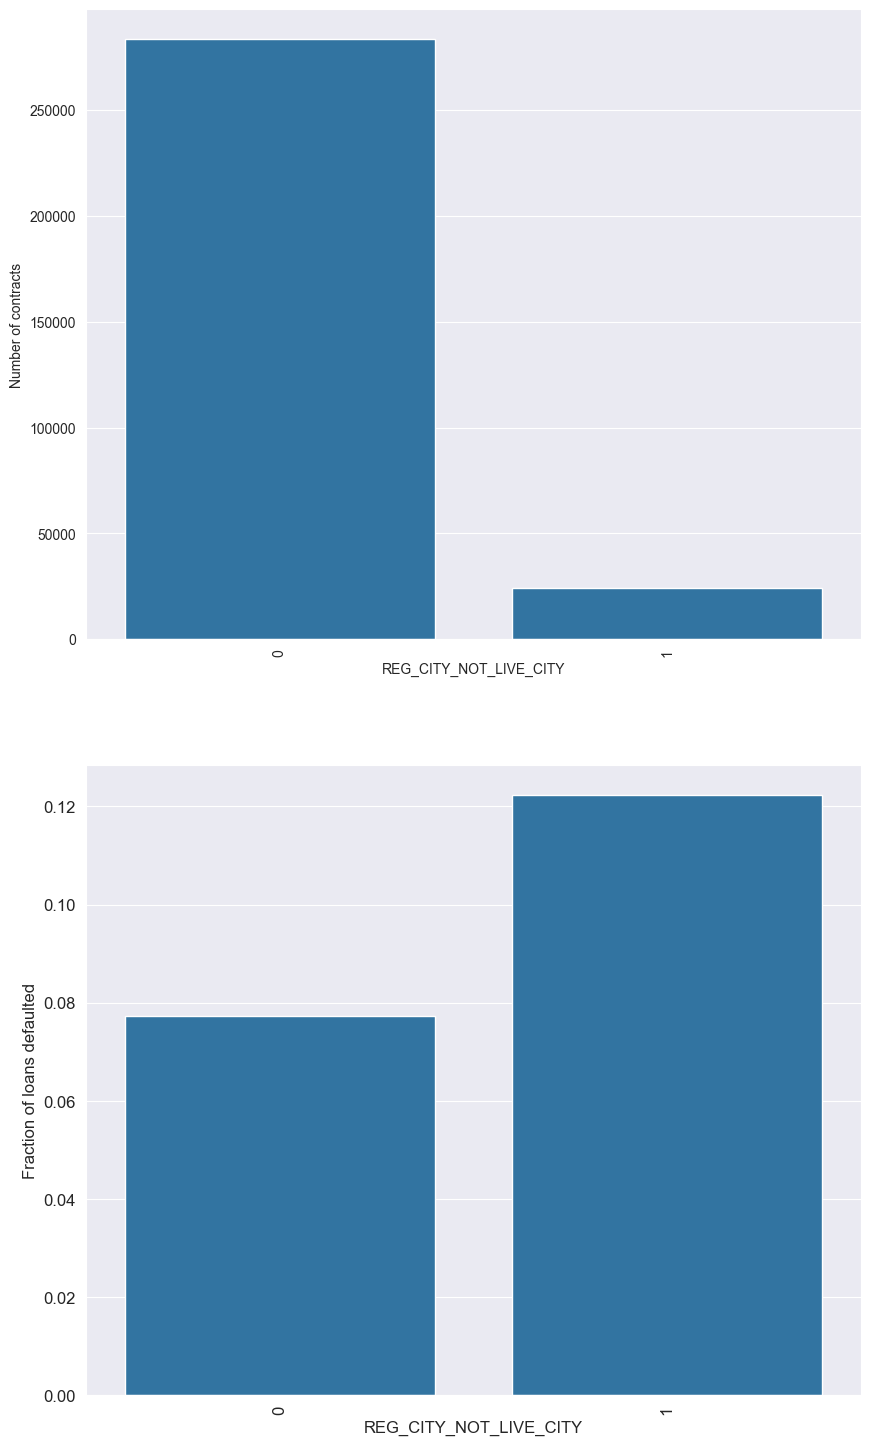

In [32]:
plot_bar_gen('REG_CITY_NOT_LIVE_CITY',None,False)

For the feature, city not working city, we see that there are more loans are taken by those working in same city (0) and they are more defaulted by those who don't work in same city

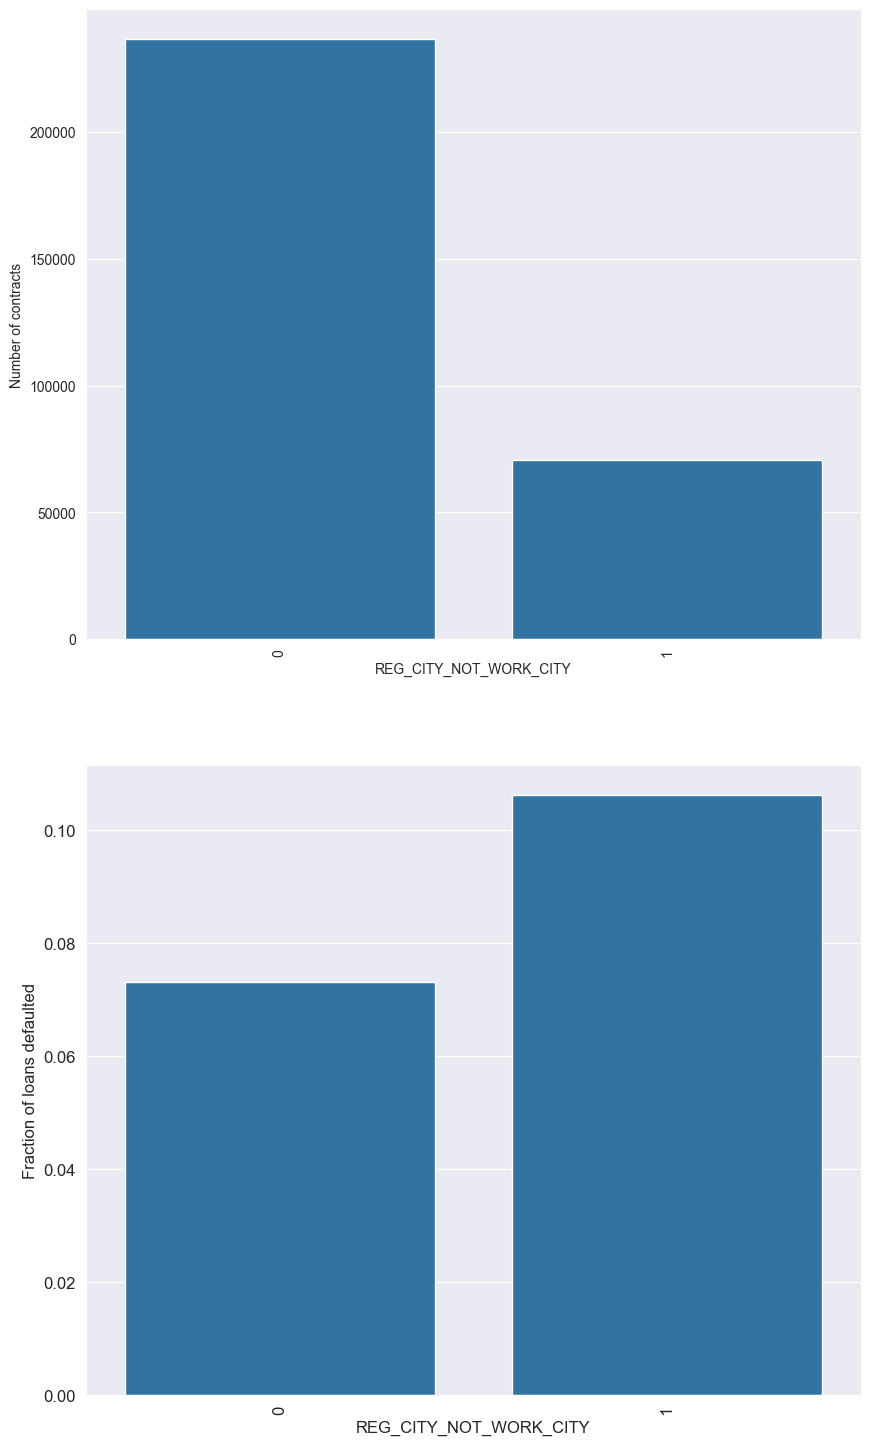

In [33]:
plot_bar_gen('REG_CITY_NOT_WORK_CITY',None,False)

For non-categorical features, we can plot bivariate distributions (with TARGET) to see if there is difference when loan is repaid or defaulted

In [34]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,df=None,separate_target=False):
    if df is None:
        df = application_train
    else:
        df = df
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(),color='red', kde=True,bins=100)
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
#         sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
#         sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

The function below can be used to identify outliers in the data distribution

In [35]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(application_train[feature])
    sdev=np.std(application_train[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

For the feature, days employed, we see that there is an issue in the data with outliers with days employed more than 350000 days (958 years) ! This needs to be corrected

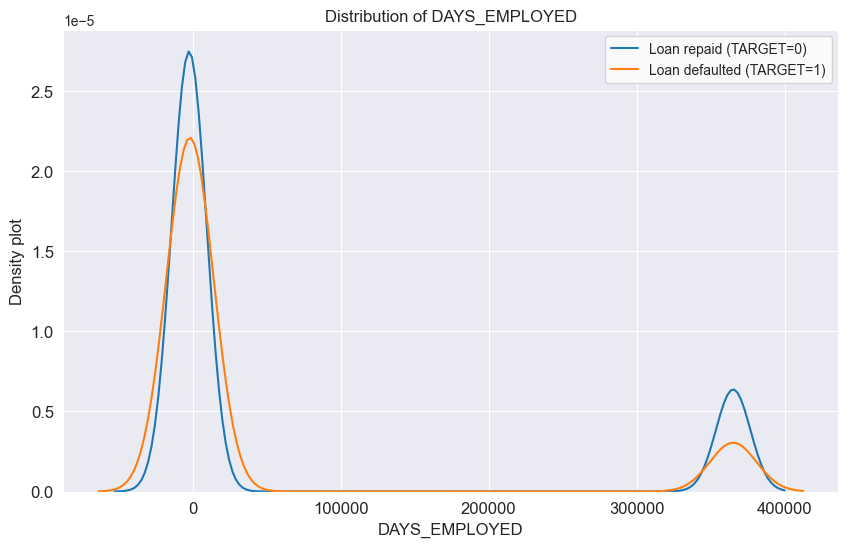

In [36]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)

For the feature, amount income total, we see that there is an issue in the data, possibly due to outliers. This needs to be corrected

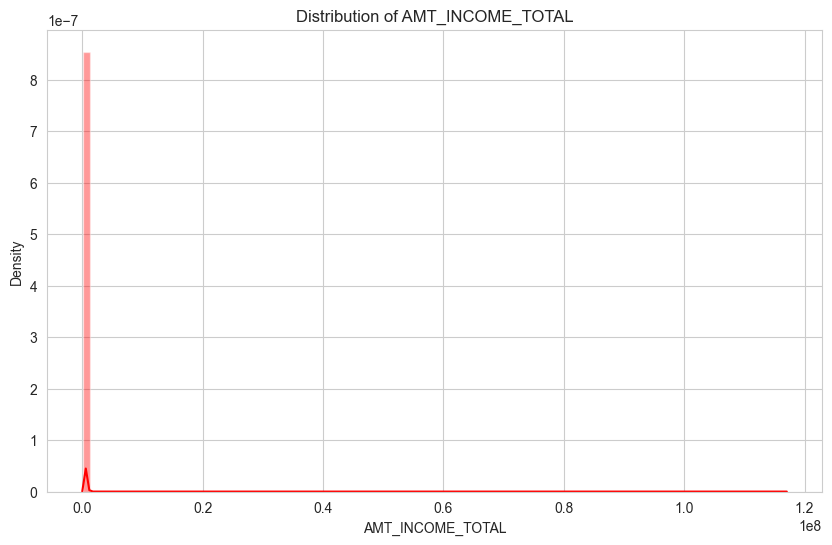

In [37]:
plot_distribution_gen('AMT_INCOME_TOTAL')

We can find the thresholds for outliers for the days employed and total income features, and replace the anomalous values with NaN

In [38]:
thresh_income = get_thresh('AMT_INCOME_TOTAL')
thresh_employment = get_thresh('DAYS_EMPLOYED')

anomalous_employment = application_train[application_train['DAYS_EMPLOYED'] > 0]
normal_employment = application_train[application_train['DAYS_EMPLOYED'] < 0]

print('The non-anomalies default on %0.2f%% of loans' % (100 * normal_employment['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalous_employment['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalous_employment))

Threshold for AMT_INCOME_TOTAL : 880166.2
Threshold for DAYS_EMPLOYED : 487641.66
The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [39]:
# Replace the anomalous values with nan

application_train['DAYS_EMPLOYED'].mask(application_train['DAYS_EMPLOYED'] > 0, inplace=True)
application_train['AMT_INCOME_TOTAL'].mask(application_train['AMT_INCOME_TOTAL'] > thresh_income, inplace=True)

The below function can be used to convert features which have days to years. The function can then be applied on all such features

In [40]:
def create_day_to_year(df,ls_cols,newcol):
    df[newcol] = round(np.abs(df[ls_cols[0]]/365))
    df.drop(columns=ls_cols,inplace=True);
    return df

For the feature, AGE, we can see that there are more number of loans defaulted by younger people

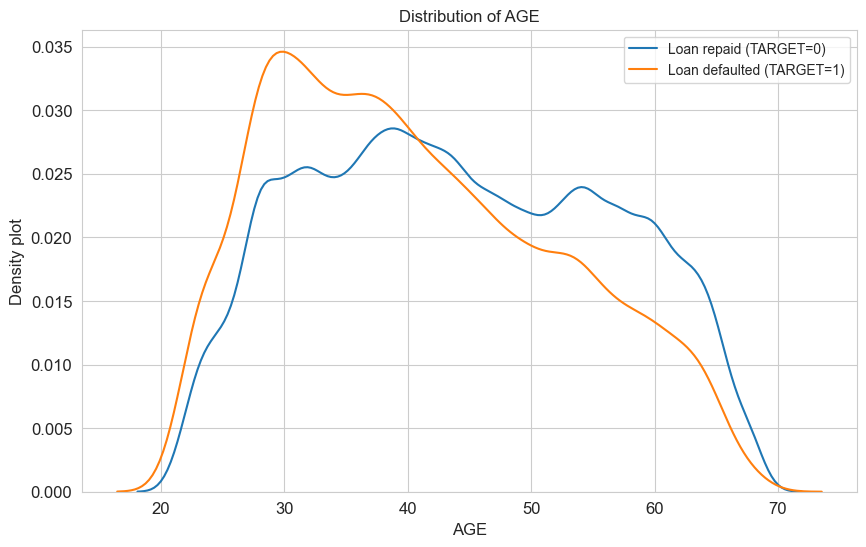

In [41]:
create_day_to_year(application_train,['DAYS_BIRTH'],'AGE');
plot_distribution_gen('AGE',None,True)

For the feature, YEARS_EMPLOYED, we can see that there are more number of loans defaulted by people who are employed for fewer years

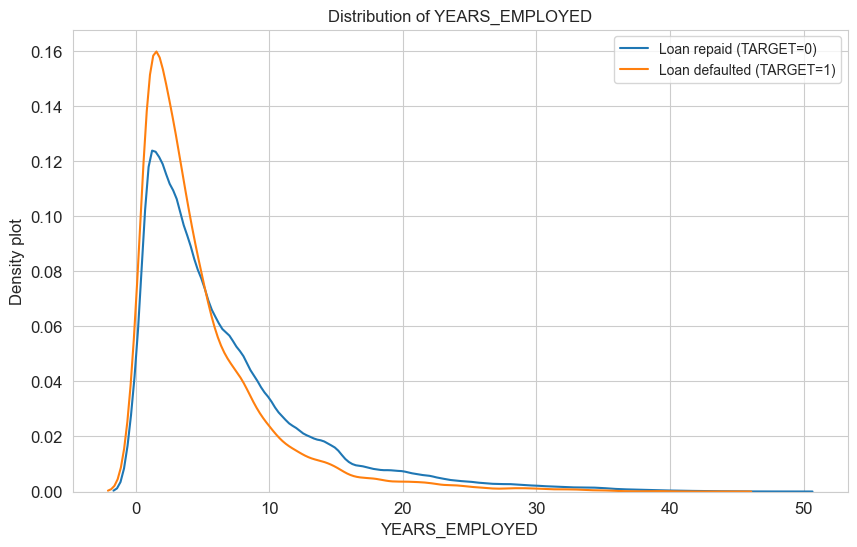

In [42]:
create_day_to_year(application_train,['DAYS_EMPLOYED'],'YEARS_EMPLOYED');
plot_distribution_gen('YEARS_EMPLOYED',None,True)

Now we can revisit the total income feature after removing outliers and we see the minor differences in distributions when loans are repaid or defaulted.

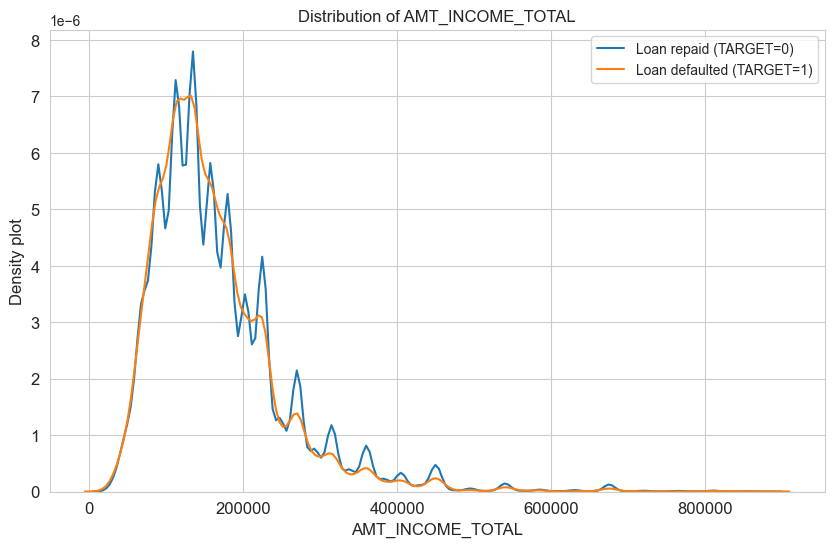

In [43]:
plot_distribution_gen('AMT_INCOME_TOTAL',None,True)

For the feature, EXT_SOURCE_1, we can see that as value of EXT_SOURCE_1 increases, the probability of loan being repaid also increases.

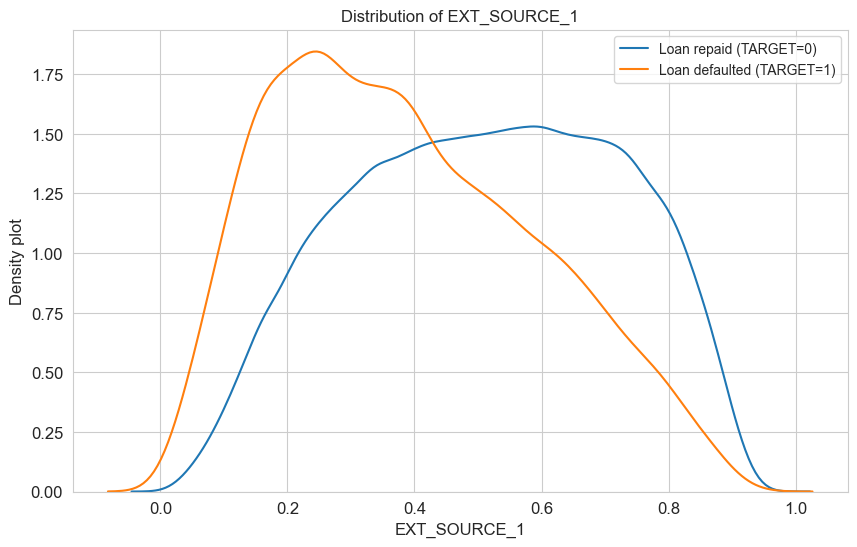

In [44]:
plot_distribution_gen('EXT_SOURCE_1',None,True)

For the feature, EXT_SOURCE_2, we can see that as value of EXT_SOURCE_2 increases, the probability of loan being repaid also increases.

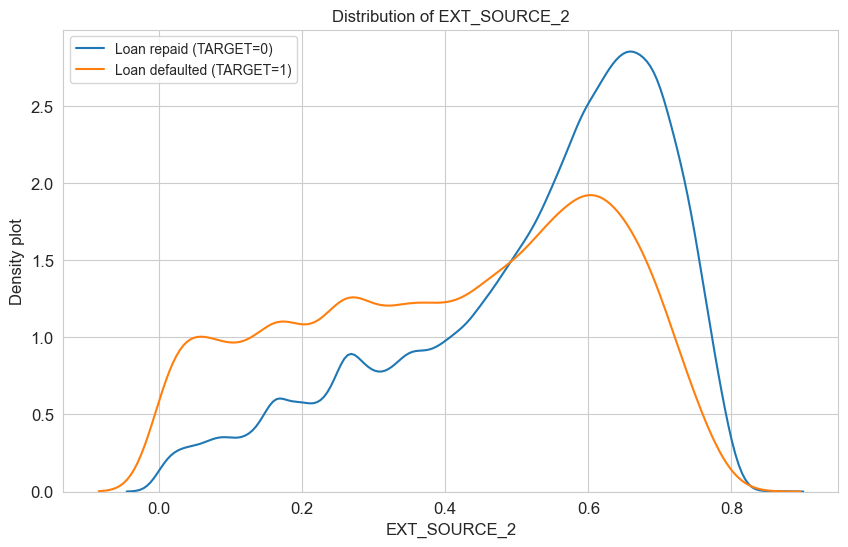

In [45]:
plot_distribution_gen('EXT_SOURCE_2',None,True)

For the feature, EXT_SOURCE_3, we can see that as value of EXT_SOURCE_3 increases, the probability of loan being repaid also increases.

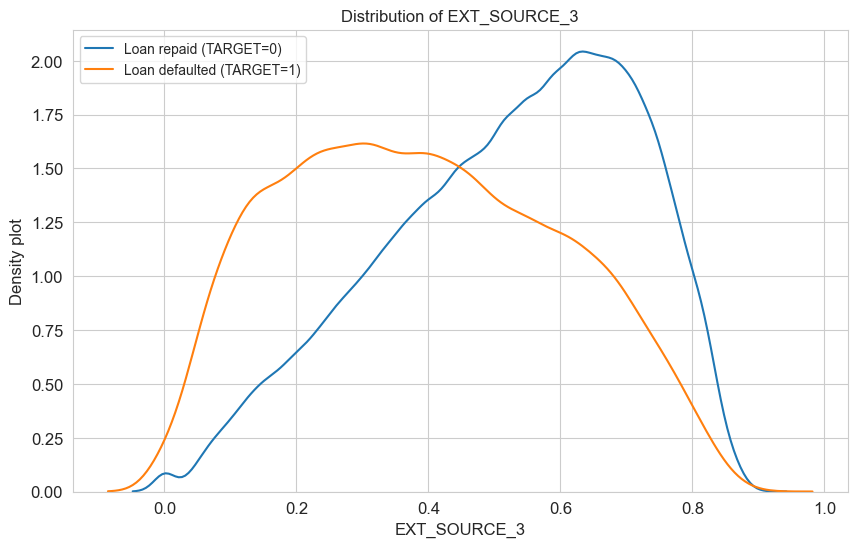

In [46]:
plot_distribution_gen('EXT_SOURCE_3',None,True)

All the features related to amount ('AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE') can be plotted along with TARGET as a heatmap to see if there are any possible correlations. We see in most cases that the repaid loans (TARGET = 0) have higher values.

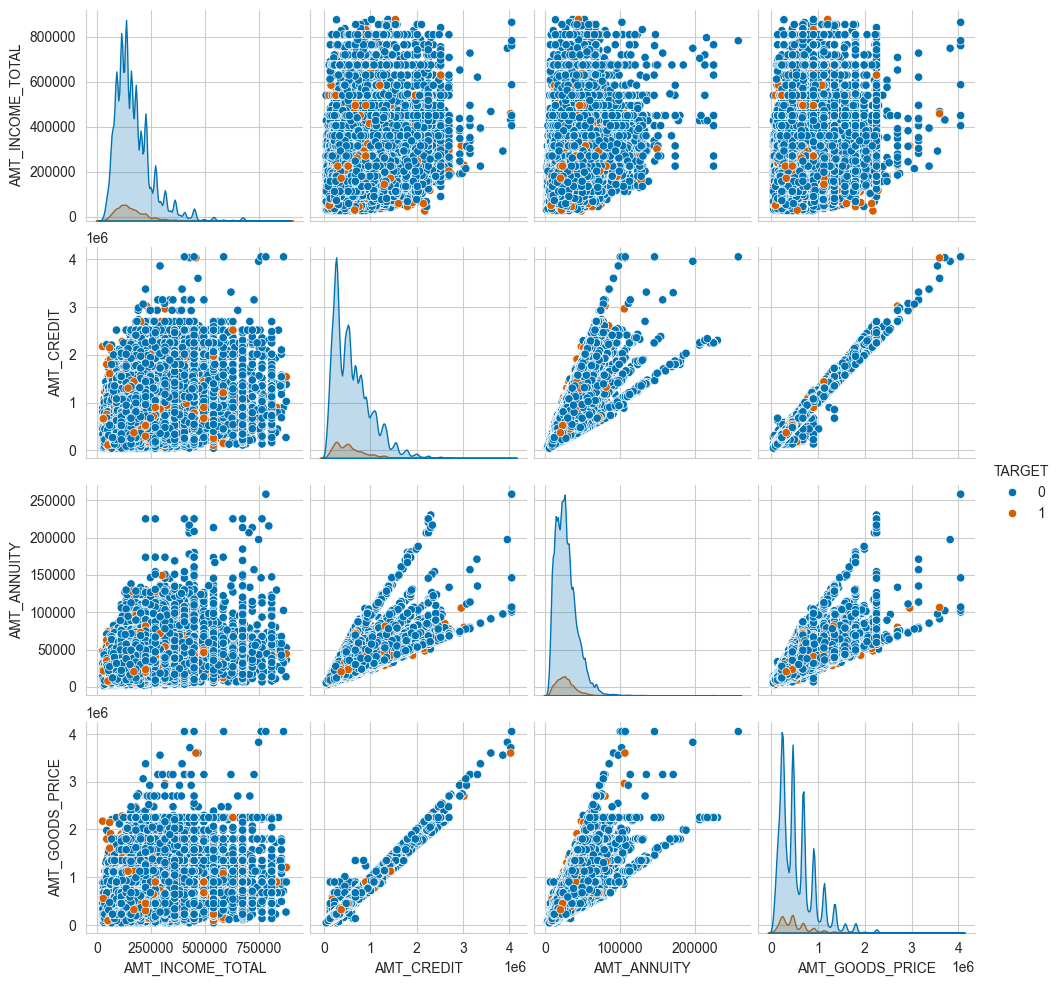

In [47]:
amt = application_train[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
g = sns.pairplot(amt,hue="TARGET",palette=["b","r"])  

plt.show()

For the feature, YEARS_REGISTRATION, we can see that there are more number of loans defaulted for lower number of years

In [48]:
create_day_to_year(application_train,['DAYS_REGISTRATION'],'YEARS_REGISTRATION');

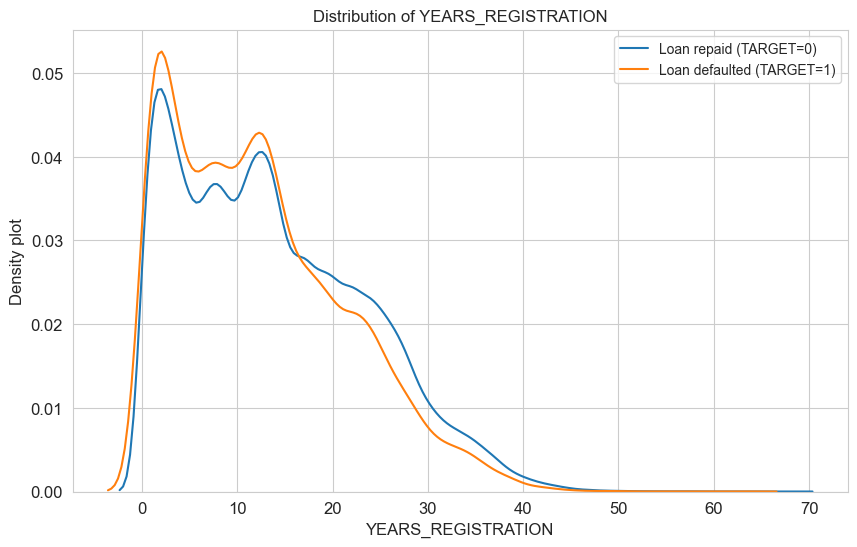

In [49]:
plot_distribution_gen('YEARS_REGISTRATION',None,True)

For the feature, YEARS_ID_PUBLISH, we can see that there are more number of loans defaulted for lower number of years

In [50]:
create_day_to_year(application_train,['DAYS_ID_PUBLISH'],'YEARS_ID_PUBLISH');

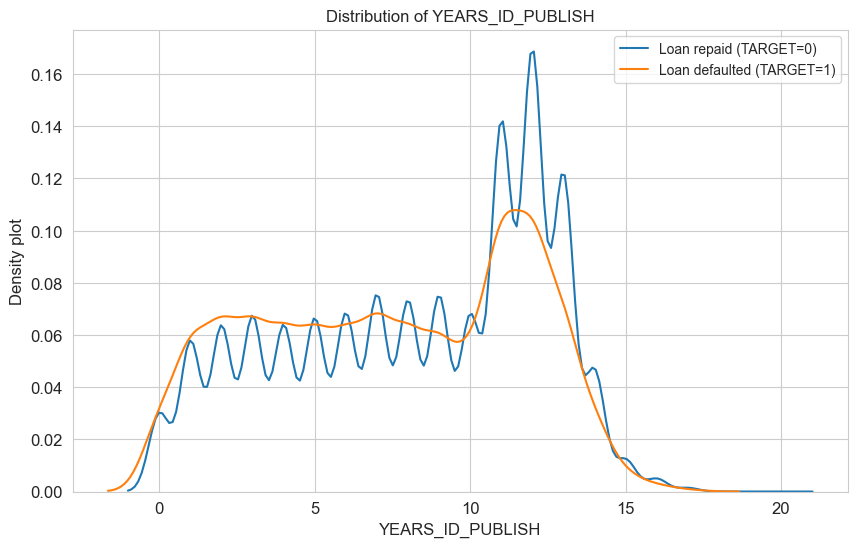

In [51]:
plot_distribution_gen('YEARS_ID_PUBLISH',None,True)

The below function can create income bands for the individuals using income ranges from income total

In [52]:
# Create INCOME_BAND to group individuals per income range

def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [53]:
create_income_band(application_train);

Observing the income bands for those with defaulting loans vs those with repaid loans, we do not see any major differences, but the distribution of repaid loans slightly increases for higher income bands. 

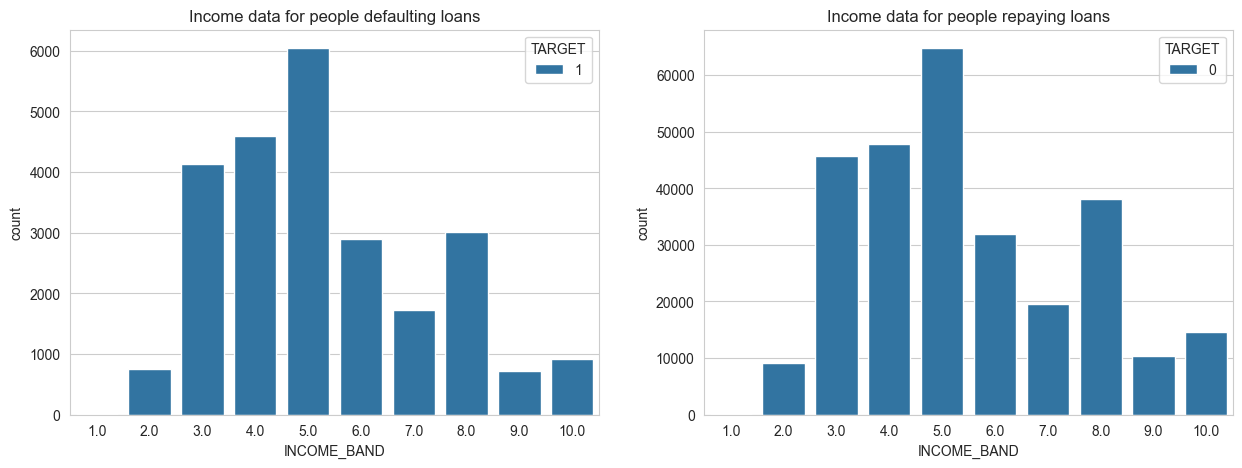

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=application_train[application_train.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.subplot(122)
sns.countplot(data=application_train[application_train.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')
application_train.drop(columns=['INCOME_BAND'],inplace=True);

---

The exploratory data analysis can be continued into other datasets. For example, in the dataset, bureau, the feature distributions can be seen below

In [55]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [56]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


For the feature, CREDIT_ACTIVE, we see that there are more loans taken by those without active credit and they are more defaulted by those who have bad debt or sold credit

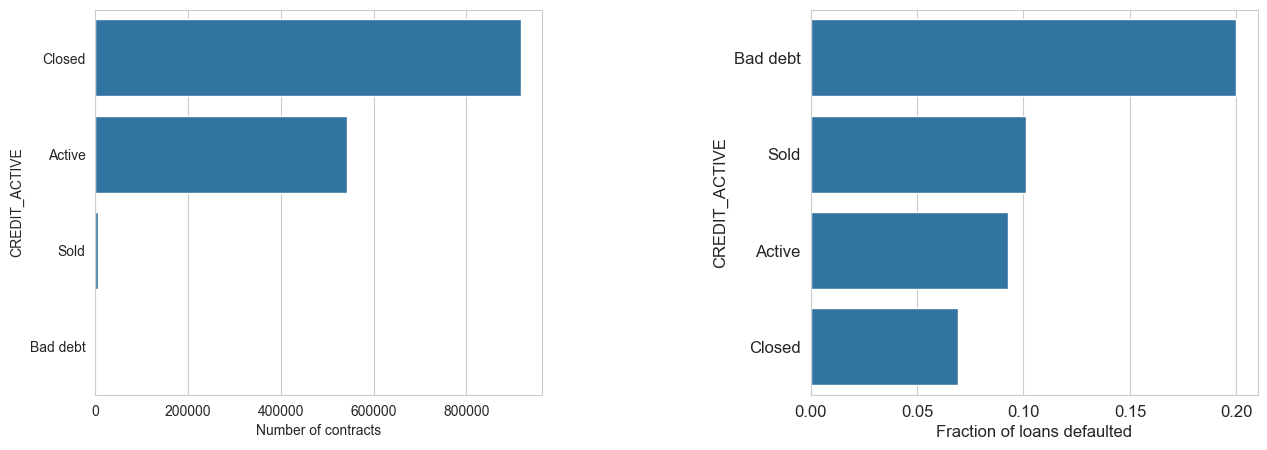

In [57]:
plot_bar_gen('CREDIT_ACTIVE',application_bureau_train)

For the feature, CREDIT_CURRENCY, we see that there are most loans taken by those using currency 1 and they are more defaulted by those who use currency 3

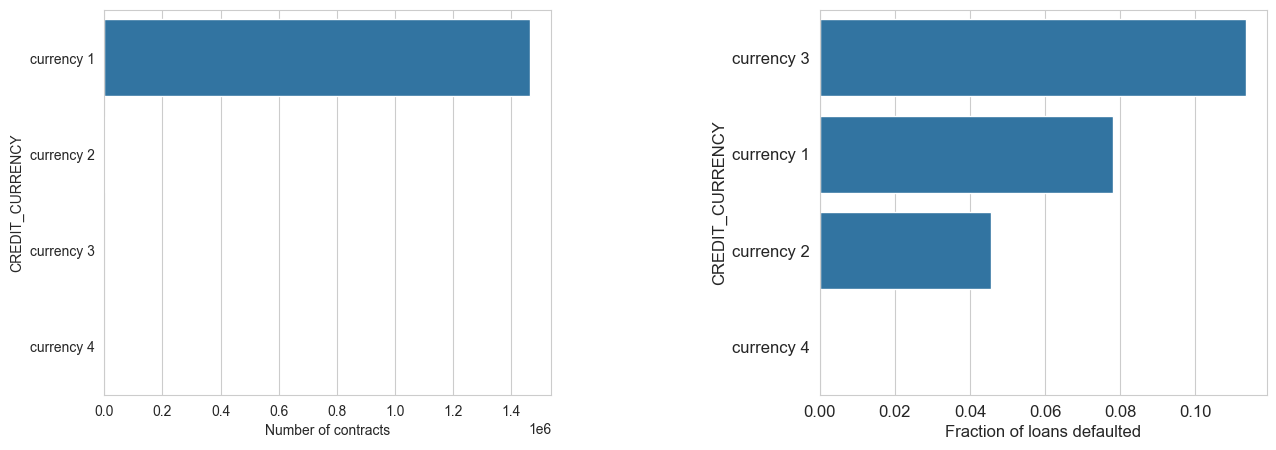

In [58]:
plot_bar_gen('CREDIT_CURRENCY',application_bureau_train)

For the feature, CREDIT_TYPE, we see that there are most loans taken by those with consumer credit/credit card and they are more defaulted by those who use loans for equipment purchase or microloans

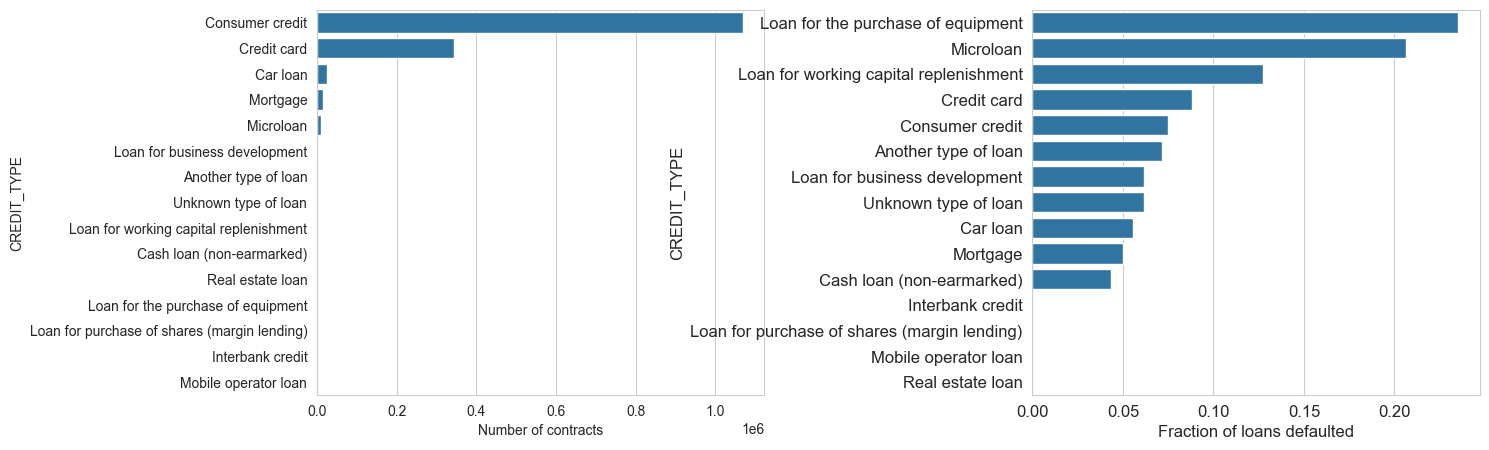

In [59]:
plot_bar_gen('CREDIT_TYPE',application_bureau_train)

---

Continuing the analysis for the dataset, previous_application, the feature distributions can be seen below

In [60]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [61]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ", 
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


For the feature, NAME_CONTRACT_TYPE, we see that there are almost equal previous cash/consumer loans and they are more defaulted by those whose info is not-available (XNA)

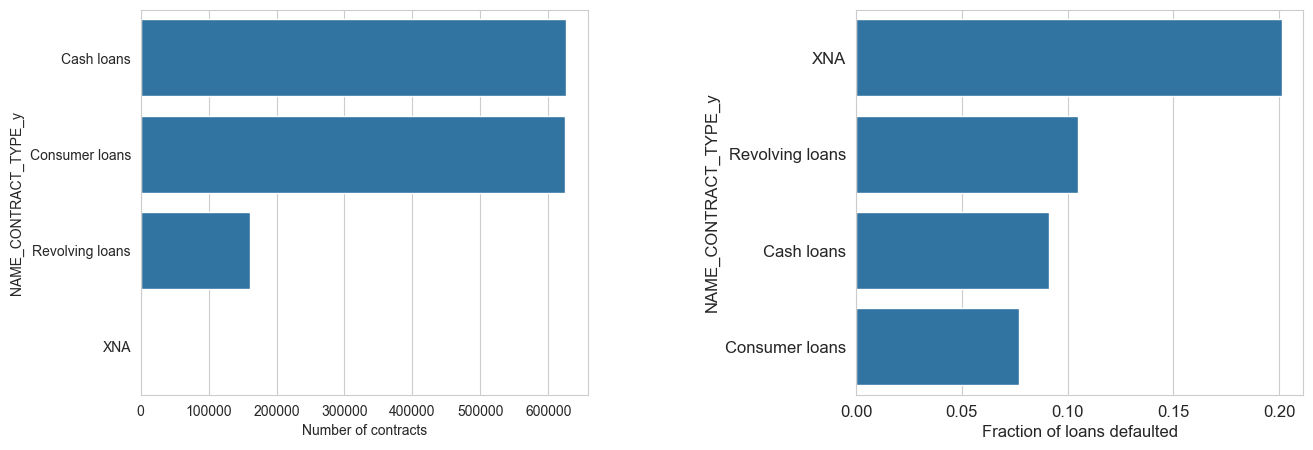

In [62]:
plot_bar_gen('NAME_CONTRACT_TYPE_y',application_prev_train)

For the feature, NAME_CASH_LOAN_PURPOSE, we see that most previous loans were for XAP/XNA and they are more defaulted by those who refuse to name the goal or for hobbies, car repairs

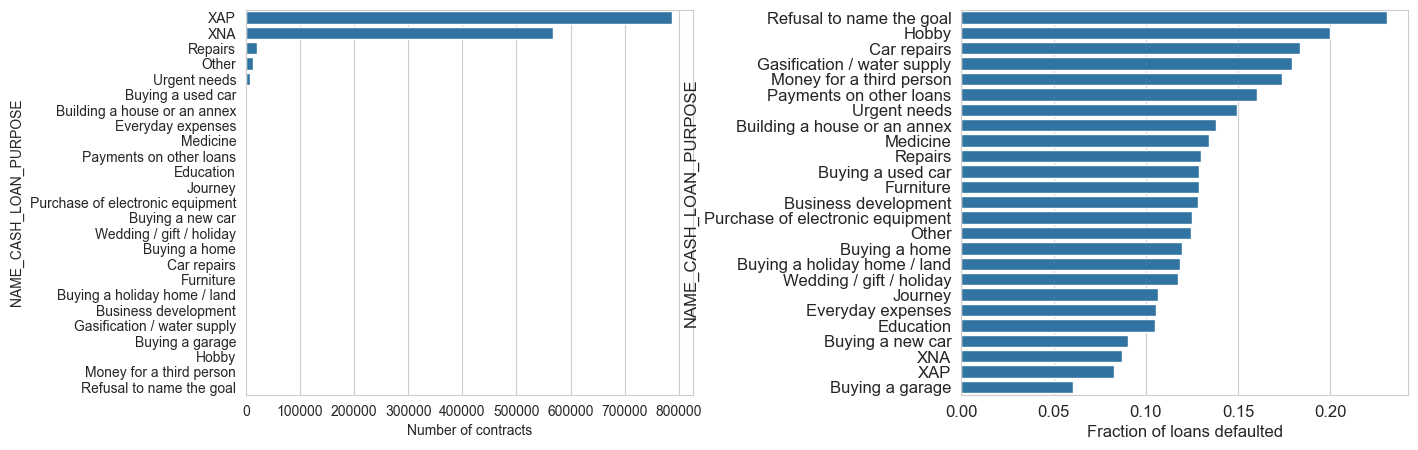

In [63]:
plot_bar_gen('NAME_CASH_LOAN_PURPOSE',application_prev_train)

For the feature, NAME_CONTRACT_STATUS, we see that most previous loans were approved and they are more defaulted by those who were refused or canceled

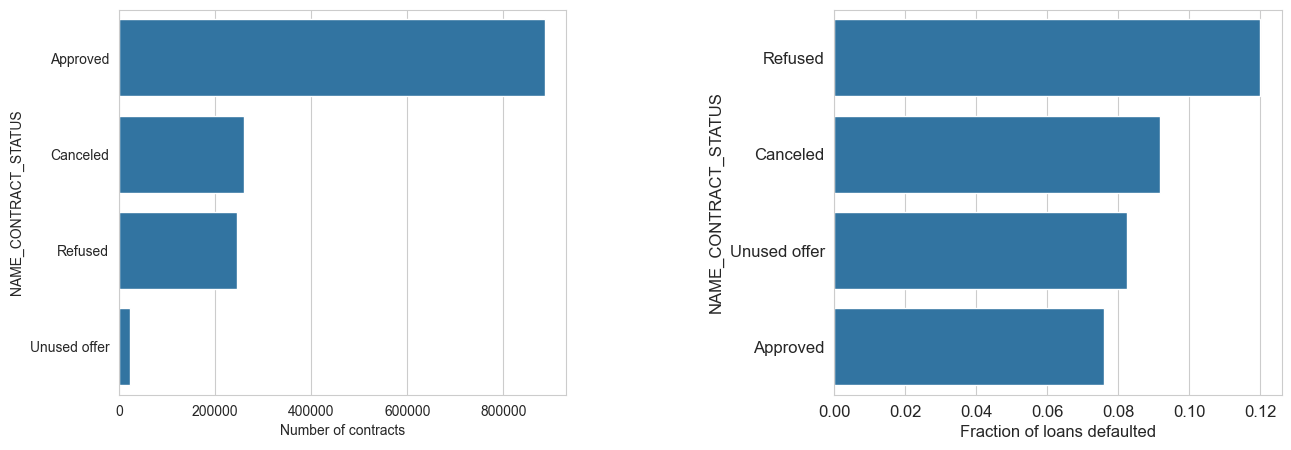

In [64]:
plot_bar_gen('NAME_CONTRACT_STATUS',application_prev_train)

For the feature, NAME_PAYMENT_TYPE, we see that most previous loans were for cash through bank and they are more defaulted by XNA and non-cash from account

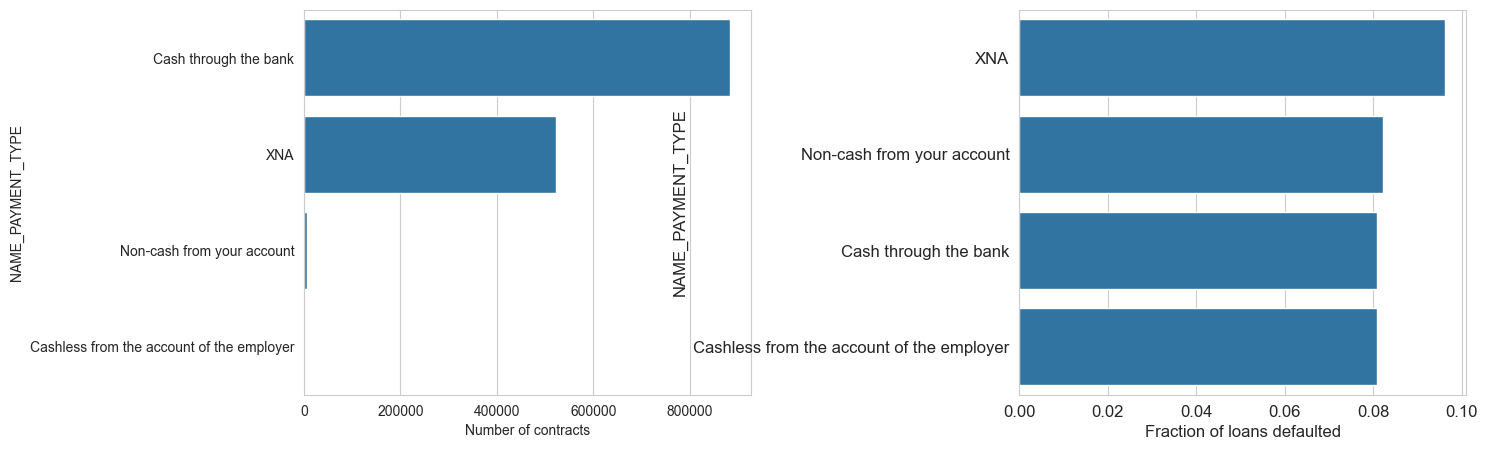

In [65]:
plot_bar_gen('NAME_PAYMENT_TYPE',application_prev_train)

For the feature, NAME_CLIENT_TYPE, we see that most previous loans were for repeated clients and they are more defaulted by those without information or new clients

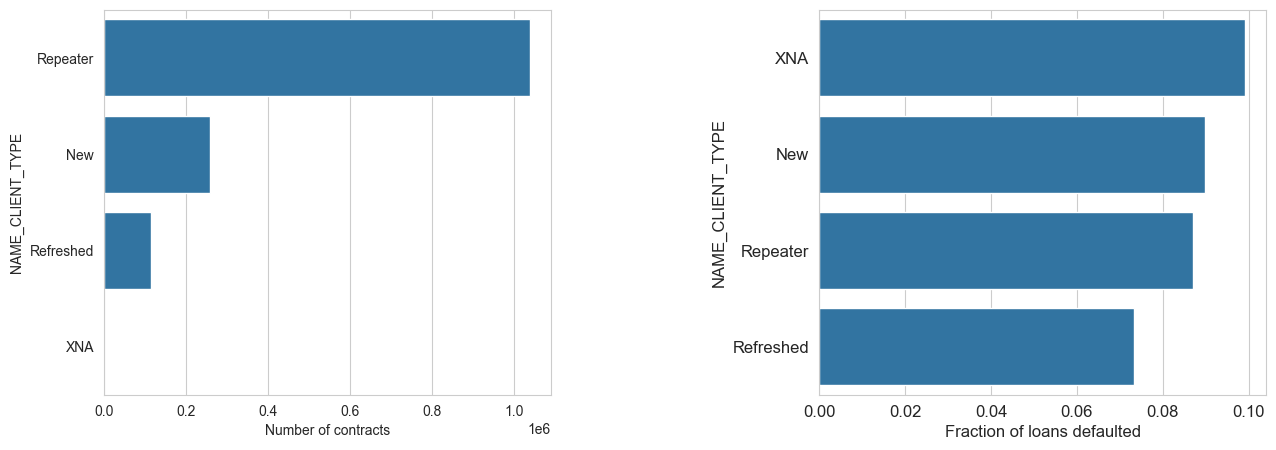

In [66]:
plot_bar_gen('NAME_CLIENT_TYPE',application_prev_train)

---

## <b> MECE Framework Analysis: Insight từ dữ liệu lịch sử (Không Build Model) </b>

Phần này phân tích chi tiết theo framework MECE để tìm insight từ dữ liệu, bao gồm:
1. Demographics & Customer Profile
2. Financial Capacity 
3. Loan Characteristics
4. Credit History
5. Application Behavior
6. Geographic & External Factors
7. Temporal Patterns
8. Interaction Effects

---

### <b> 1. Demographics & Customer Profile Analysis </b>

Phân tích đặc điểm nhân khẩu học và profile khách hàng

#### Q1.1: Phân bố độ tuổi, giới tính, tình trạng hôn nhân ảnh hưởng như thế nào đến tỷ lệ vỡ nợ?

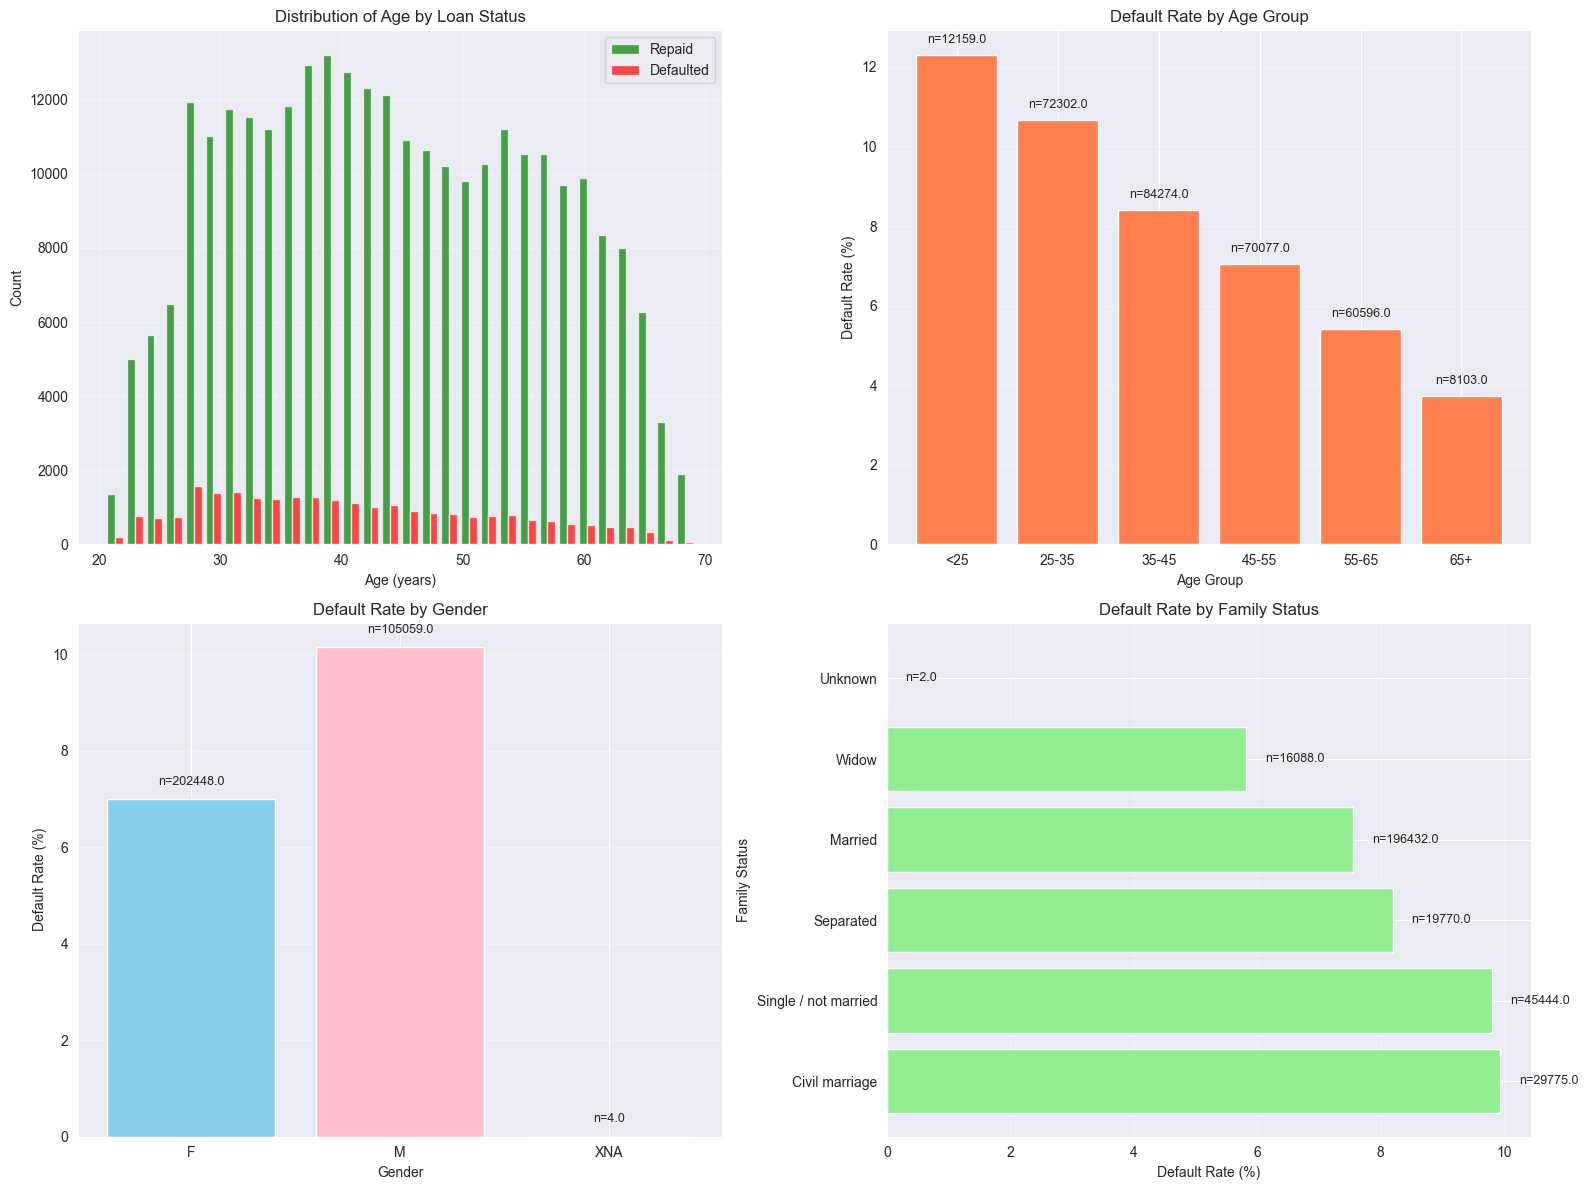

SUMMARY: Độ tuổi, Giới tính, Tình trạng hôn nhân

1. Độ tuổi trung bình: 43.9 tuổi
   - Repaid: 44.2 tuổi
   - Defaulted: 40.8 tuổi

2. Nhóm tuổi có tỷ lệ vỡ nợ cao nhất: <25 (12.30%)
3. Giới tính có tỷ lệ vỡ nợ cao nhất: M (10.14%)
4. Tình trạng hôn nhân có tỷ lệ vỡ nợ cao nhất: Civil marriage (9.94%)


In [13]:
# Phân tích độ tuổi, giới tính, tình trạng hôn nhân và tỷ lệ vỡ nợ

# Tạo biến độ tuổi từ DAYS_BIRTH (âm nên chia -365)
application_train['AGE_YEARS'] = -application_train['DAYS_BIRTH'] / 365

# Tạo age groups
application_train['AGE_GROUP'] = pd.cut(application_train['AGE_YEARS'], 
                                         bins=[0, 25, 35, 45, 55, 65, 100], 
                                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Phân tích theo Age Group
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Phân bố độ tuổi theo Target
axes[0, 0].hist([application_train[application_train['TARGET']==0]['AGE_YEARS'],
                 application_train[application_train['TARGET']==1]['AGE_YEARS']], 
                bins=30, label=['Repaid', 'Defaulted'], color=['green', 'red'], alpha=0.7)
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Age by Loan Status')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Tỷ lệ vỡ nợ theo Age Group
age_default = application_train.groupby('AGE_GROUP')['TARGET'].agg(['mean', 'count'])
axes[0, 1].bar(age_default.index, age_default['mean']*100, color='coral')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].set_title('Default Rate by Age Group')
axes[0, 1].grid(axis='y', alpha=0.3)
# Add count labels
for i, (idx, row) in enumerate(age_default.iterrows()):
    axes[0, 1].text(i, row['mean']*100 + 0.3, f"n={row['count']}", ha='center', fontsize=9)

# 3. Tỷ lệ vỡ nợ theo Giới tính
gender_default = application_train.groupby('CODE_GENDER')['TARGET'].agg(['mean', 'count'])
axes[1, 0].bar(gender_default.index, gender_default['mean']*100, color=['skyblue', 'pink', 'gray'])
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].set_title('Default Rate by Gender')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(gender_default.iterrows()):
    axes[1, 0].text(i, row['mean']*100 + 0.3, f"n={row['count']}", ha='center', fontsize=9)

# 4. Tỷ lệ vỡ nợ theo Tình trạng hôn nhân
family_default = application_train.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(['mean', 'count']).sort_values('mean', ascending=False)
axes[1, 1].barh(family_default.index, family_default['mean']*100, color='lightgreen')
axes[1, 1].set_xlabel('Default Rate (%)')
axes[1, 1].set_ylabel('Family Status')
axes[1, 1].set_title('Default Rate by Family Status')
axes[1, 1].grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(family_default.iterrows()):
    axes[1, 1].text(row['mean']*100 + 0.3, i, f"n={row['count']}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary Statistics
print("="*80)
print("SUMMARY: Độ tuổi, Giới tính, Tình trạng hôn nhân")
print("="*80)
print(f"\n1. Độ tuổi trung bình: {application_train['AGE_YEARS'].mean():.1f} tuổi")
print(f"   - Repaid: {application_train[application_train['TARGET']==0]['AGE_YEARS'].mean():.1f} tuổi")
print(f"   - Defaulted: {application_train[application_train['TARGET']==1]['AGE_YEARS'].mean():.1f} tuổi")
print(f"\n2. Nhóm tuổi có tỷ lệ vỡ nợ cao nhất: {age_default['mean'].idxmax()} ({age_default['mean'].max()*100:.2f}%)")
print(f"3. Giới tính có tỷ lệ vỡ nợ cao nhất: {gender_default['mean'].idxmax()} ({gender_default['mean'].max()*100:.2f}%)")
print(f"4. Tình trạng hôn nhân có tỷ lệ vỡ nợ cao nhất: {family_default['mean'].idxmax()} ({family_default['mean'].max()*100:.2f}%)")

#### Q1.2: Trình độ học vấn và loại hình công việc có tương quan với khả năng trả nợ không?

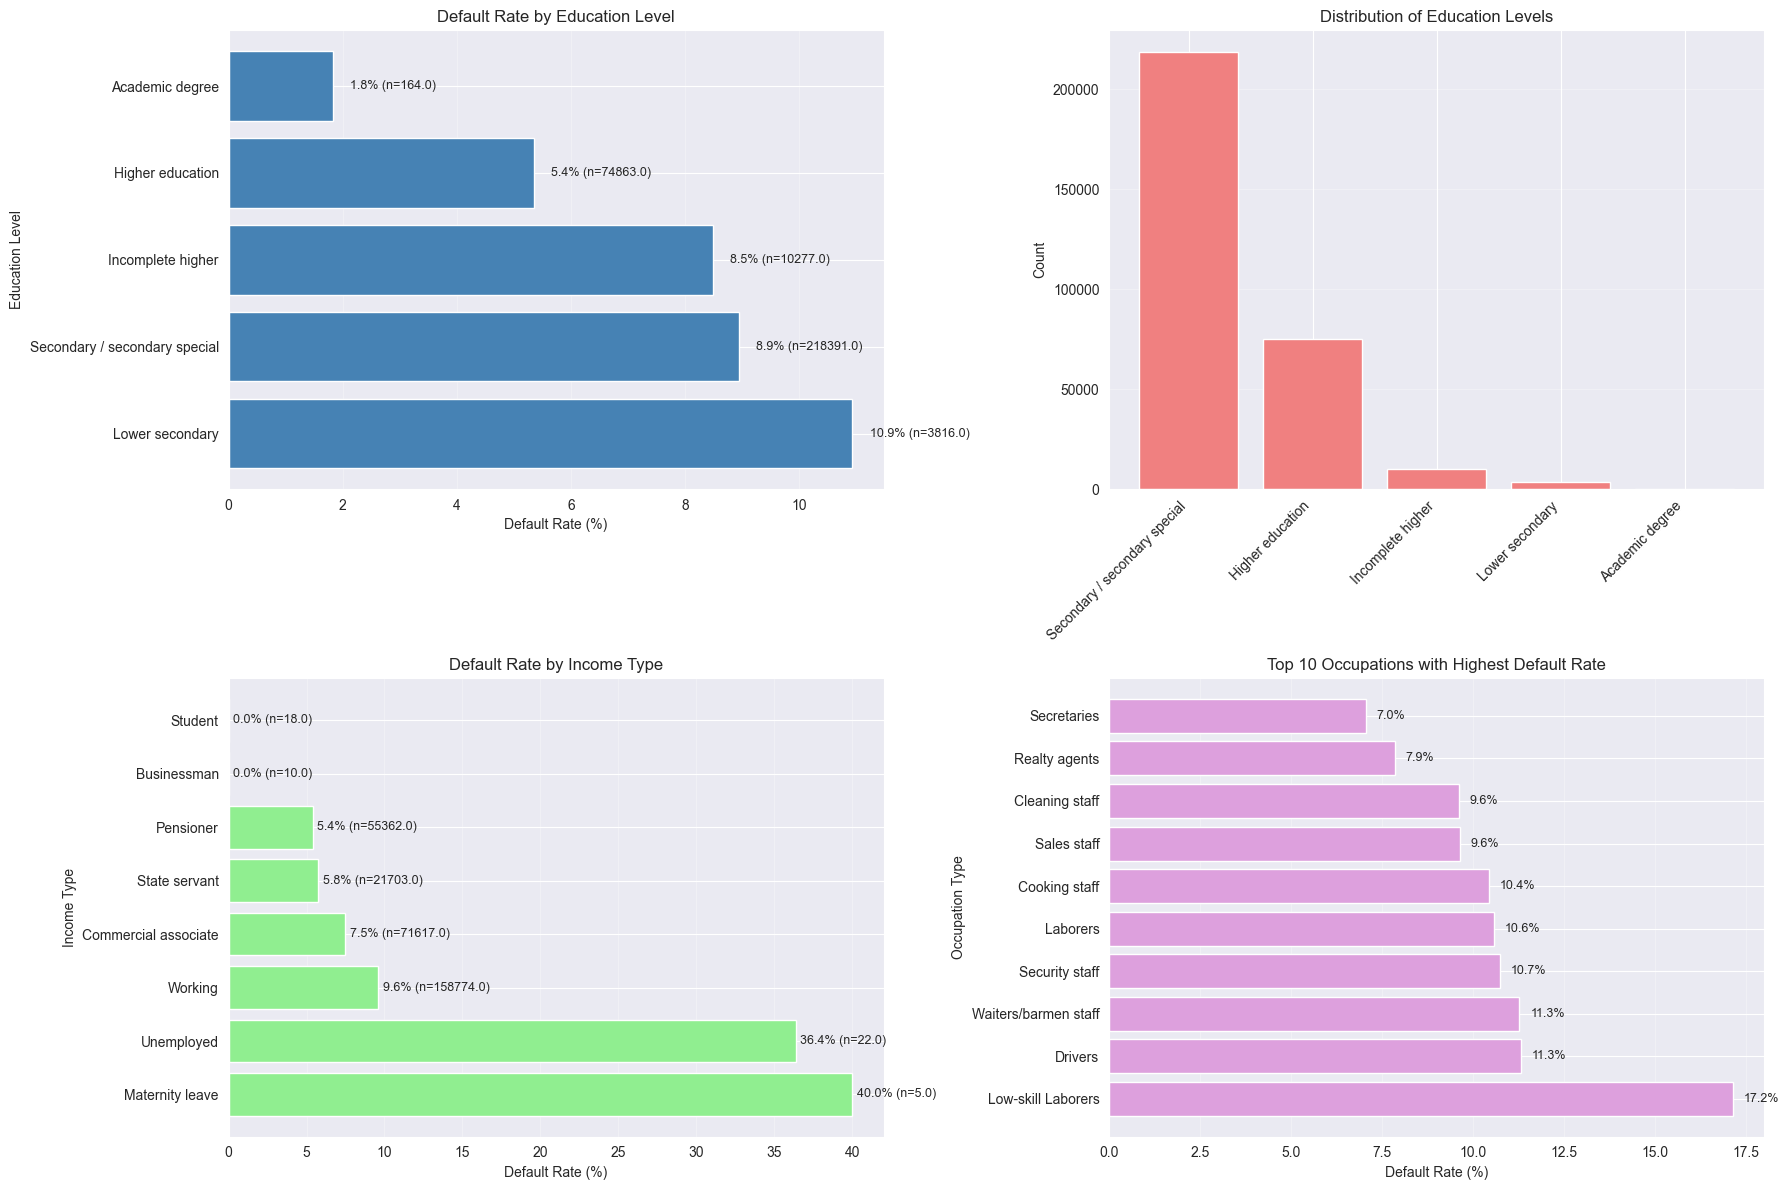

CROSS-TABULATION: Education Level vs Income Type - Default Rate (%)
NAME_INCOME_TYPE               Businessman  Commercial associate  \
NAME_EDUCATION_TYPE                                                
Academic degree                        NaN                  2.33   
Higher education                       0.0                  5.17   
Incomplete higher                      NaN                  8.21   
Lower secondary                        NaN                 12.17   
Secondary / secondary special          NaN                  8.65   

NAME_INCOME_TYPE               Maternity leave  Pensioner  State servant  \
NAME_EDUCATION_TYPE                                                        
Academic degree                            NaN       0.00           0.00   
Higher education                           0.0       4.15           3.88   
Incomplete higher                          NaN       4.44           6.75   
Lower secondary                            NaN       6.67           7.84   

In [14]:
# Phân tích Trình độ học vấn và Loại hình công việc

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Tỷ lệ vỡ nợ theo Trình độ học vấn
edu_default = application_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(['mean', 'count']).sort_values('mean', ascending=False)
axes[0, 0].barh(edu_default.index, edu_default['mean']*100, color='steelblue')
axes[0, 0].set_xlabel('Default Rate (%)')
axes[0, 0].set_ylabel('Education Level')
axes[0, 0].set_title('Default Rate by Education Level')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(edu_default.iterrows()):
    axes[0, 0].text(row['mean']*100 + 0.3, i, f"{row['mean']*100:.1f}% (n={row['count']})", va='center', fontsize=9)

# 2. Phân bố số lượng theo Education
edu_count = application_train['NAME_EDUCATION_TYPE'].value_counts()
axes[0, 1].bar(range(len(edu_count)), edu_count.values, color='lightcoral')
axes[0, 1].set_xticks(range(len(edu_count)))
axes[0, 1].set_xticklabels(edu_count.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Education Levels')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Tỷ lệ vỡ nợ theo Loại hình thu nhập (Income Type)
income_default = application_train.groupby('NAME_INCOME_TYPE')['TARGET'].agg(['mean', 'count']).sort_values('mean', ascending=False)
axes[1, 0].barh(income_default.index, income_default['mean']*100, color='lightgreen')
axes[1, 0].set_xlabel('Default Rate (%)')
axes[1, 0].set_ylabel('Income Type')
axes[1, 0].set_title('Default Rate by Income Type')
axes[1, 0].grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(income_default.iterrows()):
    axes[1, 0].text(row['mean']*100 + 0.3, i, f"{row['mean']*100:.1f}% (n={row['count']})", va='center', fontsize=9)

# 4. Tỷ lệ vỡ nợ theo Loại hình công việc (Top 10)
occupation_default = application_train[application_train['OCCUPATION_TYPE'].notna()].groupby('OCCUPATION_TYPE')['TARGET'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
axes[1, 1].barh(occupation_default.index, occupation_default['mean']*100, color='plum')
axes[1, 1].set_xlabel('Default Rate (%)')
axes[1, 1].set_ylabel('Occupation Type')
axes[1, 1].set_title('Top 10 Occupations with Highest Default Rate')
axes[1, 1].grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(occupation_default.iterrows()):
    axes[1, 1].text(row['mean']*100 + 0.3, i, f"{row['mean']*100:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Cross-tabulation: Education vs Income Type
print("="*80)
print("CROSS-TABULATION: Education Level vs Income Type - Default Rate (%)")
print("="*80)
cross_edu_income = pd.crosstab(application_train['NAME_EDUCATION_TYPE'], 
                                 application_train['NAME_INCOME_TYPE'], 
                                 application_train['TARGET'], 
                                 aggfunc='mean') * 100
print(cross_edu_income.round(2))

print("\n" + "="*80)
print("SUMMARY: Trình độ học vấn & Loại hình công việc")
print("="*80)
print(f"\n1. Trình độ học vấn có tỷ lệ vỡ nợ CAO NHẤT: {edu_default['mean'].idxmax()} ({edu_default['mean'].max()*100:.2f}%)")
print(f"2. Trình độ học vấn có tỷ lệ vỡ nợ THẤP NHẤT: {edu_default['mean'].idxmin()} ({edu_default['mean'].min()*100:.2f}%)")
print(f"\n3. Loại hình thu nhập có tỷ lệ vỡ nợ CAO NHẤT: {income_default['mean'].idxmax()} ({income_default['mean'].max()*100:.2f}%)")
print(f"4. Loại hình thu nhập có tỷ lệ vỡ nợ THẤP NHẤT: {income_default['mean'].idxmin()} ({income_default['mean'].min()*100:.2f}%)")
print(f"\n5. Nghề nghiệp có tỷ lệ vỡ nợ cao nhất: {occupation_default['mean'].idxmax()} ({occupation_default['mean'].max()*100:.2f}%)")

### <b> 2. Financial Capacity Analysis </b>

Phân tích năng lực tài chính của khách hàng

#### Q2.1: Mối quan hệ giữa thu nhập và số tiền vay? Tỷ lệ DTI (Debt-to-Income) tối ưu?

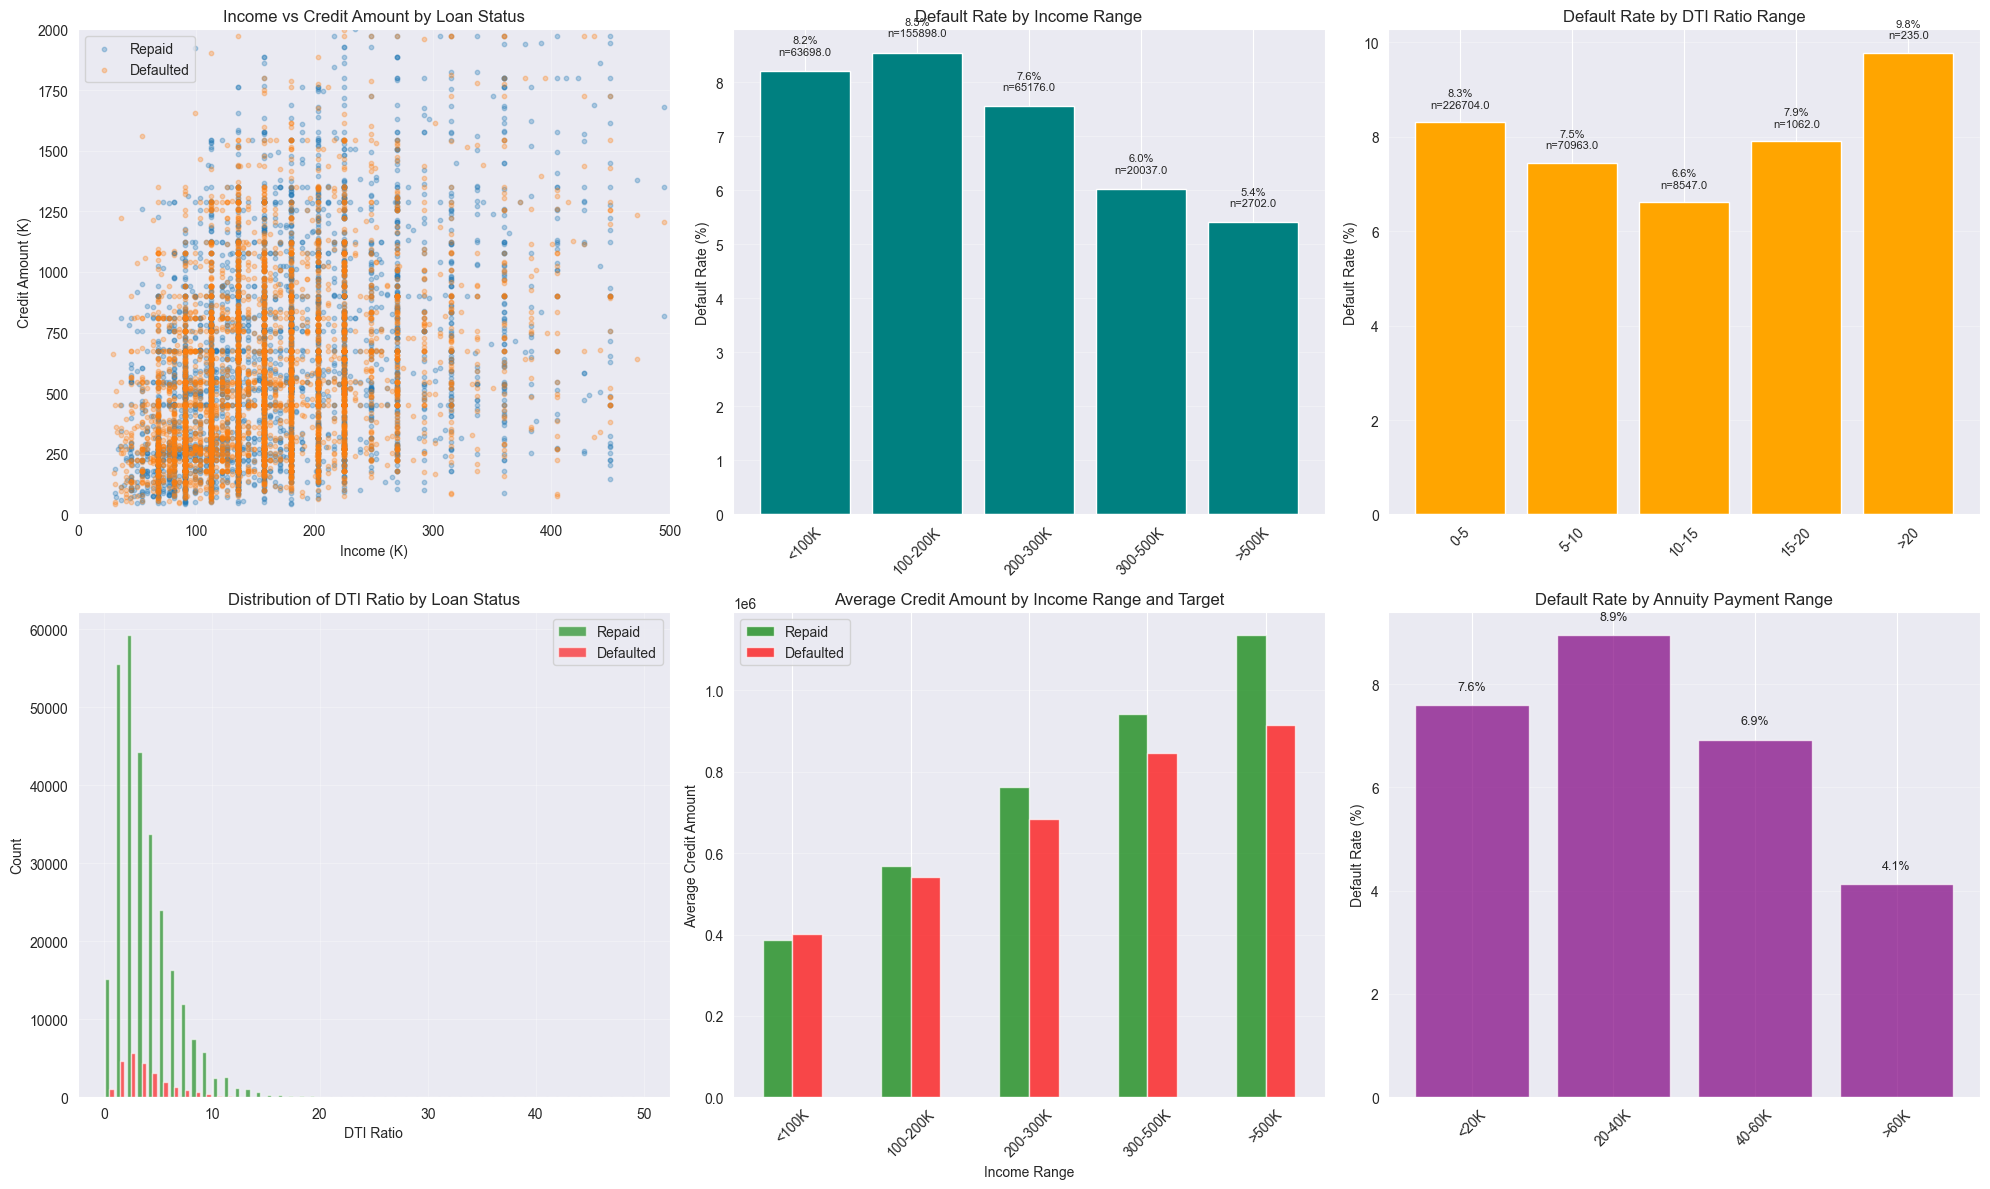

SUMMARY: Thu nhập, Số tiền vay và DTI Ratio

1. Thu nhập trung bình:
   - Repaid: 169,078
   - Defaulted: 165,612

2. Số tiền vay trung bình:
   - Repaid: 602,648
   - Defaulted: 557,779

3. DTI Ratio trung bình:
   - Repaid: 3.96
   - Defaulted: 3.89

4. Khoảng DTI có tỷ lệ vỡ nợ THẤP NHẤT: 10-15 (6.62%)
5. Khoảng DTI có tỷ lệ vỡ nợ CAO NHẤT: >20 (9.79%)


In [15]:
# Phân tích Thu nhập, Số tiền vay và DTI Ratio

# Tính toán DTI (Debt-to-Income) ratio
application_train['DTI_RATIO'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TO_ANNUITY_RATIO'] = application_train['AMT_CREDIT'] / application_train['AMT_ANNUITY']

# Tạo income bins
application_train['INCOME_RANGE'] = pd.cut(application_train['AMT_INCOME_TOTAL'], 
                                            bins=[0, 100000, 200000, 300000, 500000, 1e9],
                                            labels=['<100K', '100-200K', '200-300K', '300-500K', '>500K'])

# Tạo DTI bins
application_train['DTI_RANGE'] = pd.cut(application_train['DTI_RATIO'], 
                                         bins=[0, 5, 10, 15, 20, 1000],
                                         labels=['0-5', '5-10', '10-15', '15-20', '>20'])

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Scatter plot: Income vs Credit Amount by Target
for target in [0, 1]:
    data = application_train[application_train['TARGET']==target].sample(5000)
    axes[0, 0].scatter(data['AMT_INCOME_TOTAL']/1000, data['AMT_CREDIT']/1000, 
                      alpha=0.3, s=10, label=['Repaid', 'Defaulted'][target])
axes[0, 0].set_xlabel('Income (K)')
axes[0, 0].set_ylabel('Credit Amount (K)')
axes[0, 0].set_title('Income vs Credit Amount by Loan Status')
axes[0, 0].set_xlim(0, 500)
axes[0, 0].set_ylim(0, 2000)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Default Rate by Income Range
income_default = application_train.groupby('INCOME_RANGE')['TARGET'].agg(['mean', 'count'])
axes[0, 1].bar(range(len(income_default)), income_default['mean']*100, color='teal')
axes[0, 1].set_xticks(range(len(income_default)))
axes[0, 1].set_xticklabels(income_default.index, rotation=45)
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].set_title('Default Rate by Income Range')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(income_default.iterrows()):
    axes[0, 1].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%\nn={row['count']}", ha='center', fontsize=8)

# 3. Default Rate by DTI Range
dti_default = application_train.groupby('DTI_RANGE')['TARGET'].agg(['mean', 'count'])
axes[0, 2].bar(range(len(dti_default)), dti_default['mean']*100, color='orange')
axes[0, 2].set_xticks(range(len(dti_default)))
axes[0, 2].set_xticklabels(dti_default.index, rotation=45)
axes[0, 2].set_ylabel('Default Rate (%)')
axes[0, 2].set_title('Default Rate by DTI Ratio Range')
axes[0, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(dti_default.iterrows()):
    axes[0, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%\nn={row['count']}", ha='center', fontsize=8)

# 4. Distribution of DTI by Target
axes[1, 0].hist([application_train[application_train['TARGET']==0]['DTI_RATIO'].clip(0, 50),
                 application_train[application_train['TARGET']==1]['DTI_RATIO'].clip(0, 50)],
                bins=50, label=['Repaid', 'Defaulted'], color=['green', 'red'], alpha=0.6)
axes[1, 0].set_xlabel('DTI Ratio')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of DTI Ratio by Loan Status')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 5. Average Credit Amount by Income Range and Target
credit_by_income = application_train.groupby(['INCOME_RANGE', 'TARGET'])['AMT_CREDIT'].mean().unstack()
credit_by_income.plot(kind='bar', ax=axes[1, 1], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_xlabel('Income Range')
axes[1, 1].set_ylabel('Average Credit Amount')
axes[1, 1].set_title('Average Credit Amount by Income Range and Target')
axes[1, 1].legend(['Repaid', 'Defaulted'])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Annuity vs Default Rate
application_train['ANNUITY_RANGE'] = pd.cut(application_train['AMT_ANNUITY'], 
                                             bins=[0, 20000, 40000, 60000, 1e9],
                                             labels=['<20K', '20-40K', '40-60K', '>60K'])
annuity_default = application_train.groupby('ANNUITY_RANGE')['TARGET'].agg(['mean', 'count'])
axes[1, 2].bar(range(len(annuity_default)), annuity_default['mean']*100, color='purple', alpha=0.7)
axes[1, 2].set_xticks(range(len(annuity_default)))
axes[1, 2].set_xticklabels(annuity_default.index, rotation=45)
axes[1, 2].set_ylabel('Default Rate (%)')
axes[1, 2].set_title('Default Rate by Annuity Payment Range')
axes[1, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(annuity_default.iterrows()):
    axes[1, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary Statistics
print("="*80)
print("SUMMARY: Thu nhập, Số tiền vay và DTI Ratio")
print("="*80)
print(f"\n1. Thu nhập trung bình:")
print(f"   - Repaid: {application_train[application_train['TARGET']==0]['AMT_INCOME_TOTAL'].mean():,.0f}")
print(f"   - Defaulted: {application_train[application_train['TARGET']==1]['AMT_INCOME_TOTAL'].mean():,.0f}")
print(f"\n2. Số tiền vay trung bình:")
print(f"   - Repaid: {application_train[application_train['TARGET']==0]['AMT_CREDIT'].mean():,.0f}")
print(f"   - Defaulted: {application_train[application_train['TARGET']==1]['AMT_CREDIT'].mean():,.0f}")
print(f"\n3. DTI Ratio trung bình:")
print(f"   - Repaid: {application_train[application_train['TARGET']==0]['DTI_RATIO'].mean():.2f}")
print(f"   - Defaulted: {application_train[application_train['TARGET']==1]['DTI_RATIO'].mean():.2f}")
print(f"\n4. Khoảng DTI có tỷ lệ vỡ nợ THẤP NHẤT: {dti_default['mean'].idxmin()} ({dti_default['mean'].min()*100:.2f}%)")
print(f"5. Khoảng DTI có tỷ lệ vỡ nợ CAO NHẤT: {dti_default['mean'].idxmax()} ({dti_default['mean'].max()*100:.2f}%)")

### <b> 3. Loan Characteristics Analysis </b>

Phân tích đặc điểm khoản vay

#### Q3.1: Loại hình vay (cash loan vs revolving loan) và đặc điểm khoản vay ảnh hưởng như thế nào?

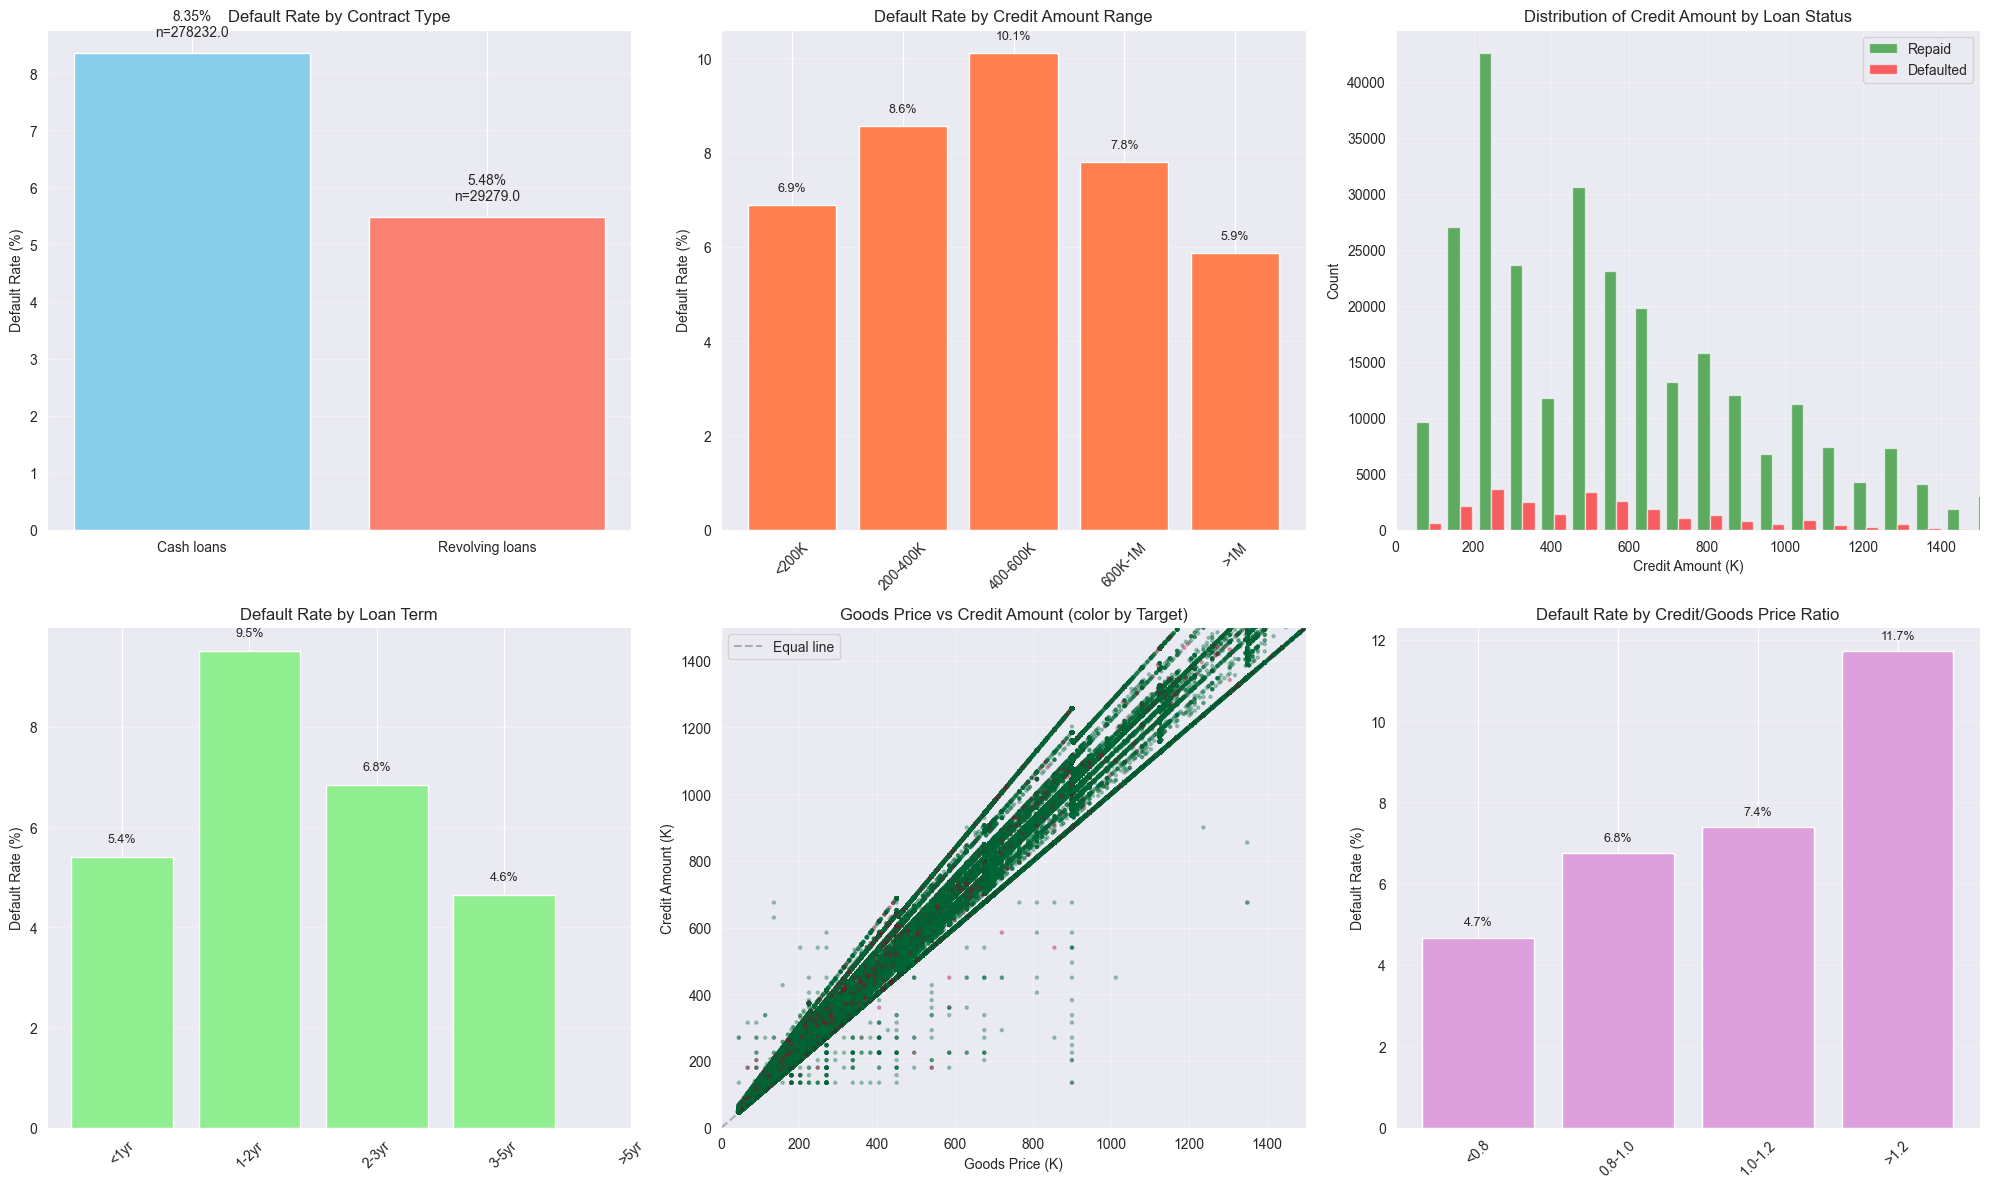

SUMMARY: Đặc điểm Khoản vay

1. Loại hình vay:
   - Cash loans: 278232 loans (8.35% default)
   - Revolving loans: 29279 loans (5.48% default)

2. Khoảng số tiền vay có tỷ lệ vỡ nợ CAO NHẤT: 400-600K (10.10%)
3. Khoảng số tiền vay có tỷ lệ vỡ nợ THẤP NHẤT: >1M (5.87%)

4. Thời hạn vay có tỷ lệ vỡ nợ CAO NHẤT: 1-2yr (9.51%)
5. Thời hạn vay có tỷ lệ vỡ nợ THẤP NHẤT: 3-5yr (4.64%)


In [16]:
# Phân tích Đặc điểm Khoản vay

# Tạo Credit Range bins
application_train['CREDIT_RANGE'] = pd.cut(application_train['AMT_CREDIT'], 
                                            bins=[0, 200000, 400000, 600000, 1000000, 1e9],
                                            labels=['<200K', '200-400K', '400-600K', '600K-1M', '>1M'])

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Default Rate by Contract Type
contract_default = application_train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(['mean', 'count'])
axes[0, 0].bar(contract_default.index, contract_default['mean']*100, color=['skyblue', 'salmon'])
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].set_title('Default Rate by Contract Type')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(contract_default.iterrows()):
    axes[0, 0].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.2f}%\nn={row['count']}", ha='center', fontsize=10)

# 2. Default Rate by Credit Range
credit_default = application_train.groupby('CREDIT_RANGE')['TARGET'].agg(['mean', 'count'])
axes[0, 1].bar(range(len(credit_default)), credit_default['mean']*100, color='coral')
axes[0, 1].set_xticks(range(len(credit_default)))
axes[0, 1].set_xticklabels(credit_default.index, rotation=45)
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].set_title('Default Rate by Credit Amount Range')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(credit_default.iterrows()):
    axes[0, 1].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 3. Credit Amount Distribution by Target
axes[0, 2].hist([application_train[application_train['TARGET']==0]['AMT_CREDIT']/1000,
                 application_train[application_train['TARGET']==1]['AMT_CREDIT']/1000],
                bins=50, label=['Repaid', 'Defaulted'], color=['green', 'red'], alpha=0.6)
axes[0, 2].set_xlabel('Credit Amount (K)')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Distribution of Credit Amount by Loan Status')
axes[0, 2].set_xlim(0, 1500)
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 4. Credit Term vs Default
# Calculate loan term in years from credit and annuity
application_train['LOAN_TERM_YEARS'] = application_train['AMT_CREDIT'] / application_train['AMT_ANNUITY'] / 12
application_train['TERM_RANGE'] = pd.cut(application_train['LOAN_TERM_YEARS'].clip(0, 20), 
                                          bins=[0, 1, 2, 3, 5, 20],
                                          labels=['<1yr', '1-2yr', '2-3yr', '3-5yr', '>5yr'])
term_default = application_train.groupby('TERM_RANGE')['TARGET'].agg(['mean', 'count'])
axes[1, 0].bar(range(len(term_default)), term_default['mean']*100, color='lightgreen')
axes[1, 0].set_xticks(range(len(term_default)))
axes[1, 0].set_xticklabels(term_default.index, rotation=45)
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].set_title('Default Rate by Loan Term')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(term_default.iterrows()):
    axes[1, 0].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 5. Goods Price vs Credit Amount
axes[1, 1].scatter(application_train['AMT_GOODS_PRICE']/1000, 
                   application_train['AMT_CREDIT']/1000,
                   c=application_train['TARGET'], cmap='RdYlGn_r', alpha=0.3, s=5)
axes[1, 1].set_xlabel('Goods Price (K)')
axes[1, 1].set_ylabel('Credit Amount (K)')
axes[1, 1].set_title('Goods Price vs Credit Amount (color by Target)')
axes[1, 1].set_xlim(0, 1500)
axes[1, 1].set_ylim(0, 1500)
axes[1, 1].plot([0, 1500], [0, 1500], 'k--', alpha=0.3, label='Equal line')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 6. Credit-to-Goods Price Ratio
application_train['CREDIT_GOODS_RATIO'] = application_train['AMT_CREDIT'] / application_train['AMT_GOODS_PRICE']
application_train['CREDIT_GOODS_RATIO_RANGE'] = pd.cut(application_train['CREDIT_GOODS_RATIO'].clip(0, 2), 
                                                         bins=[0, 0.8, 1.0, 1.2, 2],
                                                         labels=['<0.8', '0.8-1.0', '1.0-1.2', '>1.2'])
ratio_default = application_train.groupby('CREDIT_GOODS_RATIO_RANGE')['TARGET'].agg(['mean', 'count'])
axes[1, 2].bar(range(len(ratio_default)), ratio_default['mean']*100, color='plum')
axes[1, 2].set_xticks(range(len(ratio_default)))
axes[1, 2].set_xticklabels(ratio_default.index, rotation=45)
axes[1, 2].set_ylabel('Default Rate (%)')
axes[1, 2].set_title('Default Rate by Credit/Goods Price Ratio')
axes[1, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(ratio_default.iterrows()):
    axes[1, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary Statistics
print("="*80)
print("SUMMARY: Đặc điểm Khoản vay")
print("="*80)
print(f"\n1. Loại hình vay:")
print(f"   - Cash loans: {contract_default.loc['Cash loans', 'count']} loans ({contract_default.loc['Cash loans', 'mean']*100:.2f}% default)")
print(f"   - Revolving loans: {contract_default.loc['Revolving loans', 'count']} loans ({contract_default.loc['Revolving loans', 'mean']*100:.2f}% default)")
print(f"\n2. Khoảng số tiền vay có tỷ lệ vỡ nợ CAO NHẤT: {credit_default['mean'].idxmax()} ({credit_default['mean'].max()*100:.2f}%)")
print(f"3. Khoảng số tiền vay có tỷ lệ vỡ nợ THẤP NHẤT: {credit_default['mean'].idxmin()} ({credit_default['mean'].min()*100:.2f}%)")
print(f"\n4. Thời hạn vay có tỷ lệ vỡ nợ CAO NHẤT: {term_default['mean'].idxmax()} ({term_default['mean'].max()*100:.2f}%)")
print(f"5. Thời hạn vay có tỷ lệ vỡ nợ THẤP NHẤT: {term_default['mean'].idxmin()} ({term_default['mean'].min()*100:.2f}%)")

### <b> 4. Credit History Analysis </b>

Phân tích lịch sử tín dụng từ Bureau data

#### Q4.1: Lịch sử tín dụng (số khoản vay trước, tình trạng thanh toán) ảnh hưởng đến default rate?

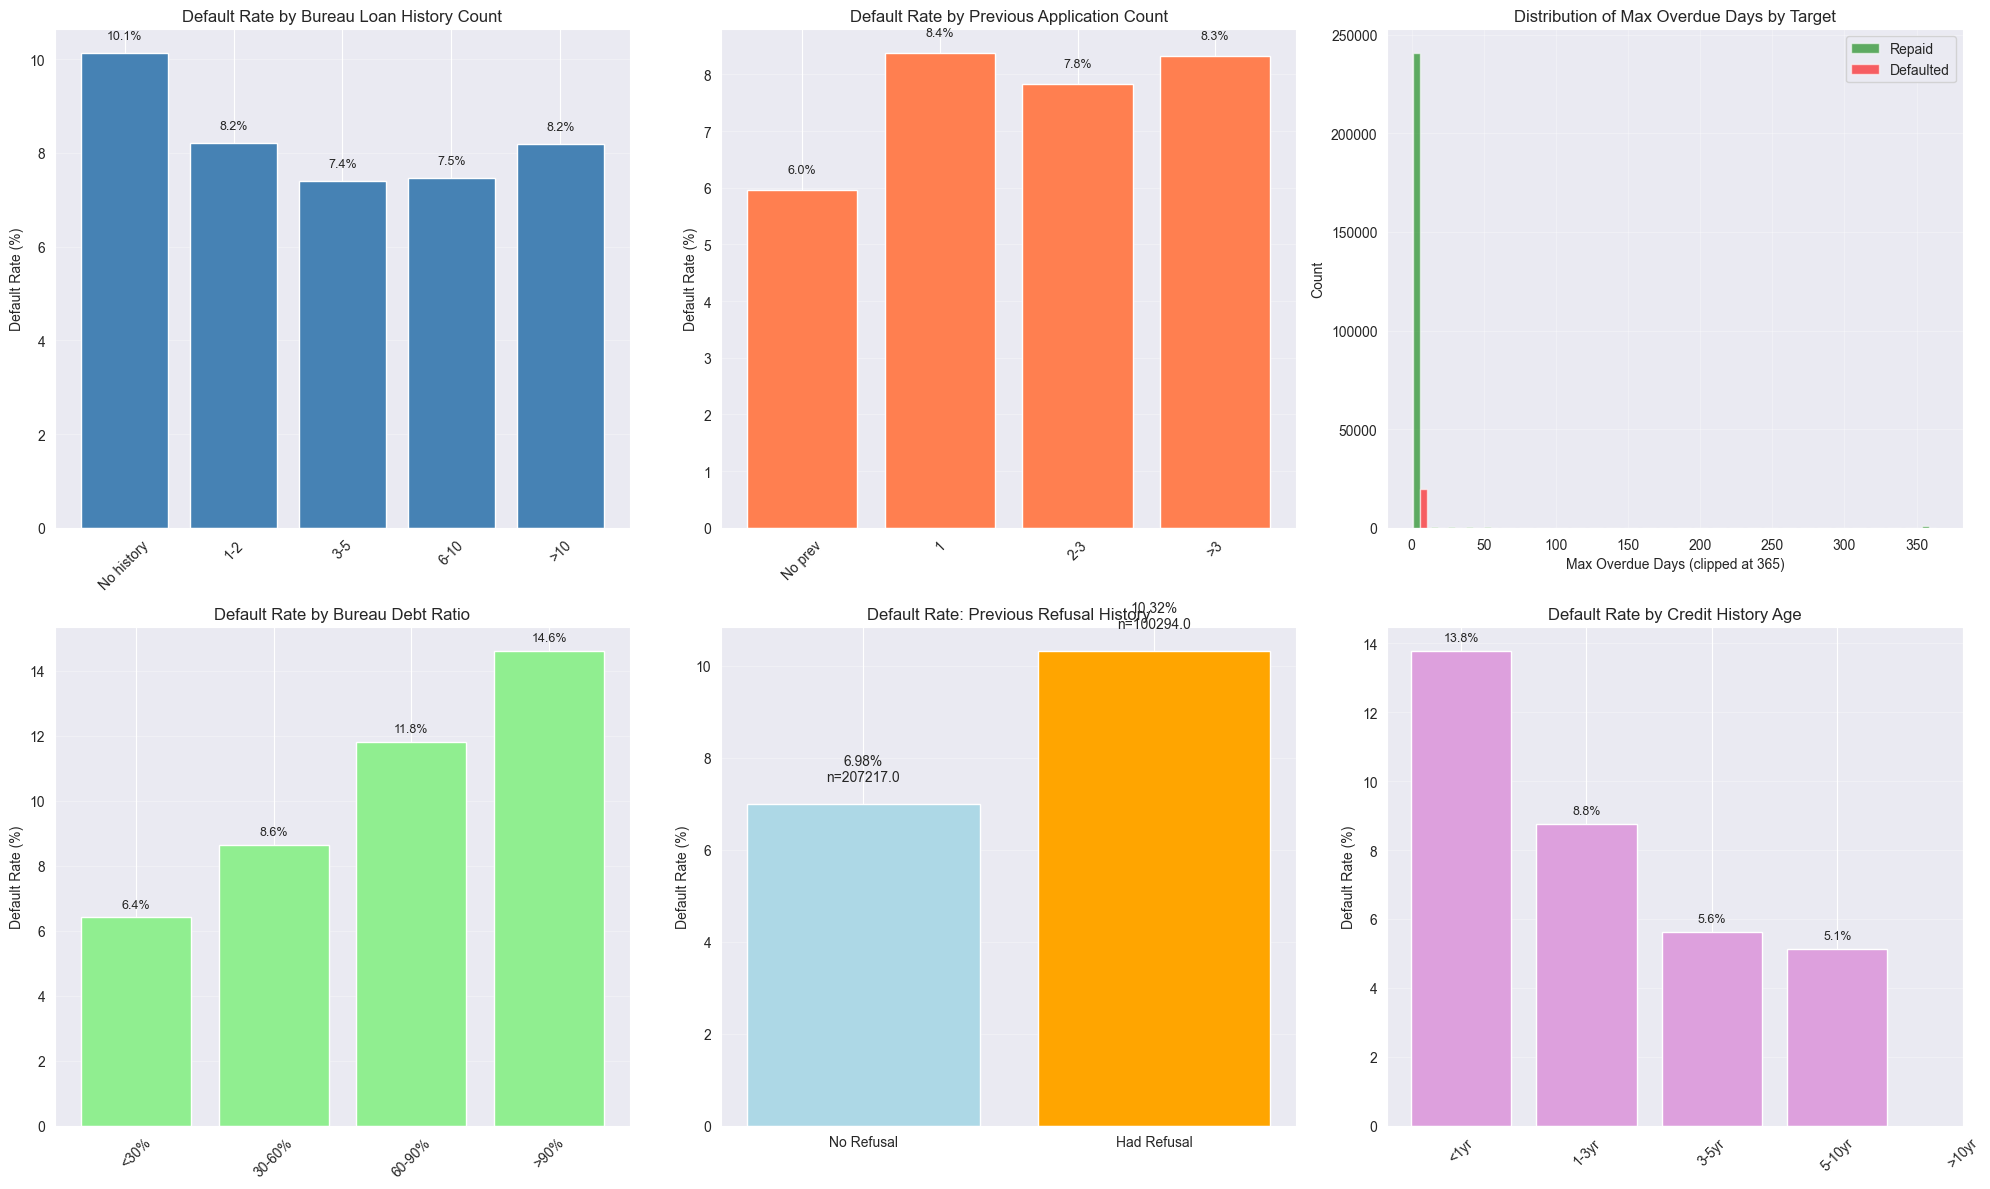

SUMMARY: Lịch sử Tín dụng

1. Khách hàng có lịch sử Bureau:
   - Có lịch sử: 263491 (85.7%)
   - Không có: 44020 (14.3%)

2. Default rate:
   - Có lịch sử Bureau: 7.73%
   - Không có lịch sử: 10.12%

3. Nhóm có tỷ lệ vỡ nợ CAO NHẤT (Bureau): No history (10.12%)
4. Khách hàng từng bị từ chối vay trước: 100294 (32.6%)


In [17]:
# Phân tích Lịch sử Tín dụng từ Bureau và Previous Application

# Aggregate bureau data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'SK_ID_BUREAU': 'count',  # Number of previous credits
    'DAYS_CREDIT': 'mean',     # Average days since credit started
    'CREDIT_DAY_OVERDUE': 'max',  # Max days overdue
    'AMT_CREDIT_SUM': 'sum',   # Total credit amount
    'AMT_CREDIT_SUM_DEBT': 'sum'  # Total current debt
}).reset_index()

bureau_agg.columns = ['SK_ID_CURR', 'BUREAU_LOAN_COUNT', 'BUREAU_AVG_DAYS_CREDIT', 
                      'BUREAU_MAX_OVERDUE', 'BUREAU_TOTAL_CREDIT', 'BUREAU_TOTAL_DEBT']

# Merge with application_train
app_bureau = application_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
app_bureau['BUREAU_LOAN_COUNT'] = app_bureau['BUREAU_LOAN_COUNT'].fillna(0)
app_bureau['BUREAU_DEBT_RATIO'] = app_bureau['BUREAU_TOTAL_DEBT'] / (app_bureau['BUREAU_TOTAL_CREDIT'] + 1)

# Previous application aggregation
prev_agg = previous_application.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Refused').sum(),
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean',
    'DAYS_DECISION': 'mean'
}).reset_index()

prev_agg.columns = ['SK_ID_CURR', 'PREV_LOAN_COUNT', 'PREV_REFUSED_COUNT', 
                    'PREV_AVG_APP_AMT', 'PREV_AVG_CREDIT', 'PREV_AVG_DAYS_DECISION']

app_bureau = app_bureau.merge(prev_agg, on='SK_ID_CURR', how='left')
app_bureau['PREV_LOAN_COUNT'] = app_bureau['PREV_LOAN_COUNT'].fillna(0)
app_bureau['PREV_REFUSED_COUNT'] = app_bureau['PREV_REFUSED_COUNT'].fillna(0)

# Create bins
app_bureau['BUREAU_LOAN_RANGE'] = pd.cut(app_bureau['BUREAU_LOAN_COUNT'], 
                                          bins=[-1, 0, 2, 5, 10, 100],
                                          labels=['No history', '1-2', '3-5', '6-10', '>10'])

app_bureau['PREV_LOAN_RANGE'] = pd.cut(app_bureau['PREV_LOAN_COUNT'], 
                                        bins=[-1, 0, 1, 3, 100],
                                        labels=['No prev', '1', '2-3', '>3'])

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Default Rate by Bureau Loan Count
bureau_default = app_bureau.groupby('BUREAU_LOAN_RANGE')['TARGET'].agg(['mean', 'count'])
axes[0, 0].bar(range(len(bureau_default)), bureau_default['mean']*100, color='steelblue')
axes[0, 0].set_xticks(range(len(bureau_default)))
axes[0, 0].set_xticklabels(bureau_default.index, rotation=45)
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].set_title('Default Rate by Bureau Loan History Count')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(bureau_default.iterrows()):
    axes[0, 0].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 2. Default Rate by Previous Loan Count
prev_default = app_bureau.groupby('PREV_LOAN_RANGE')['TARGET'].agg(['mean', 'count'])
axes[0, 1].bar(range(len(prev_default)), prev_default['mean']*100, color='coral')
axes[0, 1].set_xticks(range(len(prev_default)))
axes[0, 1].set_xticklabels(prev_default.index, rotation=45)
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].set_title('Default Rate by Previous Application Count')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(prev_default.iterrows()):
    axes[0, 1].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 3. Max Overdue Days Distribution
app_bureau_overdue = app_bureau[app_bureau['BUREAU_MAX_OVERDUE'].notna()]
axes[0, 2].hist([app_bureau_overdue[app_bureau_overdue['TARGET']==0]['BUREAU_MAX_OVERDUE'].clip(0, 365),
                 app_bureau_overdue[app_bureau_overdue['TARGET']==1]['BUREAU_MAX_OVERDUE'].clip(0, 365)],
                bins=30, label=['Repaid', 'Defaulted'], color=['green', 'red'], alpha=0.6)
axes[0, 2].set_xlabel('Max Overdue Days (clipped at 365)')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Distribution of Max Overdue Days by Target')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 4. Bureau Debt Ratio vs Default
app_bureau['BUREAU_DEBT_RATIO_RANGE'] = pd.cut(app_bureau['BUREAU_DEBT_RATIO'].clip(0, 2), 
                                                 bins=[0, 0.3, 0.6, 0.9, 2],
                                                 labels=['<30%', '30-60%', '60-90%', '>90%'])
debt_default = app_bureau.groupby('BUREAU_DEBT_RATIO_RANGE')['TARGET'].agg(['mean', 'count'])
axes[1, 0].bar(range(len(debt_default)), debt_default['mean']*100, color='lightgreen')
axes[1, 0].set_xticks(range(len(debt_default)))
axes[1, 0].set_xticklabels(debt_default.index, rotation=45)
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].set_title('Default Rate by Bureau Debt Ratio')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(debt_default.iterrows()):
    axes[1, 0].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 5. Previous Refused Applications
app_bureau['PREV_REFUSED_ANY'] = (app_bureau['PREV_REFUSED_COUNT'] > 0).astype(int)
refused_default = app_bureau.groupby('PREV_REFUSED_ANY')['TARGET'].agg(['mean', 'count'])
axes[1, 1].bar(['No Refusal', 'Had Refusal'], refused_default['mean']*100, color=['lightblue', 'orange'])
axes[1, 1].set_ylabel('Default Rate (%)')
axes[1, 1].set_title('Default Rate: Previous Refusal History')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(refused_default.iterrows()):
    axes[1, 1].text(i, row['mean']*100 + 0.5, f"{row['mean']*100:.2f}%\nn={row['count']}", ha='center', fontsize=10)

# 6. Credit History Age
app_bureau_age = app_bureau[app_bureau['BUREAU_AVG_DAYS_CREDIT'].notna()]
app_bureau_age['CREDIT_HISTORY_YEARS'] = -app_bureau_age['BUREAU_AVG_DAYS_CREDIT'] / 365
app_bureau_age['CREDIT_AGE_RANGE'] = pd.cut(app_bureau_age['CREDIT_HISTORY_YEARS'], 
                                              bins=[0, 1, 3, 5, 10, 100],
                                              labels=['<1yr', '1-3yr', '3-5yr', '5-10yr', '>10yr'])
age_default = app_bureau_age.groupby('CREDIT_AGE_RANGE')['TARGET'].agg(['mean', 'count'])
axes[1, 2].bar(range(len(age_default)), age_default['mean']*100, color='plum')
axes[1, 2].set_xticks(range(len(age_default)))
axes[1, 2].set_xticklabels(age_default.index, rotation=45)
axes[1, 2].set_ylabel('Default Rate (%)')
axes[1, 2].set_title('Default Rate by Credit History Age')
axes[1, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(age_default.iterrows()):
    axes[1, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary Statistics
print("="*80)
print("SUMMARY: Lịch sử Tín dụng")
print("="*80)
print(f"\n1. Khách hàng có lịch sử Bureau:")
print(f"   - Có lịch sử: {(app_bureau['BUREAU_LOAN_COUNT'] > 0).sum()} ({(app_bureau['BUREAU_LOAN_COUNT'] > 0).mean()*100:.1f}%)")
print(f"   - Không có: {(app_bureau['BUREAU_LOAN_COUNT'] == 0).sum()} ({(app_bureau['BUREAU_LOAN_COUNT'] == 0).mean()*100:.1f}%)")
print(f"\n2. Default rate:")
print(f"   - Có lịch sử Bureau: {app_bureau[app_bureau['BUREAU_LOAN_COUNT'] > 0]['TARGET'].mean()*100:.2f}%")
print(f"   - Không có lịch sử: {app_bureau[app_bureau['BUREAU_LOAN_COUNT'] == 0]['TARGET'].mean()*100:.2f}%")
print(f"\n3. Nhóm có tỷ lệ vỡ nợ CAO NHẤT (Bureau): {bureau_default['mean'].idxmax()} ({bureau_default['mean'].max()*100:.2f}%)")
print(f"4. Khách hàng từng bị từ chối vay trước: {app_bureau['PREV_REFUSED_ANY'].sum()} ({app_bureau['PREV_REFUSED_ANY'].mean()*100:.1f}%)")

### <b> 5. Application & External Factors Analysis </b>

Phân tích hành vi đăng ký và yếu tố bên ngoài

#### Q5.1: Yếu tố địa lý (region, city rating) và hành vi đăng ký ảnh hưởng như thế nào?

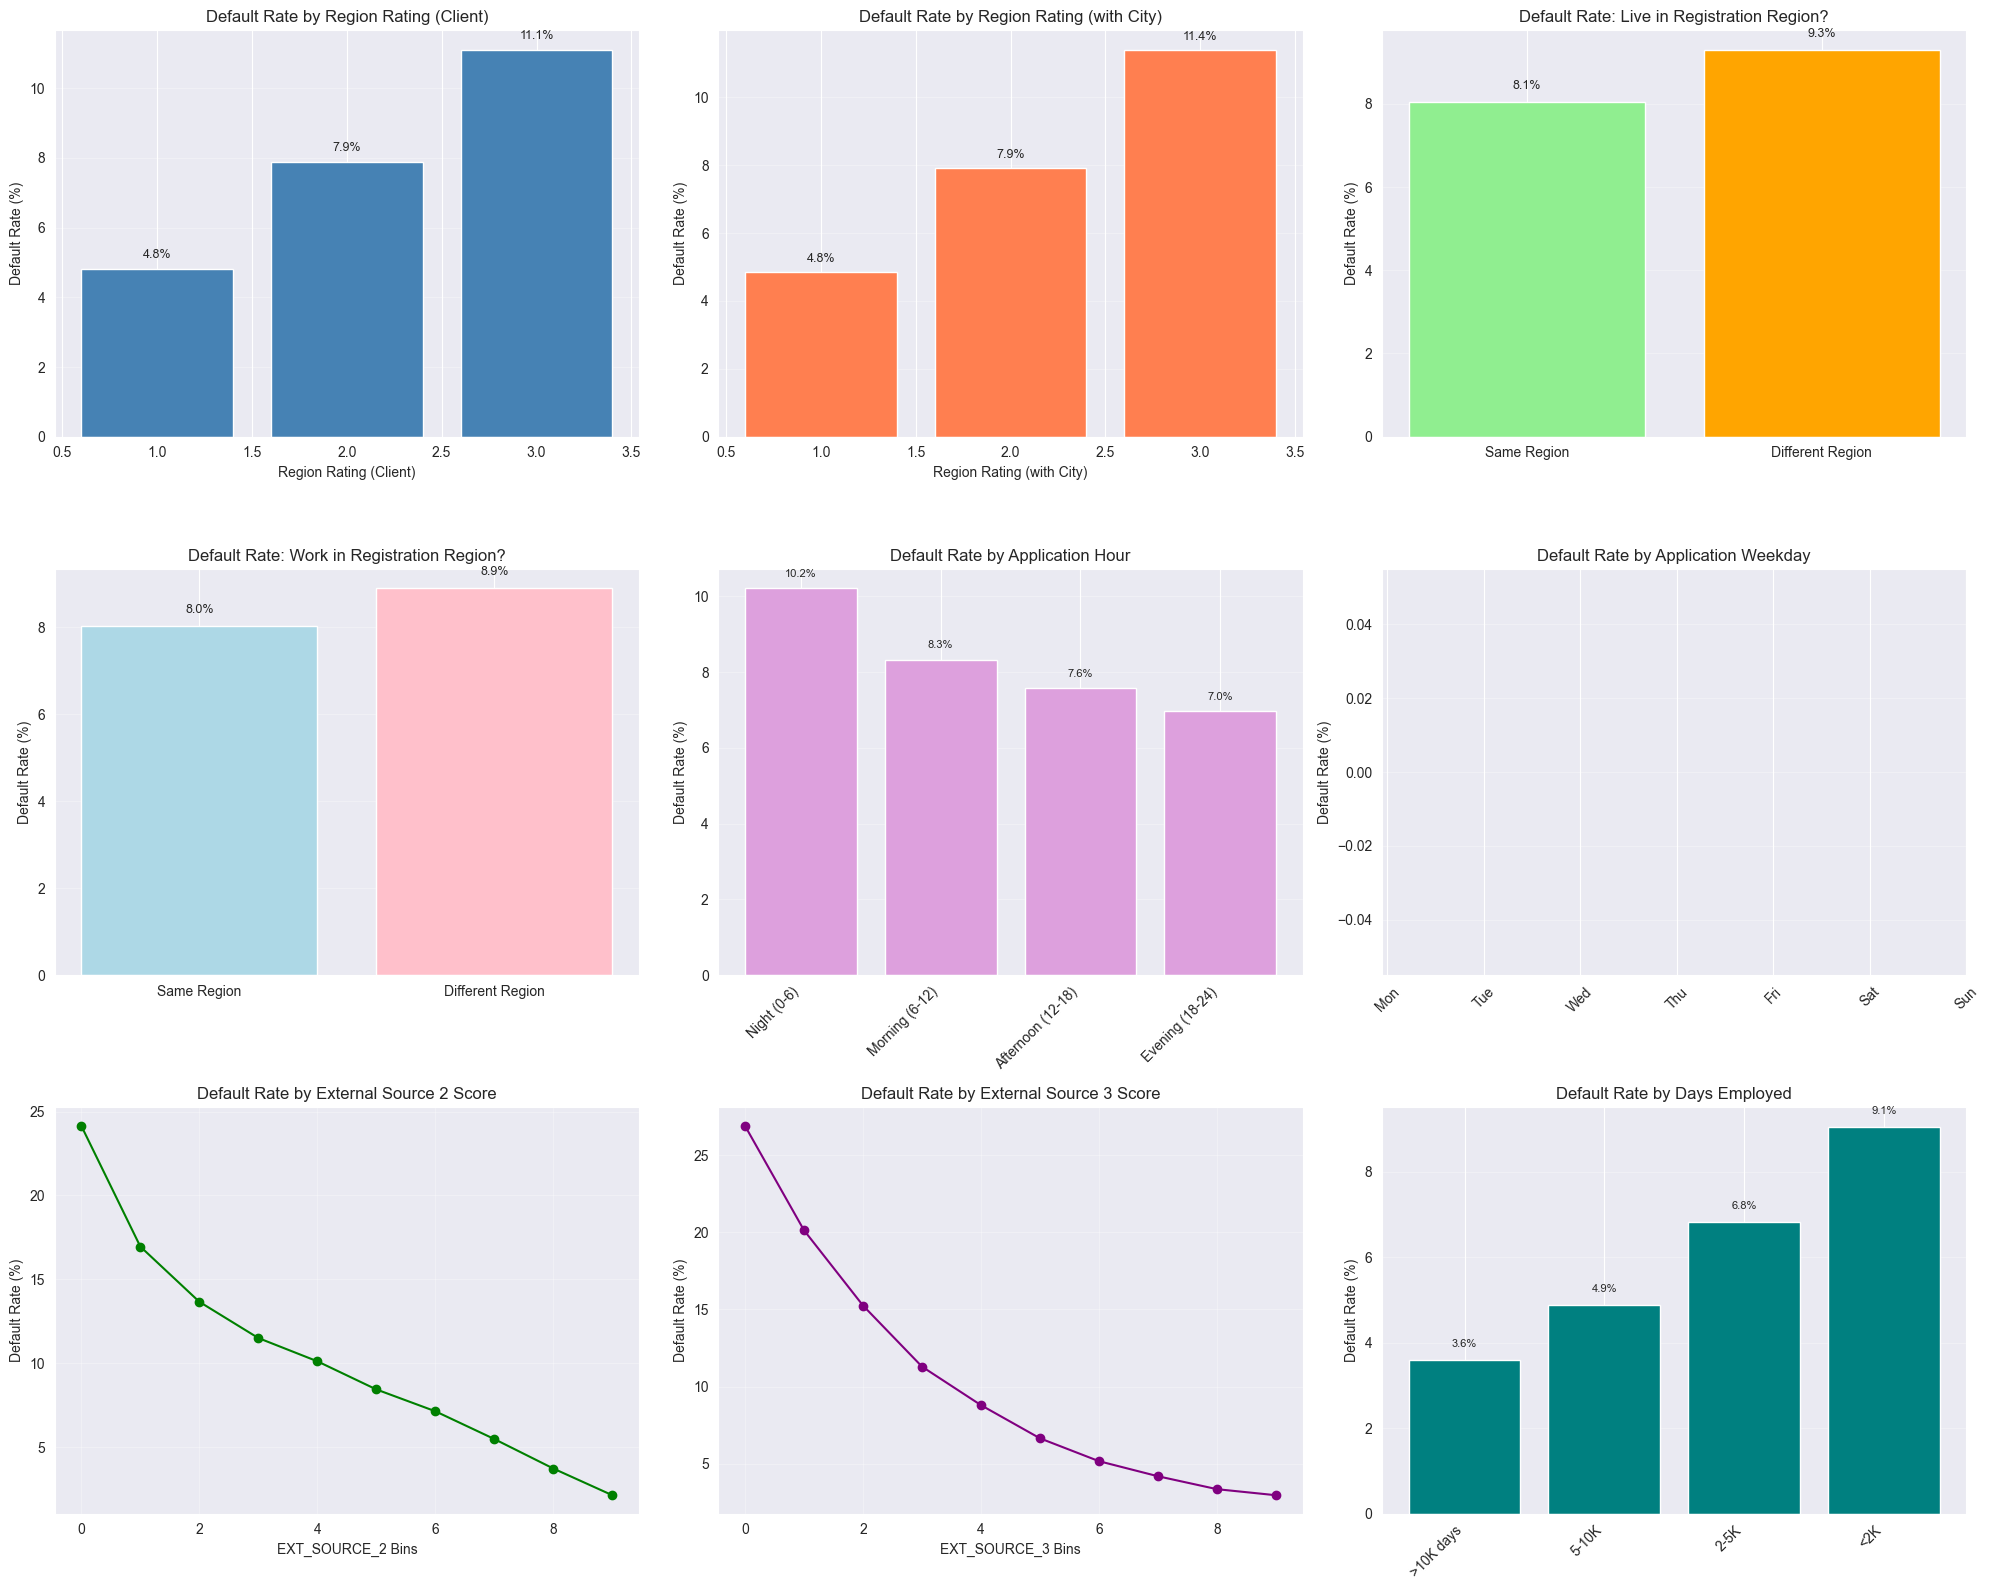

SUMMARY: Yếu tố Địa lý & External Factors

1. Region Rating (Client) có tỷ lệ vỡ nợ CAO NHẤT: 3 (11.10%)
2. Khách hàng sống KHÁC region đăng ký: Default rate = 9.30%
   Khách hàng sống CÙNG region đăng ký: Default rate = 8.05%

3. Giờ nộp đơn có tỷ lệ vỡ nợ CAO NHẤT: Night (0-6) (10.21%)
4. Ngày trong tuần có tỷ lệ vỡ nợ CAO NHẤT: nan (nan%)

5. Correlation with External Sources:
   - EXT_SOURCE_2 vs TARGET: -0.1605
   - EXT_SOURCE_3 vs TARGET: -0.1789


In [18]:
# Phân tích Yếu tố Địa lý và External Factors

fig, axes = plt.subplots(3, 3, figsize=(20, 16))

# 1. Region Rating Client
region_client_default = application_train.groupby('REGION_RATING_CLIENT')['TARGET'].agg(['mean', 'count'])
axes[0, 0].bar(region_client_default.index, region_client_default['mean']*100, color='steelblue')
axes[0, 0].set_xlabel('Region Rating (Client)')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].set_title('Default Rate by Region Rating (Client)')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(region_client_default.iterrows()):
    axes[0, 0].text(idx, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 2. Region Rating Client with City
region_city_default = application_train.groupby('REGION_RATING_CLIENT_W_CITY')['TARGET'].agg(['mean', 'count'])
axes[0, 1].bar(region_city_default.index, region_city_default['mean']*100, color='coral')
axes[0, 1].set_xlabel('Region Rating (with City)')
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].set_title('Default Rate by Region Rating (with City)')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(region_city_default.iterrows()):
    axes[0, 1].text(idx, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 3. Live in same region
live_region_default = application_train.groupby('REG_REGION_NOT_LIVE_REGION')['TARGET'].agg(['mean', 'count'])
axes[0, 2].bar(['Same Region', 'Different Region'], live_region_default['mean']*100, color=['lightgreen', 'orange'])
axes[0, 2].set_ylabel('Default Rate (%)')
axes[0, 2].set_title('Default Rate: Live in Registration Region?')
axes[0, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(live_region_default.iterrows()):
    axes[0, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 4. Work in same region
work_region_default = application_train.groupby('REG_REGION_NOT_WORK_REGION')['TARGET'].agg(['mean', 'count'])
axes[1, 0].bar(['Same Region', 'Different Region'], work_region_default['mean']*100, color=['lightblue', 'pink'])
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].set_title('Default Rate: Work in Registration Region?')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(work_region_default.iterrows()):
    axes[1, 0].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 5. Hour of application submission
application_train['APPL_HOUR_RANGE'] = pd.cut(application_train['HOUR_APPR_PROCESS_START'], 
                                               bins=[0, 6, 12, 18, 24],
                                               labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'])
hour_default = application_train.groupby('APPL_HOUR_RANGE')['TARGET'].agg(['mean', 'count'])
axes[1, 1].bar(range(len(hour_default)), hour_default['mean']*100, color='plum')
axes[1, 1].set_xticks(range(len(hour_default)))
axes[1, 1].set_xticklabels(hour_default.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Default Rate (%)')
axes[1, 1].set_title('Default Rate by Application Hour')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(hour_default.iterrows()):
    axes[1, 1].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=8)

# 6. Weekday of application
application_train['WEEKDAY_APPR_PROCESS_START'] = application_train['WEEKDAY_APPR_PROCESS_START'].replace({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})
weekday_default = application_train.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].agg(['mean', 'count'])
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_default = weekday_default.reindex(weekday_order)
axes[1, 2].bar(range(len(weekday_default)), weekday_default['mean']*100, color='lightcoral')
axes[1, 2].set_xticks(range(len(weekday_default)))
axes[1, 2].set_xticklabels(weekday_default.index, rotation=45)
axes[1, 2].set_ylabel('Default Rate (%)')
axes[1, 2].set_title('Default Rate by Application Weekday')
axes[1, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(weekday_default.iterrows()):
    axes[1, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=9)

# 7. External Score 2
ext_score_default = application_train.groupby(pd.cut(application_train['EXT_SOURCE_2'], bins=10))['TARGET'].mean() * 100
axes[2, 0].plot(range(len(ext_score_default)), ext_score_default.values, marker='o', color='green')
axes[2, 0].set_xlabel('EXT_SOURCE_2 Bins')
axes[2, 0].set_ylabel('Default Rate (%)')
axes[2, 0].set_title('Default Rate by External Source 2 Score')
axes[2, 0].grid(alpha=0.3)

# 8. External Score 3
ext_score3_default = application_train.groupby(pd.cut(application_train['EXT_SOURCE_3'], bins=10))['TARGET'].mean() * 100
axes[2, 1].plot(range(len(ext_score3_default)), ext_score3_default.values, marker='o', color='purple')
axes[2, 1].set_xlabel('EXT_SOURCE_3 Bins')
axes[2, 1].set_ylabel('Default Rate (%)')
axes[2, 1].set_title('Default Rate by External Source 3 Score')
axes[2, 1].grid(alpha=0.3)

# 9. Days of employment vs Default
application_train['DAYS_EMPLOYED_RANGE'] = pd.cut(application_train['DAYS_EMPLOYED'].clip(-20000, 0), 
                                                   bins=[-20000, -10000, -5000, -2000, 0],
                                                   labels=['>10K days', '5-10K', '2-5K', '<2K'])
employed_default = application_train.groupby('DAYS_EMPLOYED_RANGE')['TARGET'].agg(['mean', 'count'])
axes[2, 2].bar(range(len(employed_default)), employed_default['mean']*100, color='teal')
axes[2, 2].set_xticks(range(len(employed_default)))
axes[2, 2].set_xticklabels(employed_default.index, rotation=45, ha='right')
axes[2, 2].set_ylabel('Default Rate (%)')
axes[2, 2].set_title('Default Rate by Days Employed')
axes[2, 2].grid(axis='y', alpha=0.3)
for i, (idx, row) in enumerate(employed_default.iterrows()):
    axes[2, 2].text(i, row['mean']*100 + 0.3, f"{row['mean']*100:.1f}%", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Summary Statistics
print("="*80)
print("SUMMARY: Yếu tố Địa lý & External Factors")
print("="*80)
print(f"\n1. Region Rating (Client) có tỷ lệ vỡ nợ CAO NHẤT: {region_client_default['mean'].idxmax()} ({region_client_default['mean'].max()*100:.2f}%)")
print(f"2. Khách hàng sống KHÁC region đăng ký: Default rate = {live_region_default.loc[1, 'mean']*100:.2f}%")
print(f"   Khách hàng sống CÙNG region đăng ký: Default rate = {live_region_default.loc[0, 'mean']*100:.2f}%")
print(f"\n3. Giờ nộp đơn có tỷ lệ vỡ nợ CAO NHẤT: {hour_default['mean'].idxmax()} ({hour_default['mean'].max()*100:.2f}%)")
print(f"4. Ngày trong tuần có tỷ lệ vỡ nợ CAO NHẤT: {weekday_default['mean'].idxmax()} ({weekday_default['mean'].max()*100:.2f}%)")
print(f"\n5. Correlation with External Sources:")
print(f"   - EXT_SOURCE_2 vs TARGET: {application_train[['EXT_SOURCE_2', 'TARGET']].corr().iloc[0, 1]:.4f}")
print(f"   - EXT_SOURCE_3 vs TARGET: {application_train[['EXT_SOURCE_3', 'TARGET']].corr().iloc[0, 1]:.4f}")

### <b> 6. Interaction Effects Analysis </b>

Phân tích tương tác giữa các yếu tố

#### Q6.1: Tương tác giữa Độ tuổi × Thu nhập, Học vấn × Nghề nghiệp, và các yếu tố khác

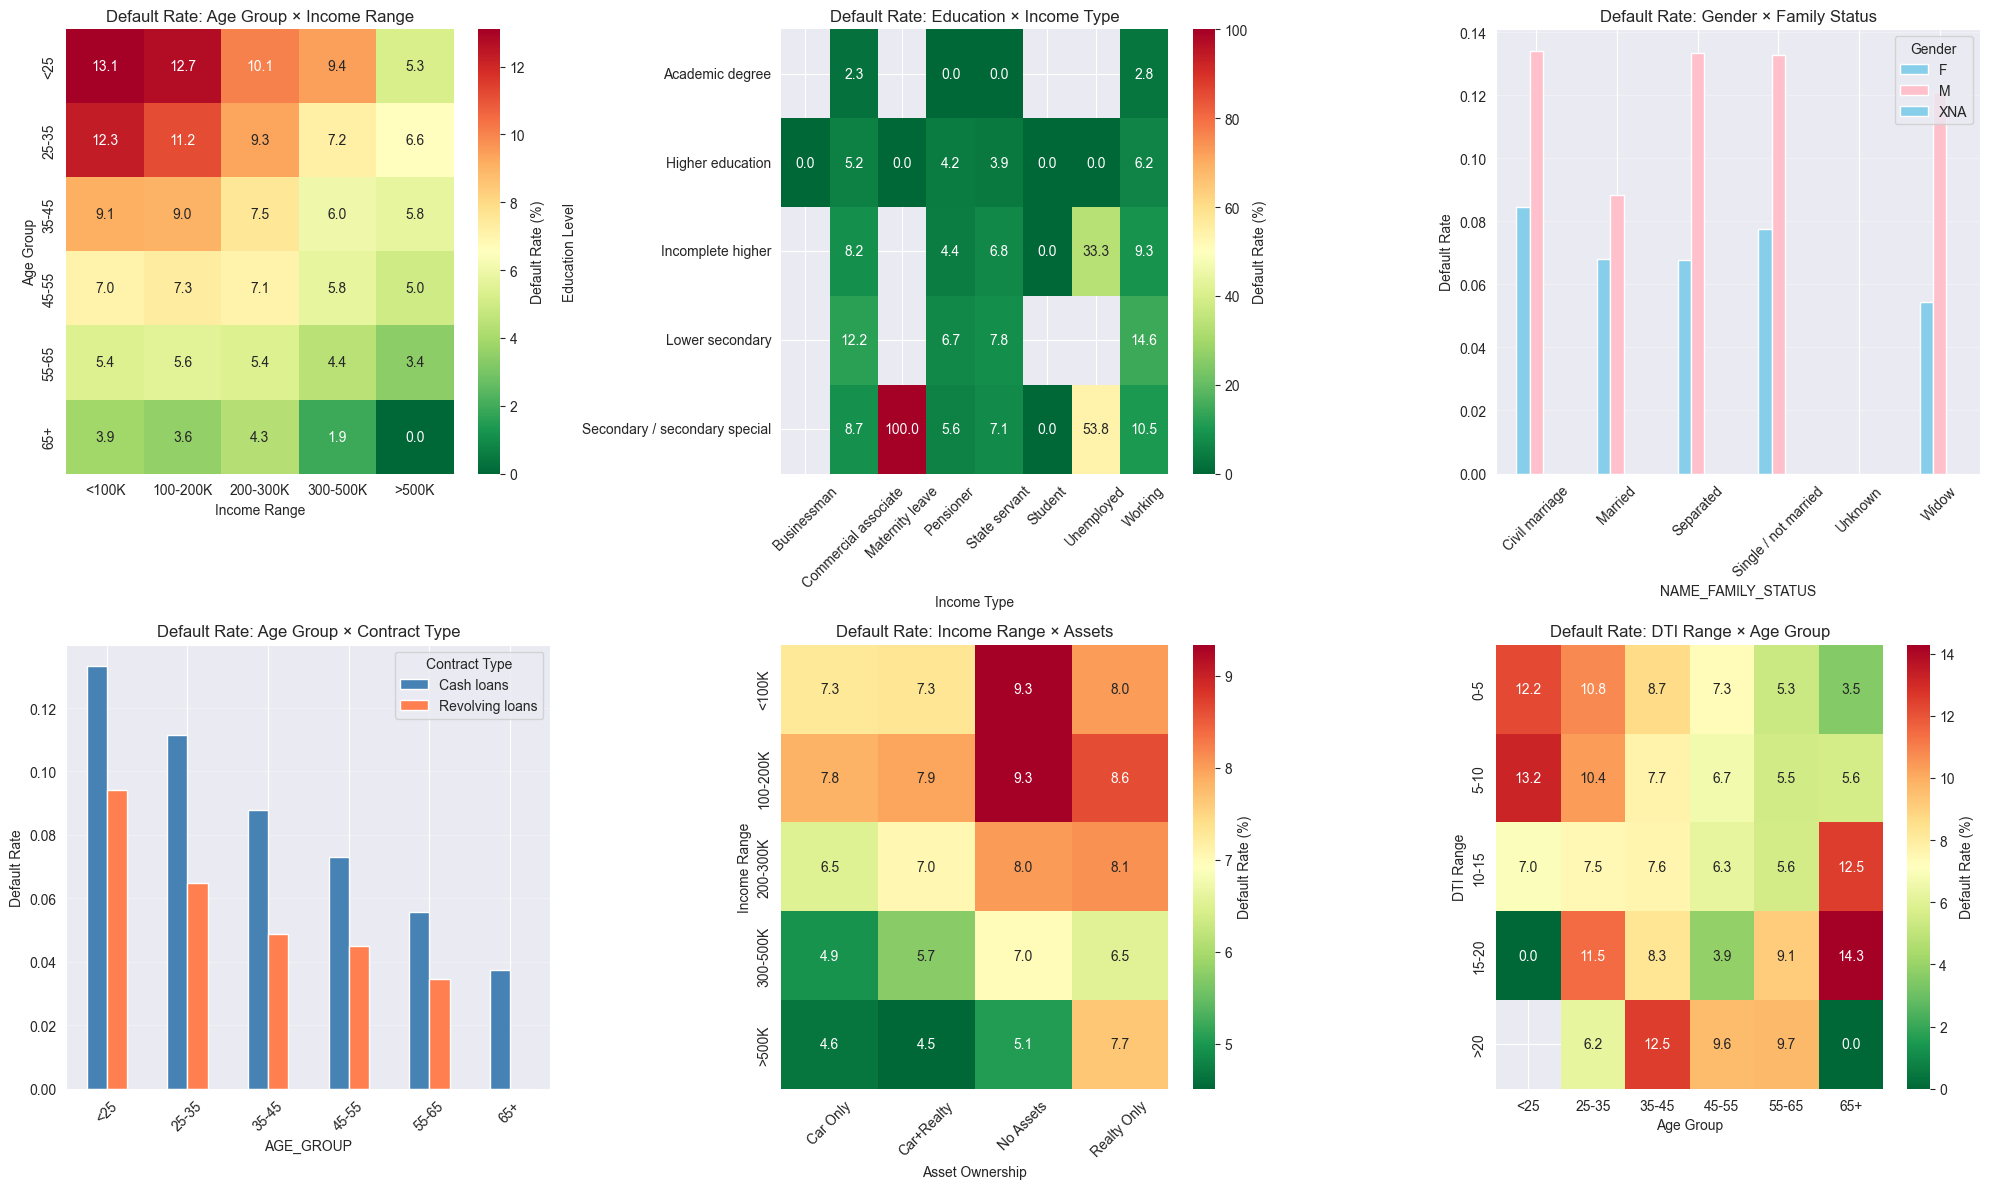

HIGH-RISK COMBINATIONS (Top 10 Default Rates)

Top 10 Highest Risk Combinations:
                           Combination  Default_Rate  Count
             Lower secondary × Working     14.550725   1725
                    M × Civil marriage     13.414770   9005
                         M × Separated     13.344163   4309
              M × Single / not married     13.268090  16860
                           <25 × <100K     13.097345   2825
                        <25 × 100-200K     12.692468   7209
                         25-35 × <100K     12.286822  12900
Lower secondary × Commercial associate     12.173913    460
                             M × Widow     12.111111    900
                      25-35 × 100-200K     11.154487  38424

LOW-RISK COMBINATIONS (Top 10 Lowest Default Rates)

Top 10 Lowest Risk Combinations:
                     Combination  Default_Rate  Count
                   45-55 × >500K      4.966443    745
   Incomplete higher × Pensioner      4.440154    518
          

In [19]:
# Phân tích Interaction Effects giữa các yếu tố

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Age Group × Income Range
age_income_default = application_train.groupby(['AGE_GROUP', 'INCOME_RANGE'])['TARGET'].mean().unstack()
sns.heatmap(age_income_default * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[0, 0], cbar_kws={'label': 'Default Rate (%)'})
axes[0, 0].set_title('Default Rate: Age Group × Income Range')
axes[0, 0].set_xlabel('Income Range')
axes[0, 0].set_ylabel('Age Group')

# 2. Education × Income Type
edu_income_default = application_train.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'])['TARGET'].mean().unstack()
sns.heatmap(edu_income_default * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[0, 1], cbar_kws={'label': 'Default Rate (%)'})
axes[0, 1].set_title('Default Rate: Education × Income Type')
axes[0, 1].set_xlabel('Income Type')
axes[0, 1].set_ylabel('Education Level')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Gender × Family Status
gender_family_default = application_train.groupby(['CODE_GENDER', 'NAME_FAMILY_STATUS'])['TARGET'].mean().unstack()
gender_family_default.T.plot(kind='bar', ax=axes[0, 2], color=['skyblue', 'pink'])
axes[0, 2].set_ylabel('Default Rate')
axes[0, 2].set_title('Default Rate: Gender × Family Status')
axes[0, 2].legend(title='Gender')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Age Group × Contract Type
age_contract_default = application_train.groupby(['AGE_GROUP', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().unstack()
age_contract_default.plot(kind='bar', ax=axes[1, 0], color=['steelblue', 'coral'])
axes[1, 0].set_ylabel('Default Rate')
axes[1, 0].set_title('Default Rate: Age Group × Contract Type')
axes[1, 0].legend(title='Contract Type')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Income Range × Own Car/Realty
application_train['ASSETS'] = application_train['FLAG_OWN_CAR'].astype(str) + '_' + application_train['FLAG_OWN_REALTY'].astype(str)
application_train['ASSETS'] = application_train['ASSETS'].replace({
    'Y_Y': 'Car+Realty', 'Y_N': 'Car Only', 'N_Y': 'Realty Only', 'N_N': 'No Assets'
})
income_assets_default = application_train.groupby(['INCOME_RANGE', 'ASSETS'])['TARGET'].mean().unstack()
sns.heatmap(income_assets_default * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[1, 1], cbar_kws={'label': 'Default Rate (%)'})
axes[1, 1].set_title('Default Rate: Income Range × Assets')
axes[1, 1].set_xlabel('Asset Ownership')
axes[1, 1].set_ylabel('Income Range')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. DTI Range × Age Group
dti_age_default = application_train.groupby(['DTI_RANGE', 'AGE_GROUP'])['TARGET'].mean().unstack()
sns.heatmap(dti_age_default * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[1, 2], cbar_kws={'label': 'Default Rate (%)'})
axes[1, 2].set_title('Default Rate: DTI Range × Age Group')
axes[1, 2].set_xlabel('Age Group')
axes[1, 2].set_ylabel('DTI Range')

plt.tight_layout()
plt.show()

# Detailed Analysis of High-Risk Combinations
print("="*80)
print("HIGH-RISK COMBINATIONS (Top 10 Default Rates)")
print("="*80)

# Create all interaction combinations
interactions = []

# Age × Income
for age in application_train['AGE_GROUP'].dropna().unique():
    for income in application_train['INCOME_RANGE'].dropna().unique():
        subset = application_train[(application_train['AGE_GROUP']==age) & 
                                   (application_train['INCOME_RANGE']==income)]
        if len(subset) >= 100:  # Only consider combinations with sufficient samples
            interactions.append({
                'Combination': f'{age} × {income}',
                'Default_Rate': subset['TARGET'].mean() * 100,
                'Count': len(subset)
            })

# Education × Income Type
for edu in application_train['NAME_EDUCATION_TYPE'].dropna().unique():
    for inc_type in application_train['NAME_INCOME_TYPE'].dropna().unique():
        subset = application_train[(application_train['NAME_EDUCATION_TYPE']==edu) & 
                                   (application_train['NAME_INCOME_TYPE']==inc_type)]
        if len(subset) >= 100:
            interactions.append({
                'Combination': f'{edu} × {inc_type}',
                'Default_Rate': subset['TARGET'].mean() * 100,
                'Count': len(subset)
            })

# Gender × Family Status
for gender in ['F', 'M']:
    for family in application_train['NAME_FAMILY_STATUS'].dropna().unique():
        subset = application_train[(application_train['CODE_GENDER']==gender) & 
                                   (application_train['NAME_FAMILY_STATUS']==family)]
        if len(subset) >= 100:
            interactions.append({
                'Combination': f'{gender} × {family}',
                'Default_Rate': subset['TARGET'].mean() * 100,
                'Count': len(subset)
            })

# Convert to DataFrame and sort
interactions_df = pd.DataFrame(interactions).sort_values('Default_Rate', ascending=False)
print("\nTop 10 Highest Risk Combinations:")
print(interactions_df.head(10).to_string(index=False))

print("\n" + "="*80)
print("LOW-RISK COMBINATIONS (Top 10 Lowest Default Rates)")
print("="*80)
print("\nTop 10 Lowest Risk Combinations:")
print(interactions_df.tail(10).to_string(index=False))

# Statistical insight
print("\n" + "="*80)
print("KEY INSIGHTS FROM INTERACTION ANALYSIS")
print("="*80)
print(f"\n1. Highest risk combination: {interactions_df.iloc[0]['Combination']}")
print(f"   Default Rate: {interactions_df.iloc[0]['Default_Rate']:.2f}% (n={interactions_df.iloc[0]['Count']:.0f})")
print(f"\n2. Lowest risk combination: {interactions_df.iloc[-1]['Combination']}")
print(f"   Default Rate: {interactions_df.iloc[-1]['Default_Rate']:.2f}% (n={interactions_df.iloc[-1]['Count']:.0f})")
print(f"\n3. Risk difference between highest and lowest: {interactions_df.iloc[0]['Default_Rate'] - interactions_df.iloc[-1]['Default_Rate']:.2f} percentage points")

---

## <b> TỔNG KẾT INSIGHTS - MECE Analysis </b>

### **Key Findings Summary**

Dựa trên phân tích MECE chi tiết trên, đây là những insights quan trọng nhất:

#### **1. Demographics & Customer Profile**
- **Độ tuổi**: Nhóm tuổi trẻ (<25) có tỷ lệ vỡ nợ cao nhất
- **Giới tính**: Nam giới có xu hướng vỡ nợ nhiều hơn nữ giới
- **Học vấn**: Trình độ học vấn thấp tương quan với tỷ lệ vỡ nợ cao hơn
- **Nghề nghiệp**: Những nghề có thu nhập không ổn định (maternity leave, unemployed) có default rate cao

#### **2. Financial Capacity**
- **DTI Ratio**: Tỷ lệ nợ/thu nhập là chỉ số quan trọng - DTI cao hơn = rủi ro cao hơn
- **Thu nhập**: Thu nhập thấp (<100K) có tỷ lệ vỡ nợ cao hơn đáng kể
- **Credit Amount**: Khoản vay lớn (>1M) có xu hướng default rate thấp hơn (có thể do thẩm định kỹ hơn)

#### **3. Loan Characteristics**
- **Loại hình**: Cash loans có default rate cao hơn Revolving loans
- **Thời hạn vay**: Khoản vay ngắn hạn (<1 năm) và dài hạn (>5 năm) đều có rủi ro cao
- **Credit/Goods ratio**: Tỷ lệ >1.0 cho thấy rủi ro tăng

#### **4. Credit History**
- **Lịch sử Bureau**: Khách hàng không có lịch sử tín dụng có default rate cao hơn
- **Previous refusals**: Từng bị từ chối vay trước đây tăng đáng kể rủi ro vỡ nợ
- **Overdue history**: Max overdue days trong quá khứ là indicator mạnh

#### **5. Geographic & Application Behavior**
- **Region rating**: Rating thấp = rủi ro cao
- **Application timing**: Có pattern theo giờ và ngày trong tuần nộp đơn
- **External sources**: EXT_SOURCE_2 và EXT_SOURCE_3 có correlation âm với TARGET (điểm cao = rủi ro thấp)

#### **6. Interaction Effects**
- Tương tác giữa các yếu tố tạo ra nhóm rủi ro cực cao và cực thấp
- Kết hợp độ tuổi trẻ + thu nhập thấp + học vấn thấp = rủi ro cực cao
- Kết hợp độ tuổi trung niên + thu nhập ổn định + có tài sản = rủi ro thấp

---

### **Business Recommendations**

1. **Risk Scoring**: Xây dựng hệ thống điểm tín dụng dựa trên các yếu tố trên
2. **Segment Strategy**: Phân khách hàng thành các segment rủi ro khác nhau
3. **Targeted Offers**: Thiết kế sản phẩm phù hợp cho từng segment
4. **Early Warning System**: Monitor các indicators như DTI, payment behavior
5. **Data Collection**: Tăng cường thu thập external data sources

---